## Front matter

In [1]:
# Front matter
import os,datetime
import pandas as pd
import numpy as np
import scipy as sp
from scipy import constants
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator
from matplotlib import gridspec
import re

# Seaborn, useful for graphics
import seaborn as sns

# Magic function to make matplotlib inline; other style specs must come AFTER
%matplotlib inline

matplotlib.rc('xtick', labelsize=16) 
matplotlib.rc('ytick', labelsize=16) 

rc = {'lines.linewidth': 1, 
      'axes.labelsize': 20, 
      'axes.titlesize': 20,
      'legend.fontsize': 26,
      'xtick.direction': u'in',
      'ytick.direction': u'in'}
sns.set_style('ticks', rc=rc)

## Functions

In [2]:
# Functions
def vD_from_vPvS(df):
    df['vD'] = (3/( 1/df['vP']**3 + 2/df['vS']**3 ))**(1/3)
    return df

def dvD_from_vPvS(df):
    df['dvD'] = np.sqrt( ( (1/3)*(df['vD']/df['vP'])**4*df['dvP'] )**2 +
                             ( (2/3)*(df['vD']/df['vS'])**4*df['dvS'] )**2 )
    return df

def vS_from_vPvD(vD, vP):
    vS = (2/( 3/vD**3 - 1/vP**3 ))**(1/3)
    return vS

def dvS_from_vPvD(vD, dvD, vP, dvP):
    vS = (2/( 3/vD**3 - 1/vP**3 ))**(1/3)
    dvS = np.sqrt( ( (3/2)*(vS/vD)**4*dvD )**2 +
                             ( (-1/2)*(vS/vP)**4*dvP )**2 )
    return dvS

def vphi_from_vPvS(df):
    vP = df['vP']
    vS = df['vS']
    df['vphi'] = (vP**2 - (4/3)*vS**2)**(1/2)
    return df

def dvphi_from_vPvS(df):
    vP = df['vP']
    dvP = df['dvP']
    vS = df['vS']
    dvS = df['dvS']
    vphi = vphi_from_vPvS(df)['vphi']
    df['dvphi'] = np.sqrt(( (vP/vphi)*dvP)**2 + ((4/3)*(vS/vphi)*dvS)**2)
    return df

def vphi_from_rhoKS(df):
    rho = df['rho']
    KS = df['KS']
    df['vphi'] = (KS/rho)**(1/2)
    return df

def dvphi_from_rhoKS(df):
    rho = df['rho']
    drho = df['drho']
    KS = df['KS']
    dKS = df['dKS']
    vphi = vphi_from_rhoKS(df)['vphi']
    df['dvphi'] = np.sqrt((vphi*drho/(2*rho))**2 + (dKS/(2*rho*vphi))**2)
    return df

def calc_V_from_rho(rho,M):
    V_ccpermol = M/rho
    V = V_ccpermol*2*10**24/constants.N_A
    return V

def VinetEOS(V,V0,K0,Kprime0):
    A = V/V0
    P = 3*K0*A**(-2/3) * (1-A**(1/3)) * np.exp((3/2)*(Kprime0-1)*(1-A**(1/3)))
    return P

## Import Data

In [3]:
# Define data from this study
studylist = []
labelchoice = dict()
phase = dict()
NRIXSdatapath = dict()
XRDdatapath = dict()
colorchoice = dict()
mfcchoice = dict()
symbol = dict()
symbolsize = dict()
enr_mass = dict()
nat_mass = dict()

circlesize = 8

# bcc Fe
study = 'bccFe'
studylist.append(study)
labelchoice[study] = 'bcc Fe (This study)'
phase[study] = 'bcc'
NRIXSdatapath[study] = '../081_vD_Fe_PowerLaw/Results/vD_results_Constrained_Power.csv'
XRDdatapath[study]   = '../010_XRDAnalysis/Results/XRD_results_bccFe.csv'
colorchoice[study] = 'gray'
mfcchoice[study] = 'White'
symbol[study] = 'o'
symbolsize[study] = circlesize
nat_mass[study] = 55.845
enr_mass[study] = 56.942

# hcp Fe
study = 'hcpFe_Murphy'
studylist.append(study)
labelchoice[study] = 'hcp Fe (Murphy et al. 2013*)'
phase[study] = 'hcp'
NRIXSdatapath[study] = '../081_vD_Fe_PowerLaw/Results/vD_results_Constrained_Power.csv'
XRDdatapath[study]   = '../005_PubNRIXSVals/hcpFe_Murphy.csv'
colorchoice[study] = 'gray'
mfcchoice[study] = None # Filled
symbol[study] = 'o'
symbolsize[study] = circlesize
nat_mass[study] = 55.845
enr_mass[study] = 56.942

# bcc Fe-Ni
study = 'bccFeNi'
studylist.append(study)
labelchoice[study] = 'bcc Fe$_{0.91}$Ni$_{0.09}$ (This study)'
phase[study] = 'bcc'
NRIXSdatapath[study] = '../091_vD_FeNi_PowerLaw/Results/vD_results_Constrained_Power.csv'
XRDdatapath[study]   = '../010_XRDAnalysis/Results/XRD_results_bccFeNi.csv'
colorchoice[study] = 'DarkOrange'
mfcchoice[study] = 'White'
symbol[study] = 'o'
symbolsize[study] = circlesize
nat_mass[study] = 56.101
enr_mass[study] = 57.1

# hcp Fe-Ni
study = 'hcpFeNi'
studylist.append(study)
labelchoice[study] = 'hcp Fe$_{0.91}$Ni$_{0.09}$ (This study)'
phase[study] = 'hcp'
NRIXSdatapath[study] = '../091_vD_FeNi_PowerLaw/Results/vD_results_Constrained_Power.csv'
XRDdatapath[study]   = '../010_XRDAnalysis/Results/XRD_results_hcpFeNi.csv'
colorchoice[study] = 'DarkOrange'
mfcchoice[study] = None # Filled
symbol[study] = 'o'
symbolsize[study] = circlesize
nat_mass[study] = 56.101
enr_mass[study] = 57.1

# bcc Fe-Ni-Si
study = 'bccFeNiSi'
studylist.append(study)
labelchoice[study] = 'bcc Fe$_{0.8}$Ni$_{0.1}$Si$_{0.1}$ (This study)'
phase[study] = 'bcc'
NRIXSdatapath[study] = '../101_vD_FeNiSi_PowerLaw/Results/vD_results_Constrained_Power.csv'
XRDdatapath[study]   = '../010_XRDAnalysis/Results/XRD_results_bccFeNiSi.csv'
colorchoice[study] = 'DeepSkyBlue'
mfcchoice[study] = 'White'
symbol[study] = 'o'
symbolsize[study] = circlesize
nat_mass[study] = 53.354
enr_mass[study] = 54.231

# hcp Fe-Ni-Si
study = 'hcpFeNiSi'
studylist.append(study)
labelchoice[study] = 'hcp Fe$_{0.8}$Ni$_{0.1}$Si$_{0.1}$ (This study)'
phase[study] = 'hcp'
NRIXSdatapath[study] = '../101_vD_FeNiSi_PowerLaw/Results/vD_results_Constrained_Power.csv'
XRDdatapath[study]   = '../010_XRDAnalysis/Results/XRD_results_hcpFeNiSi.csv'
colorchoice[study] = 'DeepSkyBlue'
mfcchoice[study] = None # Filled
symbol[study] = 'o'
symbolsize[study] = circlesize
nat_mass[study] = 53.354
enr_mass[study] = 54.231

In [4]:
# Load data from this study
precious_dfdict = dict()

for study in studylist:
    print('Now importing '+study)

    # Import XRD data
    init_XRD_df = pd.read_csv(XRDdatapath[study])
    # Change index name to match other data sets
    if 'NRIXS exp' in init_XRD_df:
        init_XRD_df = init_XRD_df.rename(columns={'NRIXS exp': 'Index'})
    # We only need some of the info here
    if phase[study] == 'bcc':
        XRD_df = init_XRD_df[['Index','a','da','V','dV','rho','drho','P','dP']]
    else:
        XRD_df = init_XRD_df[['Index','a','da','c','dc','V','dV','rho','drho','P','dP']]

    # Import NRIXS data
    init_NRIXS_df = pd.read_csv(NRIXSdatapath[study])
    # We're only going to look at some of the values here, b/c only some values are reported in all dataframes
    NRIXS_df = init_NRIXS_df[['Index','vD','dvD','vP','dvP','vS','dvS','vphi','dvphi']]
#     NRIXS_df = init_NRIXS_df[['Index','vD','dvD']]
    # Get rows in NRIXS df that also appear in XRD df. (So we only look at bcc or hcp data.)
    NRIXS_df = NRIXS_df[NRIXS_df['Index'].isin(XRD_df['Index'].values)]
    
    # Change units to km/s
    NRIXS_df[['vD','dvD','vP','dvP','vS','dvS','vphi','dvphi']] = NRIXS_df[['vD','dvD','vP','dvP','vS','dvS','vphi','dvphi']]/1000
       
    # Combine XRD df and NRIXS df into one df to rule them all
    precious_df = pd.merge(XRD_df,NRIXS_df,on='Index')
    
    # Calculate correction for density and sound velocities
    # (57Fe enrichment -> natural enrichement)
    precious_df[['rho_nat','drho_nat']] = precious_df[[
        'rho','drho']] * nat_mass[study]/enr_mass[study]
    precious_df[['vD_nat','dvD_nat','vP_nat','dvP_nat','vS_nat','dvS_nat']] = precious_df[[
        'vD','dvD','vP','dvP','vS','dvS']] * np.sqrt(enr_mass[study]/nat_mass[study])

    precious_dfdict[study] = precious_df
    
    # Save enriched values to a csv
    precious_df_save = precious_df[['P','dP','rho_nat','drho_nat','vD_nat','dvD_nat',
                 'vP_nat','dvP_nat','vS_nat','dvS_nat']].copy()
    precious_df_save = precious_df_save.round({'rho_nat':2,'drho_nat':2,'vD_nat':2,'dvD_nat':2,
                 'vP_nat':2,'dvP_nat':2,'vS_nat':2,'dvS_nat':2})
    precious_df_save.to_csv(study+'_enriched_vals.csv')

Now importing bccFe
Now importing hcpFe_Murphy
Now importing bccFeNi
Now importing hcpFeNi
Now importing bccFeNiSi
Now importing hcpFeNiSi


### Import data from literature

In [5]:
# Fe experimental studies
#########################

study = 'Murphy2013_hcpFe'
if study not in studylist:
    studylist.append(study)
labelchoice[study] = 'Murphy et al. (2013)'
phase[study] = 'hcp'
datapath = '../006_Literature/ExpWithSameUnits/Murphy2013_hcpFe.csv'
precious_df = pd.read_csv(datapath)
# Change units
precious_df[['vP','dvP','vS','dvS','vD','dvD']] = precious_df[['vP','dvP','vS','dvS','vD','dvD']]/1000
# # Correct for isotopic enrichment
# nat_mass[study] = 55.845
# enr_mass[study] = 56.942
# # precious_df[['rho_nat','drho_nat']] = precious_df[[
# #     'rho','drho']] * nat_mass[study]/enr_mass[study]
# precious_df[['vD_nat','dvD_nat','vP_nat','dvP_nat','vS_nat','dvS_nat']] = precious_df[[
#     'vD','dvD','vP','dvP','vS','dvS']] * np.sqrt(enr_mass[study]/nat_mass[study])
precious_dfdict[study] = precious_df
colorchoice[study] = 'red'
mfcchoice[study] = 'red' #'None' # Empty
symbol[study] = 'o'
symbolsize[study] = 6

study = 'Antonangeli2018_hcpFe'
if study not in studylist:
    studylist.append(study)
labelchoice[study] = 'Antonangeli et al. (2018)'
phase[study] = 'hcp'
datapath = '../006_Literature/ExpWithSameUnits/Antonangeli2018_hcpFe.csv'
precious_df = pd.read_csv(datapath)
# Change units
precious_df[['vP','dvP','vS']] = precious_df[['vP','dvP','vS']]/1000
precious_df['vD'] = vD_from_vPvS(precious_df)
# Experiments are conducted with natural isotopic abundance
precious_df[['vP_nat','dvP_nat','vS_nat']] = precious_df[['vP','dvP','vS']]
precious_dfdict[study] = precious_df
colorchoice[study] = 'limegreen'
mfcchoice[study] = 'white' #'None' # Empty
symbol[study] = '^'
symbolsize[study] = 6

study = 'Decremps2014_bcchcpFe'
if study not in studylist:
    studylist.append(study)
labelchoice[study] = 'Decremps et al. (2014)'
phase[study] = 'hcp'
datapath = '../006_Literature/ExpWithSameUnits/Decremps2014_bcchcpFe.csv'
precious_df = pd.read_csv(datapath)
# Change units
precious_df[['vP']] = precious_df[['vP']]/1000
# Experiments are conducted with natural isotopic abundance
precious_df[['vP_nat']] = precious_df[['vP']]
precious_dfdict[study] = precious_df
colorchoice[study] = 'gray'
mfcchoice[study] = 'white' #'None' # Empty
symbol[study] = '+'
symbolsize[study] = 9

study = 'Lin2005_hcpFe'
if study not in studylist:
    studylist.append(study)
labelchoice[study] = 'Lin et al. (2005)'
phase[study] = 'hcp'
datapath = '../006_Literature/ExpWithSameUnits/Lin2005_hcpFe.csv'
precious_df = pd.read_csv(datapath)
# Change units
precious_df[['vP','dvP','vS','dvS']] = precious_df[['vP','dvP','vS','dvS']]/1000
# Only plot against 300 K data
precious_df = precious_df[precious_df['T']==300]
precious_df = vD_from_vPvS(precious_df)
precious_df = dvD_from_vPvS(precious_df)
# Correct for isotopic enrichment
nat_mass[study] = 55.845
enr_mass[study] = 56.942
# precious_df[['rho_nat','drho_nat']] = precious_df[[
#     'rho','drho']] * nat_mass[study]/enr_mass[study]
precious_df[['vD_nat','dvD_nat','vP_nat','dvP_nat','vS_nat','dvS_nat']] = precious_df[[
    'vD','dvD','vP','dvP','vS','dvS']] * np.sqrt(enr_mass[study]/nat_mass[study])
precious_dfdict[study] = precious_df
colorchoice[study] = 'darkorange'
mfcchoice[study] = 'white' #'None' # Empty
symbol[study] = 's'
symbolsize[study] = 6

study = 'Liu2014_bccFe'
if study not in studylist:
    studylist.append(study)
labelchoice[study] = 'Liu et al. (2014)'
phase[study] = 'bcc'
datapath = '../006_Literature/ExpWithSameUnits/Liu2014_bccFe.csv'
precious_df = pd.read_csv(datapath)
# Change units
precious_df[['vP','dvP']] = precious_df[['vP','dvP']]/1000
# Only plot against 300 K data
precious_df = precious_df[precious_df['T']==300]
# Experiments are conducted with natural isotopic abundance
precious_df[['vP_nat','dvP_nat']] = precious_df[['vP','dvP']]
precious_dfdict[study] = precious_df
colorchoice[study] = 'green'
mfcchoice[study] = 'white' #'None' # Empty
symbol[study] = '<'
symbolsize[study] = 6

study = 'Liu2016_hcpFe'
if study not in studylist:
    studylist.append(study)
labelchoice[study] = 'Liu et al. (2016)'
phase[study] = 'hcp'
datapath = '../006_Literature/ExpWithSameUnits/Liu2016_hcpFe_NRIXS.csv'
precious_df = pd.read_csv(datapath)
# Change units
precious_df[['vD','dvD','vS','dvS']] = precious_df[['vD','dvD','vS','dvS']]/1000
# Correct for isotopic enrichment
nat_mass[study] = 55.85
enr_mass[study] = 56.95
precious_df[['rho_nat','drho_nat']] = precious_df[[
    'rho','drho']] * nat_mass[study]/enr_mass[study]
precious_df[['vD_nat','dvD_nat','vS_nat','dvS_nat']] = precious_df[[
    'vD','dvD','vS','dvS']] * np.sqrt(enr_mass[study]/nat_mass[study])
precious_dfdict[study] = precious_df
colorchoice[study] = 'purple'
mfcchoice[study] = 'white' #'None' # Empty
symbol[study] = 'D'
symbolsize[study] = 6

study = 'Mao2001_bccFe'
if study not in studylist:
    studylist.append(study)
labelchoice[study] = 'Mao et al. (2001)'
phase[study] = 'bcc'
datapath = '../006_Literature/ExpWithSameUnits/Mao2001_bccFe.csv'
precious_df = pd.read_csv(datapath)
# Change units
precious_df[['vP','vS']] = precious_df[['vP','vS']]/1000
precious_df = vD_from_vPvS(precious_df)
# Correct for isotopic enrichment
nat_mass[study] = 55.845
enr_mass[study] = 56.942
precious_df[['vD_nat','vP_nat','vS_nat']] = precious_df[[
    'vD','vP','vS']] * np.sqrt(enr_mass[study]/nat_mass[study])
precious_dfdict[study] = precious_df
colorchoice[study] = 'brown'
mfcchoice[study] = 'white' #'None' # Empty
symbol[study] = 'x'
symbolsize[study] = 7

study = 'Mao2001_hcpFe'
if study not in studylist:
    studylist.append(study)
labelchoice[study] = 'Mao et al. (2001)'
phase[study] = 'hcp'
datapath = '../006_Literature/ExpWithSameUnits/Mao2001_hcpFe.csv'
precious_df = pd.read_csv(datapath)
# Change units
precious_df[['vP','vS']] = precious_df[['vP','vS']]/1000
precious_df = vD_from_vPvS(precious_df)
# Correct for isotopic enrichment
nat_mass[study] = 55.845
enr_mass[study] = 56.942
precious_df[['vD_nat','vP_nat','vS_nat']] = precious_df[[
    'vD','vP','vS']] * np.sqrt(enr_mass[study]/nat_mass[study])
precious_dfdict[study] = precious_df
colorchoice[study] = 'brown'
mfcchoice[study] = 'white' #'None' # Empty
symbol[study] = 'x'
symbolsize[study] = 7

study = 'Mao2008_hcpFe'
if study not in studylist:
    studylist.append(study)
labelchoice[study] = 'Mao et al. (2008)'
phase[study] = 'hcp'
datapath = '../006_Literature/ExpWithSameUnits/Mao2008_hcpFe.csv'
precious_df = pd.read_csv(datapath)
precious_df = pd.read_csv(datapath)
# Change units
precious_df[['vD','dvD','vP','dvP','vS','dvS']] = precious_df[[
    'vD','dvD','vP','dvP','vS','dvS']]/1000
# Correct for isotopic enrichment
nat_mass[study] = 55.845
enr_mass[study] = 56.942
# vP was determined with natural isotopic enrichment
precious_df[['vP_nat','dvP_nat']] = precious_df[['vP','dvP']]
# vD was determined with 57Fe enriched samples
precious_df[['vD_nat','dvD_nat']] = precious_df[[
    'vD','dvD']] * np.sqrt(enr_mass[study]/nat_mass[study])
# vS was determined with naturally enriched vP and 57Fe enriched vD.
# Let's recalculate the naturally enriched vS using naturally enriched vP and vD
precious_df['vS_nat'] = vS_from_vPvD(precious_df['vD'],precious_df['vP'])
precious_df['dvS_nat'] = dvS_from_vPvD(precious_df['vD'],precious_df['dvD'],
                                       precious_df['vP'],precious_df['dvP'])
precious_dfdict[study] = precious_df
colorchoice[study] = 'magenta'
mfcchoice[study] = 'white' #'None' # Empty
symbol[study] = '*'
symbolsize[study] = 10

study = 'Mao2012_hcpFe'
if study not in studylist:
    studylist.append(study)
labelchoice[study] = 'Mao et al. (2012)'
phase[study] = 'hcp'
datapath = '../006_Literature/ExpWithSameUnits/Mao2012_hcpFe.csv'
precious_df = pd.read_csv(datapath,header=1)
# Only plot against 300 K data
precious_df = precious_df[precious_df['T']==300]
# Change units
precious_df[['vP','dvP']] = precious_df[['vP','dvP']]/1000
# Experiments are conducted with natural isotopic abundance
precious_df[['vP_nat','dvP_nat']] = precious_df[['vP','dvP']]
precious_dfdict[study] = precious_df
colorchoice[study] = 'blue'
mfcchoice[study] = 'white' #'None' # Empty
symbol[study] = 'v'
symbolsize[study] = 6

study = 'Gleason2013_hcpFe'
if study not in studylist:
    studylist.append(study)
labelchoice[study] = 'Gleason et al. (2013)'
phase[study] = 'hcp'
datapath = '../006_Literature/ExpWithSameUnits/Gleason2013_hcpFe.csv'
precious_df = pd.read_csv(datapath)
# Change units
precious_df[['vP','dvP','vS','dvS']] = precious_df[['vP','dvP','vS','dvS']]/1000
precious_df = vD_from_vPvS(precious_df)
precious_df = dvD_from_vPvS(precious_df)
# Correct for isotopic enrichment
nat_mass[study] = 55.845
enr_mass[study] = 56.942
precious_df[['rho_nat','drho_nat']] = precious_df[[
    'rho','drho']] * nat_mass[study]/enr_mass[study]
precious_df[['vD_nat','dvD_nat','vP_nat','dvP_nat','vS_nat','dvS_nat']] = precious_df[[
    'vD','dvD','vP','dvP','vS','dvS']] * np.sqrt(enr_mass[study]/nat_mass[study])
precious_dfdict[study] = precious_df
colorchoice[study] = 'red'
mfcchoice[study] = 'white' #'None' # Empty
symbol[study] = 'h'
symbolsize[study] = 7

study = 'Ohtani2013_hcpFe'
if study not in studylist:
    studylist.append(study)
labelchoice[study] = 'Ohtani et al. (2013)'
phase[study] = 'hcp'
datapath = '../006_Literature/ExpWithSameUnits/Ohtani2013_hcpFe.csv'
precious_df = pd.read_csv(datapath)
# Change units
# precious_df[['vP','dvP']] = precious_df[['vP','dvP']]/1000
# Only plot against 300 K data
precious_df = precious_df[precious_df['T']==300]
# Experiments are conducted with natural isotopic abundance
precious_df[['vP_nat','dvP_nat','vS_nat',]] = precious_df[['vP','dvP','vS']]
precious_dfdict[study] = precious_df
colorchoice[study] = 'deepskyblue'
mfcchoice[study] = 'white' #'None' # Empty
symbol[study] = '>'
symbolsize[study] = 6

study = 'Ohtani2013_hcpFe_vS'
if study not in studylist:
    studylist.append(study)
labelchoice[study] = 'Ohtani et al. (2013)'
phase[study] = 'hcp'
datapath = '../006_Literature/ExpWithSameUnits/Ohtani2013_hcpFe_vS.csv'
precious_df = pd.read_csv(datapath)
# Only plot against 300 K data
precious_df = precious_df[precious_df['T']==300]
# Experiments are conducted with natural isotopic abundance
precious_df[['vS_nat']] = precious_df[['vS']]
# Use Dewaele EOS to get P from density
M = 55.845
V0 = 22.428
K0 = 163.4
Kprime0 = 5.38
precious_df['V'] = calc_V_from_rho(precious_df['rho'],M)
precious_df['P'] = [VinetEOS(V,V0,K0,Kprime0) for V in precious_df['V']]
precious_dfdict[study] = precious_df
colorchoice[study] = 'deepskyblue'
mfcchoice[study] = 'white' #'None' # Empty
symbol[study] = '>'
symbolsize[study] = 6

In [6]:
# Fe-Ni experimental studies
############################

study = 'Lin2003_hcpFeNi'
if study not in studylist:
    studylist.append(study)
labelchoice[study] = 'Fe$_{0.92}$Ni$_{0.08}$ (Lin et al. 2003)'
phase[study] = 'hcp'
datapath = '../006_Literature/ExpWithSameUnits/Lin2003_hcpFeNi.csv'
precious_df = pd.read_csv(datapath)
# Change units
precious_df[['vP','dvP','vD','dvD','vS','dvS']] = precious_df[['vP','dvP','vD','dvD','vS','dvS']]/1000
# Correct for isotopic enrichment
nat_mass[study] = 56.073
enr_mass[study] = 57.082
precious_df[['vD_nat','dvD_nat','vP_nat','dvP_nat','vS_nat','dvS_nat']] = precious_df[[
    'vD','dvD','vP','dvP','vS','dvS']] * np.sqrt(enr_mass[study]/nat_mass[study])
precious_dfdict[study] = precious_df
colorchoice[study] = 'red'
mfcchoice[study] = 'white' #'None' # Empty
symbol[study] = 's'
symbolsize[study] = 6

In [7]:
# Fe-(Ni)-Si experimental studies
#################################

study = 'Liu2016_hcpFeNiSi_IXS'
if study not in studylist:
    studylist.append(study)
labelchoice[study] = 'Fe$_{0.868}$Ni$_{0.086}$Si$_{0.046}$ (Liu et al. 2016)'
phase[study] = 'hcp'
datapath = '../006_Literature/ExpWithSameUnits/Liu2016_hcpFeNiSi_IXS.csv'
precious_df = pd.read_csv(datapath)
# Change units
precious_df[['vP','dvP']] = precious_df[['vP','dvP']]/1000
# Correct for isotopic enrichment
nat_mass[study] = 54.81
enr_mass[study] = 55.77
precious_df[['rho_nat','drho_nat']] = precious_df[[
    'rho','drho']] * nat_mass[study]/enr_mass[study]
precious_df[['vP_nat','dvP_nat']] = precious_df[[
    'vP','dvP']] * np.sqrt(enr_mass[study]/nat_mass[study])
precious_dfdict[study] = precious_df
colorchoice[study] = 'purple'
mfcchoice[study] = 'white' #'None' # Empty
symbol[study] = 'D'
symbolsize[study] = 5

study = 'Liu2016_hcpFeNiSi_NRIXS'
if study not in studylist:
    studylist.append(study)
labelchoice[study] = 'Fe$_{0.868}$Ni$_{0.086}$Si$_{0.046}$ (Liu et al. 2016)'
phase[study] = 'hcp'
datapath = '../006_Literature/ExpWithSameUnits/Liu2016_hcpFeNiSi_NRIXS.csv'
precious_df = pd.read_csv(datapath)
# Change units
precious_df[['vD','dvD','vS','dvS']] = precious_df[['vD','dvD','vS','dvS']]/1000
# Correct for isotopic enrichment
nat_mass[study] = 54.81
enr_mass[study] = 55.77
precious_df[['rho_nat','drho_nat']] = precious_df[[
    'rho','drho']] * nat_mass[study]/enr_mass[study]
precious_df[['vD_nat','dvD_nat','vS_nat','dvS_nat']] = precious_df[[
    'vD','dvD','vS','dvS']] * np.sqrt(enr_mass[study]/nat_mass[study])
# precious_df[['vP_nat','dvP_nat']] = precious_df[['vP','dvP']]
precious_dfdict[study] = precious_df
colorchoice[study] = 'purple'
mfcchoice[study] = 'white' #'None' # Empty
symbol[study] = 'D'
symbolsize[study] = 5

study = 'Liu2014_bccFeSi'
if study not in studylist:
    studylist.append(study)
labelchoice[study] = 'Fe$_{0.85}$Si$_{0.15}$ (Liu et al. 2014)'
phase[study] = 'hcp'
datapath = '../006_Literature/ExpWithSameUnits/Liu2014_bccFeSi.csv'
precious_df = pd.read_csv(datapath)
# Change units
precious_df[['vP','dvP']] = precious_df[['vP','dvP']]/1000
# Experiments are conducted with natural isotopic abundance
precious_df[['vP_nat','dvP_nat']] = precious_df[['vP','dvP']]
precious_dfdict[study] = precious_df
colorchoice[study] = 'green'
mfcchoice[study] = 'white' #'None' # Empty
symbol[study] = '<'
symbolsize[study] = 6
nat_mass[study] = 51.681
enr_mass[study] = 52.613

study = 'Lin2003_hcpFeSi'
if study not in studylist:
    studylist.append(study)
labelchoice[study] = 'Fe$_{0.85}$Si$_{0.15}$ (Lin et al. 2003)'
phase[study] = 'hcp'
datapath = '../006_Literature/ExpWithSameUnits/Lin2003_hcpFeSi.csv'
precious_df = pd.read_csv(datapath,header=1)
# Change units
# precious_df[['vP','dvP','vD','dvD','vS','dvS']] = precious_df[['vP','dvP','vD','dvD','vS','dvS']]/1000
# Correct for isotopic enrichment
nat_mass[study] = 51.681
enr_mass[study] = 52.613
precious_df[['vD_nat','dvD_nat','vP_nat','dvP_nat','vS_nat','dvS_nat']] = precious_df[[
    'vD','dvD','vP','dvP','vS','dvS']] * np.sqrt(enr_mass[study]/nat_mass[study])
precious_dfdict[study] = precious_df
colorchoice[study] = 'red'
mfcchoice[study] = 'white' #'None' # Empty
symbol[study] = 's'
symbolsize[study] = 6
nat_mass[study] = 51.681
enr_mass[study] = 52.613

study = 'Antonangeli2010_hcpFeNiSi'
if study not in studylist:
    studylist.append(study)
labelchoice[study] = 'Fe$_{0.89}$Ni$_{0.04}$Si$_{0.07}$ (Antonangeli et al. 2010)'
phase[study] = 'hcp'
datapath = '../006_Literature/ExpWithSameUnits/Antonangeli2010_hcpFeNiSi.csv'
precious_df = pd.read_csv(datapath)
# Change units
precious_df[['vP','dvP','vS']] = precious_df[['vP','dvP','vS']]/1000
precious_df['vD'] = vD_from_vPvS(precious_df)
# Experiments are conducted with natural isotopic abundance
precious_df[['vP_nat','dvP_nat','vS_nat','vD_nat']] = precious_df[['vP','dvP','vS','vD']]
precious_dfdict[study] = precious_df
colorchoice[study] = 'magenta'
mfcchoice[study] = 'white' #'None' # Empty
symbol[study] = 'p'
symbolsize[study] = 7
nat_mass[study] = 54.016
enr_mass[study] = 54.992

study = 'Antonangeli2018_hcpFeSi'
if study not in studylist:
    studylist.append(study)
labelchoice[study] = 'Fe$_{0.91}$Si$_{0.09}$ (Antonangeli et al. 2018)'
phase[study] = 'hcp'
datapath = '../006_Literature/ExpWithSameUnits/Antonangeli2018_hcpFeSi.csv'
precious_df = pd.read_csv(datapath)
# Change units
precious_df[['vP','dvP','vS']] = precious_df[['vP','dvP','vS']]/1000
# Experiments are conducted with natural isotopic abundance
precious_df[['vP_nat','dvP_nat','vS_nat']] = precious_df[['vP','dvP','vS']]
precious_dfdict[study] = precious_df
colorchoice[study] = 'limegreen'
mfcchoice[study] = 'white' #'None' # Empty
symbol[study] = '^'
symbolsize[study] = 6
nat_mass[study] = 53.347
enr_mass[study] = 54.345

study = 'Mao2012_hcpFeSi'
if study not in studylist:
    studylist.append(study)
labelchoice[study] = 'Fe$_{0.85}$Si$_{0.15}$ (Mao et al. 2012)'
phase[study] = 'hcp'
datapath = '../006_Literature/ExpWithSameUnits/Mao2012_hcpFeSi.csv'
precious_df = pd.read_csv(datapath)
# Only plot against 300 K data
precious_df = precious_df[precious_df['T']==300]
# Change units
precious_df[['vP','dvP']] = precious_df[['vP','dvP']]/1000
# Experiments are conducted with natural isotopic abundance
precious_df[['vP_nat','dvP_nat']] = precious_df[['vP','dvP']]
precious_dfdict[study] = precious_df
colorchoice[study] = 'blue'
mfcchoice[study] = 'white' #'None' # Empty
symbol[study] = 'v'
symbolsize[study] = 6
nat_mass[study] = 51.681
enr_mass[study] = 52.613

study = 'Sakairi2018_hcpFeSi'
if study not in studylist:
    studylist.append(study)
labelchoice[study] = 'Fe$_{0.89}$Si$_{0.11}$ (Sakairi et al. 2018)'
phase[study] = 'hcp'
datapath = '../006_Literature/ExpWithSameUnits/Sakairi2018_hcpFeSi.csv'
precious_df = pd.read_csv(datapath)
# Change units
precious_df[['vP','dvP']] = precious_df[['vP','dvP']]/1000
# Only plot against 300 K data
precious_df = precious_df[precious_df['T']==300]
# Experiments are conducted with natural isotopic abundance
precious_df[['vP_nat','dvP_nat']] = precious_df[['vP','dvP']]
precious_dfdict[study] = precious_df
colorchoice[study] = 'darkorange'
mfcchoice[study] = 'white' #'None' # Empty
symbol[study] = '>'
symbolsize[study] = 6
nat_mass[study] = 52.791
enr_mass[study] = 53.768

study = 'Badro2007_FeSi'
if study not in studylist:
    studylist.append(study)
labelchoice[study] = 'FeSi (Badro et al. 2007)'
datapath = '../006_Literature/ExpWithSameUnits/Badro2007_FeSi.csv'
precious_df = pd.read_csv(datapath)
# Only plot against 300 K data
precious_df = precious_df[precious_df['T']==300]
# # Correct for isotopic enrichment
# nat_mass[study] = 
# enr_mass[study] = 
# precious_df[['rho_nat','drho_nat']] = precious_df[[
#     'rho','drho']] * nat_mass[study]/enr_mass[study]
# precious_df[['vP_nat','dvP_nat']] = precious_df[[
#     'vP_nat','dvP_nat']] * np.sqrt(enr_mass[study]/nat_mass[study])
precious_dfdict[study] = precious_df
colorchoice[study] = 'purple'
mfcchoice[study] = 'None' # Empty
symbol[study] = 'h'
symbolsize[study] = 8

In [8]:
# Fe alloyed with other light elements experimental studies
###########################################################

study = 'Mao2004_FeHx'
if study not in studylist:
    studylist.append(study)
labelchoice[study] = 'FeH$_{x}$ (Mao et al. 2004)'
datapath = '../006_Literature/ExpWithSameUnits/Mao2004_FeHx.csv'
precious_df = pd.read_csv(datapath)
# Converting to natural isotopic enrichment requires knowlege of the amount of H in the alloy
# # Correct for isotopic enrichment
# nat_mass[study] = 
# enr_mass[study] = 
precious_df = vphi_from_vPvS(precious_df)
precious_dfdict[study] = precious_df
colorchoice[study] = 'red'
mfcchoice[study] = 'white' #'None' # Empty
symbol[study] = 's'
symbolsize[study] = 6
# nat_mass[study] = 
# enr_mass[study] = 

study = 'Gao2008_Fe3C'
if study not in studylist:
    studylist.append(study)
labelchoice[study] = 'Fe$_3$C (Gao et al. 2008)'
datapath = '../006_Literature/ExpWithSameUnits/Gao2008_Fe3C.csv'
precious_df = pd.read_csv(datapath)
# Only plot against 300 K data
precious_df = precious_df[precious_df['T']==300]
precious_df = vD_from_vPvS(precious_df)
precious_df = dvD_from_vPvS(precious_df)
# Assume KT = KS here (as they did in their study)
precious_df['KS'] = precious_df['KT']
precious_df['dKS'] = precious_df['dKT']
precious_df = vphi_from_rhoKS(precious_df)
precious_df = dvphi_from_rhoKS(precious_df)
# # Correct for isotopic enrichment
# nat_mass[study] = 
# enr_mass[study] = 
# precious_df[['rho_nat','drho_nat']] = precious_df[[
#     'rho','drho']] * nat_mass[study]/enr_mass[study]
# precious_df[['vD_nat','dvD_nat','vS_nat','dvS_nat','vP_nat','dvP_nat']] = precious_df[[
#     'vD','dvD','vS','dvS','vP_nat','dvP_nat']] * np.sqrt(enr_mass[study]/nat_mass[study])
precious_dfdict[study] = precious_df
colorchoice[study] = 'purple'
mfcchoice[study] = 'white' #'None' # Empty
symbol[study] = '^'
symbolsize[study] = 6

study = 'Lin2004_Fe3S'
if study not in studylist:
    studylist.append(study)
labelchoice[study] = 'Fe$_3$S (Lin et al. 2004)'
datapath = '../006_Literature/ExpWithSameUnits/Lin2004_Fe3S.csv'
precious_df = pd.read_csv(datapath)
# Only plot against 300 K data
precious_df = precious_df[precious_df['T']==300]
precious_df = vphi_from_vPvS(precious_df)
precious_df = dvphi_from_vPvS(precious_df)
# # Correct for isotopic enrichment
# nat_mass[study] = 
# enr_mass[study] = 
# precious_df[['rho_nat','drho_nat']] = precious_df[[
#     'rho','drho']] * nat_mass[study]/enr_mass[study]
# precious_df[['vD_nat','dvD_nat','vS_nat','dvS_nat','vP_nat','dvP_nat']] = precious_df[[
#     'vD','dvD','vS','dvS','vP_nat','dvP_nat']] * np.sqrt(enr_mass[study]/nat_mass[study])
precious_dfdict[study] = precious_df
colorchoice[study] = 'blue'
mfcchoice[study] = 'white' #'None' # Empty
symbol[study] = 'p'
symbolsize[study] = 8

study = 'Shibazaki2012_FeHx'
if study not in studylist:
    studylist.append(study)
labelchoice[study] = 'FeH$_x$ (Shibazaki et al. 2012)'
datapath = '../006_Literature/ExpWithSameUnits/Shibazaki2012_FeHx.csv'
precious_df = pd.read_csv(datapath)
# Only plot against 300 K data
precious_df = precious_df[precious_df['T']==300]
# # Correct for isotopic enrichment
# nat_mass[study] = 
# enr_mass[study] = 
# precious_df[['rho_nat','drho_nat']] = precious_df[[
#     'rho','drho']] * nat_mass[study]/enr_mass[study]
# precious_df[['vP_nat','dvP_nat']] = precious_df[[
#     'vP_nat','dvP_nat']] * np.sqrt(enr_mass[study]/nat_mass[study])
precious_df['vphi'] = vphi_from_vPvS(precious_df)
precious_df['dvphi'] = dvphi_from_vPvS(precious_df)
precious_dfdict[study] = precious_df
colorchoice[study] = 'red'
mfcchoice[study] = 'white' #'None' # Empty
symbol[study] = '<'
symbolsize[study] = 6

study = 'Fiquet2009_Fe3C'
if study not in studylist:
    studylist.append(study)
labelchoice[study] = 'Fe$_3$C (Fiquet et al. 2009)'
datapath = '../006_Literature/ExpWithSameUnits/Fiquet2009_Fe3C.csv'
precious_df = pd.read_csv(datapath)
# Change units
precious_df[['vP','dvP']] = precious_df[['vP','dvP']]/1000
# Only plot against 300 K data
precious_df = precious_df[precious_df['T']==300]
# # Correct for isotopic enrichment
# nat_mass[study] = 
# enr_mass[study] = 
# precious_df[['rho_nat','drho_nat']] = precious_df[[
#     'rho','drho']] * nat_mass[study]/enr_mass[study]
# precious_df[['vP_nat','dvP_nat']] = precious_df[[
#     'vP_nat','dvP_nat']] * np.sqrt(enr_mass[study]/nat_mass[study])
precious_dfdict[study] = precious_df
colorchoice[study] = 'purple'
mfcchoice[study] = 'white' #'None' # Empty
symbol[study] = 'v'
symbolsize[study] = 6

study = 'Chen2018_Fe3C'
if study not in studylist:
    studylist.append(study)
labelchoice[study] = 'Fe$_3$C (Chen et al. 2018)'
datapath = '../006_Literature/ExpWithSameUnits/Chen2018_Fe3C.csv'
precious_df = pd.read_csv(datapath,comment='#')
precious_df = vphi_from_vPvS(precious_df)
precious_df = dvphi_from_vPvS(precious_df)
precious_df = vD_from_vPvS(precious_df)
precious_df = dvD_from_vPvS(precious_df)
# # Correct for isotopic enrichment
# nat_mass[study] = 
# enr_mass[study] = 
# precious_df[['rho_nat','drho_nat']] = precious_df[[
#     'rho','drho']] * nat_mass[study]/enr_mass[study]
# precious_df[['vD_nat','dvD_nat','vS_nat','dvS_nat','vP_nat','dvP_nat']] = precious_df[[
#     'vD','dvD','vS','dvS','vP_nat','dvP_nat']] * np.sqrt(enr_mass[study]/nat_mass[study])
precious_dfdict[study] = precious_df
colorchoice[study] = 'purple'
mfcchoice[study] = 'white' #'None' # Empty
symbol[study] = 's'
symbolsize[study] = 6

study = 'Chen2014_Fe7C3'
if study not in studylist:
    studylist.append(study)
labelchoice[study] = 'Fe$_7$C$_3$ (Chen et al. 2014)'
datapath = '../006_Literature/ExpWithSameUnits/Chen2014_Fe7C3.csv'
precious_df = pd.read_csv(datapath,comment='#')
# Only plot against 300 K data
precious_df = precious_df[precious_df['T']==300]
precious_df = vphi_from_vPvS(precious_df)
precious_df = dvphi_from_vPvS(precious_df)
# # Correct for isotopic enrichment
# nat_mass[study] = 
# enr_mass[study] = 
# precious_df[['rho_nat','drho_nat']] = precious_df[[
#     'rho','drho']] * nat_mass[study]/enr_mass[study]
# precious_df[['vD_nat','dvD_nat','vS_nat','dvS_nat','vP_nat','dvP_nat']] = precious_df[[
#     'vD','dvD','vS','dvS','vP_nat','dvP_nat']] * np.sqrt(enr_mass[study]/nat_mass[study])
precious_dfdict[study] = precious_df
colorchoice[study] = 'purple'
mfcchoice[study] = 'white' #'None' # Empty
symbol[study] = 'D'
symbolsize[study] = 6

study = 'Badro2007_FeO'
if study not in studylist:
    studylist.append(study)
labelchoice[study] = 'FeO (Badro et al. 2007)'
datapath = '../006_Literature/ExpWithSameUnits/Badro2007_FeO.csv'
precious_df = pd.read_csv(datapath)
# Only plot against 300 K data
precious_df = precious_df[precious_df['T']==300]
# # Correct for isotopic enrichment
# nat_mass[study] = 
# enr_mass[study] = 
# precious_df[['rho_nat','drho_nat']] = precious_df[[
#     'rho','drho']] * nat_mass[study]/enr_mass[study]
# precious_df[['vP_nat','dvP_nat']] = precious_df[[
#     'vP_nat','dvP_nat']] * np.sqrt(enr_mass[study]/nat_mass[study])
precious_dfdict[study] = precious_df
colorchoice[study] = 'green'
mfcchoice[study] = 'white' #'None' # Empty
symbol[study] = '+'
symbolsize[study] = 8

study = 'Badro2007_FeS2'
if study not in studylist:
    studylist.append(study)
labelchoice[study] = 'FeS$_2$ (Badro et al. 2007)'
datapath = '../006_Literature/ExpWithSameUnits/Badro2007_FeS2.csv'
precious_df = pd.read_csv(datapath)
# Only plot against 300 K data
precious_df = precious_df[precious_df['T']==300]
# # Correct for isotopic enrichment
# nat_mass[study] = 
# enr_mass[study] = 
# precious_df[['rho_nat','drho_nat']] = precious_df[[
#     'rho','drho']] * nat_mass[study]/enr_mass[study]
# precious_df[['vP_nat','dvP_nat']] = precious_df[[
#     'vP_nat','dvP_nat']] * np.sqrt(enr_mass[study]/nat_mass[study])
precious_dfdict[study] = precious_df
colorchoice[study] = 'blue'
mfcchoice[study] = 'white' #'None' # Empty
symbol[study] = 'x'
symbolsize[study] = 7

study = 'Wicks2017_FeO'
if study not in studylist:
    studylist.append(study)
labelchoice[study] = 'FeO (Wicks et al. 2017)'
datapath = '../006_Literature/ExpWithSameUnits/Wicks2017_FeO.csv'
precious_df = pd.read_csv(datapath,comment='#')
# Only plot against 300 K data
precious_df = precious_df[precious_df['T']==300]
# precious_df = vphi_from_rhoKS(precious_df)
# precious_df = dvphi_from_rhoKS(precious_df)
precious_df = vphi_from_vPvS(precious_df)
precious_df = dvphi_from_vPvS(precious_df)
# # Correct for isotopic enrichment
# nat_mass[study] = 
# enr_mass[study] = 
# precious_df[['rho_nat','drho_nat']] = precious_df[[
#     'rho','drho']] * nat_mass[study]/enr_mass[study]
# precious_df[['vD_nat','dvD_nat','vS_nat','dvS_nat','vP_nat','dvP_nat']] = precious_df[[
#     'vD','dvD','vS','dvS','vP_nat','dvP_nat']] * np.sqrt(enr_mass[study]/nat_mass[study])
precious_dfdict[study] = precious_df
colorchoice[study] = 'green'
mfcchoice[study] = 'white' #'None' # Empty
symbol[study] = '>'
symbolsize[study] = 6

study = 'Wicks2017_mw94'
if study not in studylist:
    studylist.append(study)
labelchoice[study] = '(Mg$_{0.06}$Fe$_{0.94}$)O (Wicks et al. 2017)'
datapath = '../006_Literature/ExpWithSameUnits/Wicks2017_mw94.csv'
precious_df = pd.read_csv(datapath,comment='#')
# Only plot against 300 K data
precious_df = precious_df[precious_df['T']==300]
# precious_df = vphi_from_rhoKS(precious_df)
# precious_df = dvphi_from_rhoKS(precious_df)
precious_df = vphi_from_vPvS(precious_df)
precious_df = dvphi_from_vPvS(precious_df)
# # Correct for isotopic enrichment
# nat_mass[study] = 
# enr_mass[study] = 
# precious_df[['rho_nat','drho_nat']] = precious_df[[
#     'rho','drho']] * nat_mass[study]/enr_mass[study]
# precious_df[['vD_nat','dvD_nat','vS_nat','dvS_nat','vP_nat','dvP_nat']] = precious_df[[
#     'vD','dvD','vS','dvS','vP_nat','dvP_nat']] * np.sqrt(enr_mass[study]/nat_mass[study])
precious_dfdict[study] = precious_df
colorchoice[study] = 'green'
mfcchoice[study] = 'white' #'None' # Empty
symbol[study] = 'h'
symbolsize[study] = 7

study = 'Wicks2017_mw84'
if study not in studylist:
    studylist.append(study)
labelchoice[study] = '(Mg$_{0.16}$Fe$_{0.84}$)O (Wicks et al. 2017)'
datapath = '../006_Literature/ExpWithSameUnits/Wicks2017_mw84.csv'
precious_df = pd.read_csv(datapath,comment='#')
# Only plot against 300 K data
precious_df = precious_df[precious_df['T']==300]
# precious_df = vphi_from_rhoKS(precious_df)
# precious_df = dvphi_from_rhoKS(precious_df)
precious_df = vphi_from_vPvS(precious_df)
precious_df = dvphi_from_vPvS(precious_df)
# # Correct for isotopic enrichment
# nat_mass[study] = 
# enr_mass[study] = 
# precious_df[['rho_nat','drho_nat']] = precious_df[[
#     'rho','drho']] * nat_mass[study]/enr_mass[study]
# precious_df[['vD_nat','dvD_nat','vS_nat','dvS_nat','vP_nat','dvP_nat']] = precious_df[[
#     'vD','dvD','vS','dvS','vP_nat','dvP_nat']] * np.sqrt(enr_mass[study]/nat_mass[study])
precious_dfdict[study] = precious_df
colorchoice[study] = 'green'
mfcchoice[study] = 'white' #'None' # Empty
symbol[study] = 'd'
symbolsize[study] = 7

study = 'Thompson2018_FeHx'
if study not in studylist:
    studylist.append(study)
labelchoice[study] = 'FeH$_x$ (Thompson et al. 2018)'
datapath = '../006_Literature/ExpWithSameUnits/Thompson2018_FeHx.csv'
precious_df = pd.read_csv(datapath)
# Only plot against 300 K data
precious_df = precious_df[precious_df['T']==300]
# Assume KT = KS here (as they did in their study)
precious_df['KS'] = precious_df['K']
precious_df['dKS'] = precious_df['dK']
precious_df = vphi_from_rhoKS(precious_df)
precious_df = dvphi_from_rhoKS(precious_df)
# # Correct for isotopic enrichment
# nat_mass[study] = 
# enr_mass[study] = 
# precious_df[['rho_nat','drho_nat']] = precious_df[[
#     'rho','drho']] * nat_mass[study]/enr_mass[study]
# precious_df[['vD_nat','dvD_nat','vS_nat','dvS_nat','vP_nat','dvP_nat']] = precious_df[[
#     'vD','dvD','vS','dvS','vP_nat','dvP_nat']] * np.sqrt(enr_mass[study]/nat_mass[study])
precious_dfdict[study] = precious_df
colorchoice[study] = 'red'
mfcchoice[study] = 'white' #'None' # Empty
symbol[study] = '*'
symbolsize[study] = 8

## Plots of this study

In [61]:
alphaval = 0.75

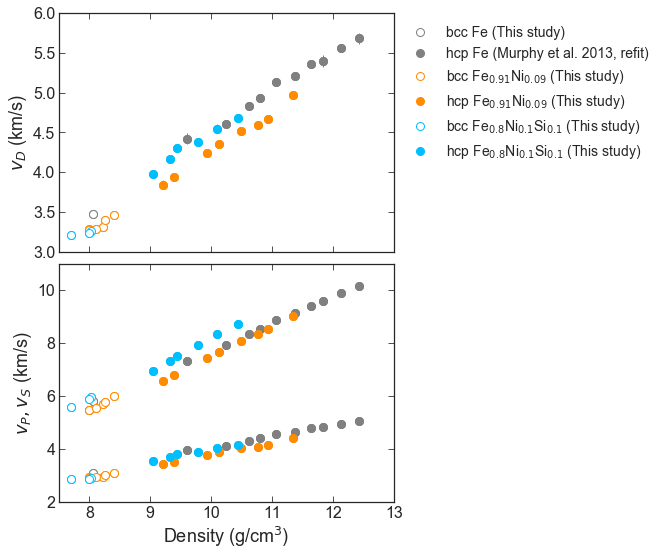

In [62]:
# Figure comparing velocity vs density for this study

studylist_crop = ['bccFe',
                  'hcpFe_Murphy',
                  'bccFeNi', 
                  'hcpFeNi', 
                  'bccFeNiSi', 
                  'hcpFeNiSi']

fig, (ax0, ax1) = plt.subplots(nrows = 2, ncols=1, sharex = True, figsize=(6, 9))

hlabels = []
for study in studylist_crop:
    df = precious_dfdict[study]

    h, = ax0.plot(df['rho'], df['vD'], marker=symbol[study], ms=symbolsize[study], color=colorchoice[study],
                   mfc=mfcchoice[study],  alpha = 1,
                   label=labelchoice[study],markeredgewidth=1,ls='none')

    ax0.errorbar(df['rho'], df['vD'], xerr=df['drho'], yerr=df['dvD'], alpha = 1,
                 marker=symbol[study], ms=symbolsize[study], color=colorchoice[study], 
                 mfc=mfcchoice[study],
                 label=labelchoice[study],markeredgewidth=1,ls='none',elinewidth=1)
    
    ax1.plot(df['rho'], df['vP'], marker=symbol[study], ms=symbolsize[study], color=colorchoice[study],
                   mfc=mfcchoice[study],  alpha = 1,
                   label=labelchoice[study],markeredgewidth=1,ls='none')

    ax1.errorbar(df['rho'], df['vP'], xerr=df['drho'], yerr=df['dvP'], alpha = 1,
                 marker=symbol[study], ms=symbolsize[study], color=colorchoice[study], 
                 mfc=mfcchoice[study],
                 label=labelchoice[study],markeredgewidth=1,ls='none',elinewidth=1)

    ax1.plot(df['rho'], df['vS'], marker=symbol[study], ms=symbolsize[study], color=colorchoice[study],
                   mfc=mfcchoice[study],  alpha = 1,
                   label=labelchoice[study],markeredgewidth=1,ls='none')

    ax1.errorbar(df['rho'], df['vS'], xerr=df['drho'], yerr=df['dvS'], alpha = 1,
                 marker=symbol[study], ms=symbolsize[study], color=colorchoice[study], 
                 mfc=mfcchoice[study],
                 label=labelchoice[study],markeredgewidth=1,ls='none',elinewidth=1)

    hlabels.append(h)

ax0.legend(fontsize=14,bbox_to_anchor=(1, 1),handles = hlabels)

ax0.set_xlim(7.5,13)
ax0.set_ylim(3,6)
ax0.tick_params(direction='in',right='on',top='on')
# ax0.set_xlabel(r'Density (g/cm^3)', fontsize=18)
ax0.set_ylabel(r'$v_{D}$ (km/s)', fontsize=18)

ax1.set_xlim(7.5,13)
ax1.set_ylim(2,11)
ax1.tick_params(direction='in',right='on',top='on')
ax1.set_xlabel(r'Density (g/cm$^3$)', fontsize=18)
ax1.set_ylabel(r'$v_{P}, v_{S}$ (km/s)', fontsize=18)

# Fine-tune figure; make subplots close to each other and hide x ticks for
# all but bottom plot.
fig.subplots_adjust(hspace=0.05,wspace=0)
plt.setp([ax0.get_xticklabels() for a in fig.axes[:1]], visible=False);

# plt.tight_layout()

fig = plt.gcf()
fig.savefig('FeAlloys_velocities.pdf', format='pdf', bbox_inches='tight')

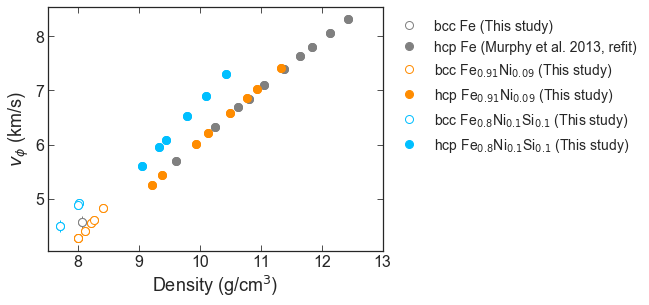

In [66]:
# Figure comparing velocity vs density for this study

studylist_crop = ['bccFe',
                  'hcpFe_Murphy',
                  'bccFeNi', 
                  'hcpFeNi', 
                  'bccFeNiSi', 
                  'hcpFeNiSi']

fig, (ax0) = plt.subplots(nrows = 1, ncols=1, figsize=(6, 4.5))

hlabels = []
for study in studylist_crop:
    df = precious_dfdict[study]

    h, = ax0.plot(df['rho'], df['vphi'], marker=symbol[study], ms=symbolsize[study], color=colorchoice[study],
                   mfc=mfcchoice[study],  alpha = 1,
                   label=labelchoice[study],markeredgewidth=1,ls='none')

    ax0.errorbar(df['rho'], df['vphi'], xerr=df['drho'], yerr=df['dvphi'], alpha = 1,
                 marker=symbol[study], ms=symbolsize[study], color=colorchoice[study], 
                 mfc=mfcchoice[study],
                 label=labelchoice[study],markeredgewidth=1,ls='none',elinewidth=1)
    
    hlabels.append(h)

ax0.legend(fontsize=14,bbox_to_anchor=(1, 1),handles = hlabels)

ax0.set_xlim(7.5,13)
# ax0.set_ylim(3,6)
ax0.tick_params(direction='in',right='on',top='on')
ax0.set_xlabel(r'Density (g/cm$^3$)', fontsize=18)
ax0.set_ylabel(r'$v_{\phi}$ (km/s)', fontsize=18)

fig = plt.gcf()
fig.savefig('FeAlloys_vphi.pdf', format='pdf', bbox_inches='tight')

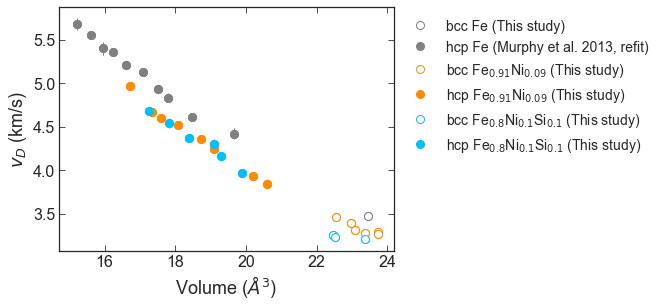

In [68]:
# Figure comparing velocity vs density for this study

studylist_crop = ['bccFe',
                  'hcpFe_Murphy',
                  'bccFeNi', 
                  'hcpFeNi', 
                  'bccFeNiSi', 
                  'hcpFeNiSi']

fig, (ax0) = plt.subplots(nrows = 1, ncols=1, figsize=(6, 4.5))

hlabels = []
for study in studylist_crop:
    df = precious_dfdict[study]

    h, = ax0.plot(df['V'], df['vD'], marker=symbol[study], ms=symbolsize[study], color=colorchoice[study],
                   mfc=mfcchoice[study],  alpha = 1,
                   label=labelchoice[study],markeredgewidth=1,ls='none')

    ax0.errorbar(df['V'], df['vD'], xerr=df['dV'], yerr=df['dvD'], alpha = 1,
                 marker=symbol[study], ms=symbolsize[study], color=colorchoice[study], 
                 mfc=mfcchoice[study],
                 label=labelchoice[study],markeredgewidth=1,ls='none',elinewidth=1)
    
    hlabels.append(h)

ax0.legend(fontsize=14,bbox_to_anchor=(1, 1),handles = hlabels)

# ax0.set_xlim(7.5,13)
# ax0.set_ylim(3,6)
ax0.tick_params(direction='in',right='on',top='on')
ax0.set_xlabel(r'Volume ($\AA^3$)', fontsize=18)
ax0.set_ylabel(r'$v_{D}$ (km/s)', fontsize=18)

fig = plt.gcf()
fig.savefig('FeAlloys_D_vs_V.pdf', format='pdf', bbox_inches='tight')

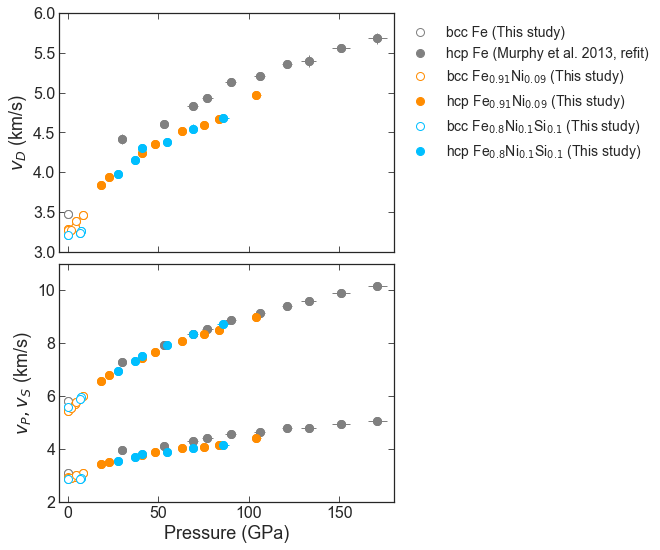

In [64]:
# Figure comparing velocity vs pressure for this study

studylist_crop = ['bccFe',
                  'hcpFe_Murphy',
                  'bccFeNi', 
                  'hcpFeNi', 
                  'bccFeNiSi', 
                  'hcpFeNiSi']

fig, (ax0, ax1) = plt.subplots(nrows = 2, ncols=1, sharex = True, figsize=(6, 9))

hlabels = []
for study in studylist_crop:
    df = precious_dfdict[study]

    h, = ax0.plot(df['P'], df['vD'], marker=symbol[study], ms=symbolsize[study], color=colorchoice[study],
                   mfc=mfcchoice[study],  alpha = 1,
                   label=labelchoice[study],markeredgewidth=1,ls='none')

    ax0.errorbar(df['P'], df['vD'], xerr=df['dP'], yerr=df['dvD'], alpha = 1,
                 marker=symbol[study], ms=symbolsize[study], color=colorchoice[study], 
                 mfc=mfcchoice[study],
                 label=labelchoice[study],markeredgewidth=1,ls='none',elinewidth=1)
    
    ax1.plot(df['P'], df['vP'], marker=symbol[study], ms=symbolsize[study], color=colorchoice[study],
                   mfc=mfcchoice[study],  alpha = 1,
                   label=labelchoice[study],markeredgewidth=1,ls='none')

    ax1.errorbar(df['P'], df['vP'], xerr=df['dP'], yerr=df['dvP'], alpha = 1,
                 marker=symbol[study], ms=symbolsize[study], color=colorchoice[study], 
                 mfc=mfcchoice[study],
                 label=labelchoice[study],markeredgewidth=1,ls='none',elinewidth=1)

    ax1.plot(df['P'], df['vS'], marker=symbol[study], ms=symbolsize[study], color=colorchoice[study],
                   mfc=mfcchoice[study],  alpha = 1,
                   label=labelchoice[study],markeredgewidth=1,ls='none')

    ax1.errorbar(df['P'], df['vS'], xerr=df['dP'], yerr=df['dvS'], alpha = 1,
                 marker=symbol[study], ms=symbolsize[study], color=colorchoice[study], 
                 mfc=mfcchoice[study],
                 label=labelchoice[study],markeredgewidth=1,ls='none',elinewidth=1)

    hlabels.append(h)

ax0.legend(fontsize=14,bbox_to_anchor=(1, 1),handles = hlabels)

ax0.set_xlim(-5,180)
ax0.set_ylim(3,6)
ax0.tick_params(direction='in',right='on',top='on')
ax0.set_ylabel(r'$v_{D}$ (km/s)', fontsize=18)

ax1.set_xlim(-5,180)
ax1.set_ylim(2,11)
ax1.tick_params(direction='in',right='on',top='on')
ax1.set_xlabel(r'Pressure (GPa)', fontsize=18)
ax1.set_ylabel(r'$v_{P}, v_{S}$ (km/s)', fontsize=18)

# Fine-tune figure; make subplots close to each other and hide x ticks for
# all but bottom plot.
fig.subplots_adjust(hspace=0.05,wspace=0)
plt.setp([ax0.get_xticklabels() for a in fig.axes[:1]], visible=False);

# plt.tight_layout()

fig = plt.gcf()
fig.savefig('FeAlloys_vel_vs_P.pdf', format='pdf', bbox_inches='tight')

## Plots comparing iron studies

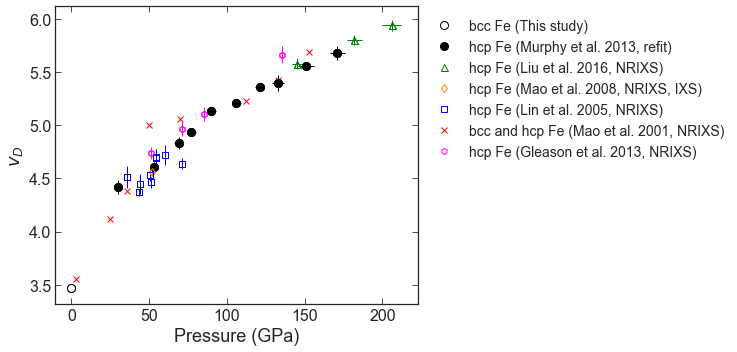

In [24]:
# Fe comparison Debye velocity plot as reported
alphaval = 1
x = 'P'
dx = 'dP'
y = 'vD'
dy = 'dvD'

fig, (ax0) = plt.subplots(nrows = 1, ncols=1, sharex=True, figsize=(6, 5))

hlabels = []

study = 'bccFe'
df = precious_dfdict[study]
color = 'black'
markersize = 8
h, = ax0.plot(df[x], df[y], marker=symbol[study], ms=markersize, color=color,
               mfc=mfcchoice[study],  alpha = alphaval,
               label=labelchoice[study],markeredgewidth=1,ls='none')
ax0.errorbar(df[x], df[y], xerr=df[dx], yerr=df[dy], alpha = alphaval,
                 marker=symbol[study], ms=markersize, color=color, 
                 mfc=mfcchoice[study],
                 label=labelchoice[study],markeredgewidth=1,ls='none',elinewidth=1) 
hlabels.append(h)

study = 'hcpFe_Murphy'
df = precious_dfdict[study]
color = 'black'
markersize = 8
h, = ax0.plot(df[x], df[y], marker=symbol[study], ms=markersize, color=color,
               mfc=color,  alpha = alphaval,
               label=labelchoice[study],markeredgewidth=1,ls='none')
ax0.errorbar(df[x], df[y], xerr=df[dx], yerr=df[dy], alpha = alphaval,
                 marker=symbol[study], ms=markersize, color=color, 
                 mfc=color,
                 label=labelchoice[study],markeredgewidth=1,ls='none',elinewidth=1) 
hlabels.append(h)

study = 'Liu2016_hcpFe'
df = precious_dfdict[study]
color = 'green'
marker = '^'
markersize = 7
h, = ax0.plot(df[x], df[y], marker=marker, ms=markersize, color=color,
               mfc=mfcchoice[study],  alpha = alphaval,
               label=labelchoice[study],markeredgewidth=1,ls='none')
ax0.errorbar(df[x], df[y], xerr=df[dx], yerr=df[dy], alpha = alphaval,
                 marker=marker, ms=markersize, color=color, 
                 mfc=mfcchoice[study],
                 label=labelchoice[study],markeredgewidth=1,ls='none',elinewidth=1)   
hlabels.append(h)

study = 'Mao2008_hcpFe'
df = precious_dfdict[study]
color = 'darkorange'
marker = 'd'
markersize = 6
h, = ax0.plot(df[x], df[y], marker=marker, ms=markersize, color=color,
               mfc=mfcchoice[study],  alpha = alphaval,
               label=labelchoice[study],markeredgewidth=1,ls='none')
ax0.errorbar(df[x], df[y], yerr=df[dy], alpha = alphaval,
                 marker=marker, ms=markersize, color=color, 
                 mfc=mfcchoice[study],
                 label=labelchoice[study],markeredgewidth=1,ls='none',elinewidth=1)
hlabels.append(h)

study = 'Lin2005_hcpFe'
df = precious_dfdict[study]
color = 'blue'
marker = 's'
markersize = 6
h, = ax0.plot(df[x], df[y], marker=marker, ms=markersize, color=color,
               mfc=mfcchoice[study],  alpha = alphaval,
               label=labelchoice[study],markeredgewidth=1,ls='none')
ax0.errorbar(df[x], df[y], yerr=df[dy], alpha = alphaval,
                 marker=marker, ms=markersize, color=color, 
                 mfc=mfcchoice[study],
                 label=labelchoice[study],markeredgewidth=1,ls='none',elinewidth=1)   
hlabels.append(h)

study = 'Mao2001_bccFe'
df = precious_dfdict[study]
color = 'red'
marker = 'x'
markersize = 6
ax0.plot(df[x], df[y], marker=marker, ms=markersize, color=color,
               mfc=mfcchoice[study],  alpha = alphaval,
               label=labelchoice[study],markeredgewidth=1,ls='none')

study = 'Mao2001_hcpFe'
df = precious_dfdict[study]
color = 'red'
marker = 'x'
markersize = 6
h, = ax0.plot(df[x], df[y], marker=marker, ms=markersize, color=color,
               mfc=mfcchoice[study],  alpha = alphaval,
               label='bcc and hcp Fe (Mao et al. 2001, NRIXS)',markeredgewidth=1,ls='none')
hlabels.append(h)

study = 'Gleason2013_hcpFe'
df = precious_dfdict[study]
color = 'magenta'
marker = 'h'
markersize = 6
h, = ax0.plot(df[x], df[y], marker=marker, ms=markersize, color=color,
               mfc=mfcchoice[study],  alpha = alphaval,
               label=labelchoice[study],markeredgewidth=1,ls='none')
ax0.errorbar(df[x], df[y], yerr=df[dy], alpha = alphaval,
                 marker=marker, ms=markersize, color=color, 
                 mfc=mfcchoice[study],
                 label=labelchoice[study],markeredgewidth=1,ls='none',elinewidth=1)   
hlabels.append(h)

ax0.legend(fontsize=14,bbox_to_anchor=(1.0, 1),handles = hlabels)

ax0.tick_params(direction='in',right='on',top='on')
ax0.set_xlabel(r'Pressure (GPa)', fontsize=18)
ax0.set_ylabel(r'$v_{D}$', fontsize=18)

plt.tight_layout()

fig = plt.gcf()
fig.savefig('hcpFeAlloys_vD_Fe.pdf', format='pdf', bbox_inches='tight')

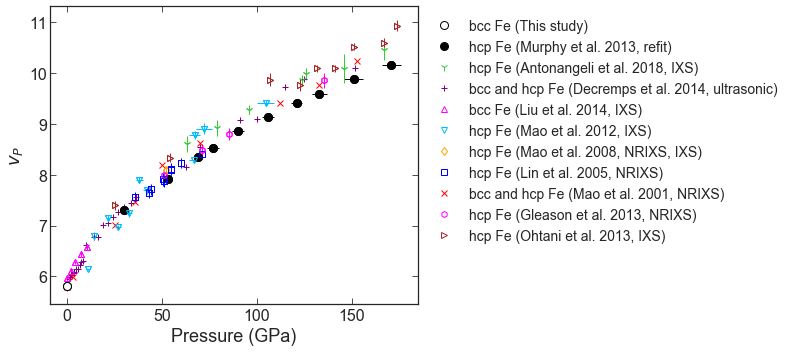

In [17]:
# Fe comparison compressional velocity plot as reported
alphaval = 1
x = 'P'
dx = 'dP'
y = 'vP'
dy = 'dvP'

fig, (ax0) = plt.subplots(nrows = 1, ncols=1, sharex=True, figsize=(6, 5))

hlabels = []

study = 'bccFe'
df = precious_dfdict[study]
color = 'black'
markersize = 8
h, = ax0.plot(df[x], df[y], marker=symbol[study], ms=markersize, color=color,
               mfc=mfcchoice[study],  alpha = alphaval,
               label=labelchoice[study],markeredgewidth=1,ls='none')
ax0.errorbar(df[x], df[y], xerr=df[dx], yerr=df[dy], alpha = alphaval,
                 marker=symbol[study], ms=markersize, color=color, 
                 mfc=mfcchoice[study],
                 label=labelchoice[study],markeredgewidth=1,ls='none',elinewidth=1) 
hlabels.append(h)

study = 'hcpFe_Murphy'
df = precious_dfdict[study]
color = 'black'
markersize = 8
h, = ax0.plot(df[x], df[y], marker=symbol[study], ms=markersize, color=color,
               mfc=color,  alpha = alphaval,
               label=labelchoice[study],markeredgewidth=1,ls='none')
ax0.errorbar(df[x], df[y], xerr=df[dx], yerr=df[dy], alpha = alphaval,
                 marker=symbol[study], ms=markersize, color=color, 
                 mfc=color,
                 label=labelchoice[study],markeredgewidth=1,ls='none',elinewidth=1) 
hlabels.append(h)

study = 'Antonangeli2018_hcpFe'
df = precious_dfdict[study]
color = 'limegreen'
marker = '1'
markersize = 7
h, = ax0.plot(df[x], df[y], marker=marker, ms=markersize, color=color,
               mfc=mfcchoice[study],  alpha = alphaval,
               label=labelchoice[study],markeredgewidth=1,ls='none')
ax0.errorbar(df[x], df[y], yerr=df[dy], alpha = alphaval,
                 marker=marker, ms=markersize, color=color, 
                 mfc=mfcchoice[study],
                 label=labelchoice[study],markeredgewidth=1,ls='none',elinewidth=1)
hlabels.append(h)

study = 'Decremps2014_bcchcpFe'
df = precious_dfdict[study]
color = 'purple'
marker = '+'
markersize = 6
h, = ax0.plot(df[x], df[y], marker=marker, ms=markersize, color=color,
               mfc=mfcchoice[study],  alpha = alphaval,
               label=labelchoice[study],markeredgewidth=1,ls='none')
hlabels.append(h)

study = 'Liu2014_bccFe'
df = precious_dfdict[study]
color = 'fuchsia'
marker = '^'
markersize = 6
h, = ax0.plot(df[x], df[y], marker=marker, ms=markersize, color=color,
               mfc=mfcchoice[study],  alpha = alphaval,
               label=labelchoice[study],markeredgewidth=1,ls='none')
ax0.errorbar(df[x], df[y], yerr=df[dy], alpha = alphaval,
                 marker=marker, ms=markersize, color=color, 
                 mfc=mfcchoice[study],
                 label=labelchoice[study],markeredgewidth=1,ls='none',elinewidth=1)
hlabels.append(h)

study = 'Mao2012_hcpFe'
df = precious_dfdict[study]
color = 'deepskyblue'
marker = 'v'
markersize = 6
h, = ax0.plot(df[x], df[y], marker=marker, ms=markersize, color=color,
               mfc=mfcchoice[study],  alpha = alphaval,
               label=labelchoice[study],markeredgewidth=1,ls='none')
ax0.errorbar(df[x], df[y], xerr=df[dx], yerr=df[dy], alpha = alphaval,
                 marker=marker, ms=markersize, color=color, 
                 mfc=mfcchoice[study],
                 label=labelchoice[study],markeredgewidth=1,ls='none',elinewidth=1)
hlabels.append(h)

study = 'Mao2008_hcpFe'
df = precious_dfdict[study]
color = 'orange'
marker = 'd'
markersize = 6
h, = ax0.plot(df[x], df[y], marker=marker, ms=markersize, color=color,
               mfc=mfcchoice[study],  alpha = alphaval,
               label=labelchoice[study],markeredgewidth=1,ls='none')
ax0.errorbar(df[x], df[y], yerr=df[dy], alpha = alphaval,
                 marker=marker, ms=markersize, color=color, 
                 mfc=mfcchoice[study],
                 label=labelchoice[study],markeredgewidth=1,ls='none',elinewidth=1)
hlabels.append(h)

study = 'Lin2005_hcpFe'
df = precious_dfdict[study]
color = 'blue'
marker = 's'
markersize = 6
h, = ax0.plot(df[x], df[y], marker=marker, ms=markersize, color=color,
               mfc=mfcchoice[study],  alpha = alphaval,
               label=labelchoice[study],markeredgewidth=1,ls='none')
ax0.errorbar(df[x], df[y], yerr=df[dy], alpha = alphaval,
                 marker=marker, ms=markersize, color=color, 
                 mfc=mfcchoice[study],
                 label=labelchoice[study],markeredgewidth=1,ls='none',elinewidth=1)   
hlabels.append(h)

study = 'Mao2001_bccFe'
df = precious_dfdict[study]
color = 'red'
marker = 'x'
markersize = 6
ax0.plot(df[x], df[y], marker=marker, ms=markersize, color=color,
               mfc=mfcchoice[study],  alpha = alphaval,
               label=labelchoice[study],markeredgewidth=1,ls='none')

study = 'Mao2001_hcpFe'
df = precious_dfdict[study]
color = 'red'
marker = 'x'
markersize = 6
h, = ax0.plot(df[x], df[y], marker=marker, ms=markersize, color=color,
               mfc=mfcchoice[study],  alpha = alphaval,
               label='bcc and hcp Fe (Mao et al. 2001, NRIXS)',markeredgewidth=1,ls='none')
hlabels.append(h)

study = 'Gleason2013_hcpFe'
df = precious_dfdict[study]
color = 'magenta'
marker = 'h'
markersize = 6
h, = ax0.plot(df[x], df[y], marker=marker, ms=markersize, color=color,
               mfc=mfcchoice[study],  alpha = alphaval,
               label=labelchoice[study],markeredgewidth=1,ls='none')
ax0.errorbar(df[x], df[y], yerr=df[dy], alpha = alphaval,
                 marker=marker, ms=markersize, color=color, 
                 mfc=mfcchoice[study],
                 label=labelchoice[study],markeredgewidth=1,ls='none',elinewidth=1)   
hlabels.append(h)

study = 'Ohtani2013_hcpFe'
df = precious_dfdict[study]
color = 'brown'
marker = '>'
markersize = 6
h, = ax0.plot(df[x], df[y], marker=marker, ms=markersize, color=color,
               mfc=mfcchoice[study],  alpha = alphaval,
               label=labelchoice[study],markeredgewidth=1,ls='none')
ax0.errorbar(df[x], df[y], yerr=df[dy], alpha = alphaval,
                 marker=marker, ms=markersize, color=color, 
                 mfc=mfcchoice[study],
                 label=labelchoice[study],markeredgewidth=1,ls='none',elinewidth=1)   
hlabels.append(h)


ax0.legend(fontsize=14,bbox_to_anchor=(1.0, 1),handles = hlabels)

ax0.tick_params(direction='in',right='on',top='on')
ax0.set_xlabel(r'Pressure (GPa)', fontsize=18)
ax0.set_ylabel(r'$v_{P}$', fontsize=18)

plt.tight_layout()

fig = plt.gcf()
fig.savefig('hcpFeAlloys_vP_Fe_uncorrected.pdf', format='pdf', bbox_inches='tight')

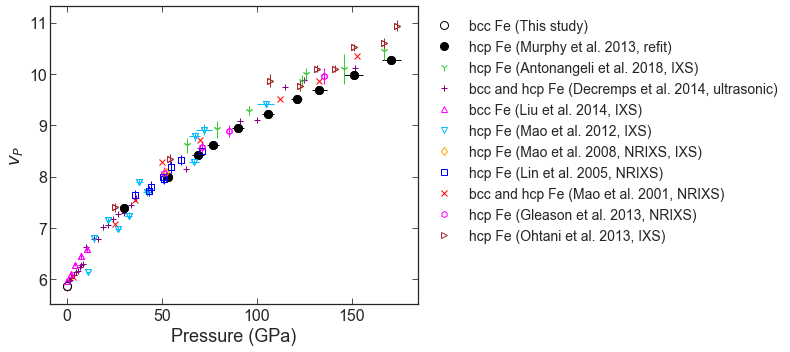

In [22]:
# Fe comparison compressional velocity plot corrected for natural enrichment
alphaval = 1
x = 'P'
dx = 'dP'
y = 'vP_nat'
dy = 'dvP_nat'

fig, (ax0) = plt.subplots(nrows = 1, ncols=1, sharex=True, figsize=(6, 5))

hlabels = []

study = 'bccFe'
df = precious_dfdict[study]
color = 'black'
markersize = 8
h, = ax0.plot(df[x], df[y], marker=symbol[study], ms=markersize, color=color,
               mfc=mfcchoice[study],  alpha = alphaval,
               label=labelchoice[study],markeredgewidth=1,ls='none')
ax0.errorbar(df[x], df[y], xerr=df[dx], yerr=df[dy], alpha = alphaval,
                 marker=symbol[study], ms=markersize, color=color, 
                 mfc=mfcchoice[study],
                 label=labelchoice[study],markeredgewidth=1,ls='none',elinewidth=1) 
hlabels.append(h)

study = 'hcpFe_Murphy'
df = precious_dfdict[study]
color = 'black'
markersize = 8
h, = ax0.plot(df[x], df[y], marker=symbol[study], ms=markersize, color=color,
               mfc=color,  alpha = alphaval,
               label=labelchoice[study],markeredgewidth=1,ls='none')
ax0.errorbar(df[x], df[y], xerr=df[dx], yerr=df[dy], alpha = alphaval,
                 marker=symbol[study], ms=markersize, color=color, 
                 mfc=color,
                 label=labelchoice[study],markeredgewidth=1,ls='none',elinewidth=1) 
hlabels.append(h)

study = 'Antonangeli2018_hcpFe'
df = precious_dfdict[study]
color = 'limegreen'
marker = '1'
markersize = 7
h, = ax0.plot(df[x], df[y], marker=marker, ms=markersize, color=color,
               mfc=mfcchoice[study],  alpha = alphaval,
               label=labelchoice[study],markeredgewidth=1,ls='none')
ax0.errorbar(df[x], df[y], yerr=df[dy], alpha = alphaval,
                 marker=marker, ms=markersize, color=color, 
                 mfc=mfcchoice[study],
                 label=labelchoice[study],markeredgewidth=1,ls='none',elinewidth=1)
hlabels.append(h)

study = 'Decremps2014_bcchcpFe'
df = precious_dfdict[study]
color = 'purple'
marker = '+'
markersize = 6
h, = ax0.plot(df[x], df[y], marker=marker, ms=markersize, color=color,
               mfc=mfcchoice[study],  alpha = alphaval,
               label=labelchoice[study],markeredgewidth=1,ls='none')
hlabels.append(h)

study = 'Liu2014_bccFe'
df = precious_dfdict[study]
color = 'fuchsia'
marker = '^'
markersize = 6
h, = ax0.plot(df[x], df[y], marker=marker, ms=markersize, color=color,
               mfc=mfcchoice[study],  alpha = alphaval,
               label=labelchoice[study],markeredgewidth=1,ls='none')
ax0.errorbar(df[x], df[y], yerr=df[dy], alpha = alphaval,
                 marker=marker, ms=markersize, color=color, 
                 mfc=mfcchoice[study],
                 label=labelchoice[study],markeredgewidth=1,ls='none',elinewidth=1)
hlabels.append(h)

study = 'Mao2012_hcpFe'
df = precious_dfdict[study]
color = 'deepskyblue'
marker = 'v'
markersize = 6
h, = ax0.plot(df[x], df[y], marker=marker, ms=markersize, color=color,
               mfc=mfcchoice[study],  alpha = alphaval,
               label=labelchoice[study],markeredgewidth=1,ls='none')
ax0.errorbar(df[x], df[y], xerr=df[dx], yerr=df[dy], alpha = alphaval,
                 marker=marker, ms=markersize, color=color, 
                 mfc=mfcchoice[study],
                 label=labelchoice[study],markeredgewidth=1,ls='none',elinewidth=1)
hlabels.append(h)

study = 'Mao2008_hcpFe'
df = precious_dfdict[study]
color = 'orange'
marker = 'd'
markersize = 6
h, = ax0.plot(df[x], df[y], marker=marker, ms=markersize, color=color,
               mfc=mfcchoice[study],  alpha = alphaval,
               label=labelchoice[study],markeredgewidth=1,ls='none')
ax0.errorbar(df[x], df[y], yerr=df[dy], alpha = alphaval,
                 marker=marker, ms=markersize, color=color, 
                 mfc=mfcchoice[study],
                 label=labelchoice[study],markeredgewidth=1,ls='none',elinewidth=1)
hlabels.append(h)

study = 'Lin2005_hcpFe'
df = precious_dfdict[study]
color = 'blue'
marker = 's'
markersize = 6
h, = ax0.plot(df[x], df[y], marker=marker, ms=markersize, color=color,
               mfc=mfcchoice[study],  alpha = alphaval,
               label=labelchoice[study],markeredgewidth=1,ls='none')
ax0.errorbar(df[x], df[y], yerr=df[dy], alpha = alphaval,
                 marker=marker, ms=markersize, color=color, 
                 mfc=mfcchoice[study],
                 label=labelchoice[study],markeredgewidth=1,ls='none',elinewidth=1)   
hlabels.append(h)

study = 'Mao2001_bccFe'
df = precious_dfdict[study]
color = 'red'
marker = 'x'
markersize = 6
ax0.plot(df[x], df[y], marker=marker, ms=markersize, color=color,
               mfc=mfcchoice[study],  alpha = alphaval,
               label=labelchoice[study],markeredgewidth=1,ls='none')

study = 'Mao2001_hcpFe'
df = precious_dfdict[study]
color = 'red'
marker = 'x'
markersize = 6
h, = ax0.plot(df[x], df[y], marker=marker, ms=markersize, color=color,
               mfc=mfcchoice[study],  alpha = alphaval,
               label='bcc and hcp Fe (Mao et al. 2001, NRIXS)',markeredgewidth=1,ls='none')
hlabels.append(h)

study = 'Gleason2013_hcpFe'
df = precious_dfdict[study]
color = 'magenta'
marker = 'h'
markersize = 6
h, = ax0.plot(df[x], df[y], marker=marker, ms=markersize, color=color,
               mfc=mfcchoice[study],  alpha = alphaval,
               label=labelchoice[study],markeredgewidth=1,ls='none')
ax0.errorbar(df[x], df[y], yerr=df[dy], alpha = alphaval,
                 marker=marker, ms=markersize, color=color, 
                 mfc=mfcchoice[study],
                 label=labelchoice[study],markeredgewidth=1,ls='none',elinewidth=1)   
hlabels.append(h)

study = 'Ohtani2013_hcpFe'
df = precious_dfdict[study]
color = 'brown'
marker = '>'
markersize = 6
h, = ax0.plot(df[x], df[y], marker=marker, ms=markersize, color=color,
               mfc=mfcchoice[study],  alpha = alphaval,
               label=labelchoice[study],markeredgewidth=1,ls='none')
ax0.errorbar(df[x], df[y], yerr=df[dy], alpha = alphaval,
                 marker=marker, ms=markersize, color=color, 
                 mfc=mfcchoice[study],
                 label=labelchoice[study],markeredgewidth=1,ls='none',elinewidth=1)   
hlabels.append(h)

ax0.legend(fontsize=14,bbox_to_anchor=(1.0, 1),handles = hlabels)

ax0.tick_params(direction='in',right='on',top='on')
ax0.set_xlabel(r'Pressure (GPa)', fontsize=18)
ax0.set_ylabel(r'$v_{P}$', fontsize=18)

plt.tight_layout()

fig = plt.gcf()
fig.savefig('hcpFeAlloys_vP_Fe_nat.pdf', format='pdf', bbox_inches='tight')

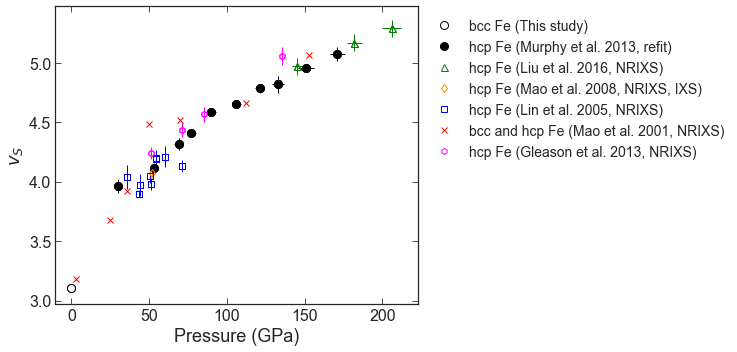

In [56]:
# Fe comparison of shear velocity plot as reported
alphaval = 1
x = 'P'
dx = 'dP'
y = 'vS'
dy = 'dvS'

fig, (ax0) = plt.subplots(nrows = 1, ncols=1, sharex=True, figsize=(6, 5))

hlabels = []

study = 'bccFe'
df = precious_dfdict[study]
color = 'black'
markersize = 8
h, = ax0.plot(df[x], df[y], marker=symbol[study], ms=markersize, color=color,
               mfc=mfcchoice[study],  alpha = alphaval,
               label=labelchoice[study],markeredgewidth=1,ls='none')
ax0.errorbar(df[x], df[y], xerr=df[dx], yerr=df[dy], alpha = alphaval,
                 marker=symbol[study], ms=markersize, color=color, 
                 mfc=mfcchoice[study],
                 label=labelchoice[study],markeredgewidth=1,ls='none',elinewidth=1) 
hlabels.append(h)

study = 'hcpFe_Murphy'
df = precious_dfdict[study]
color = 'black'
markersize = 8
h, = ax0.plot(df[x], df[y], marker=symbol[study], ms=markersize, color=color,
               mfc=color,  alpha = alphaval,
               label=labelchoice[study],markeredgewidth=1,ls='none')
ax0.errorbar(df[x], df[y], xerr=df[dx], yerr=df[dy], alpha = alphaval,
                 marker=symbol[study], ms=markersize, color=color, 
                 mfc=color,
                 label=labelchoice[study],markeredgewidth=1,ls='none',elinewidth=1) 
hlabels.append(h)

study = 'Liu2016_hcpFe'
df = precious_dfdict[study]
color = 'green'
marker = '^'
markersize = 7
h, = ax0.plot(df[x], df[y], marker=marker, ms=markersize, color=color,
               mfc=mfcchoice[study],  alpha = alphaval,
               label=labelchoice[study],markeredgewidth=1,ls='none')
ax0.errorbar(df[x], df[y], xerr=df[dx], yerr=df[dy], alpha = alphaval,
                 marker=marker, ms=markersize, color=color, 
                 mfc=mfcchoice[study],
                 label=labelchoice[study],markeredgewidth=1,ls='none',elinewidth=1)   
hlabels.append(h)

study = 'Mao2008_hcpFe_NRIXS'
df = precious_dfdict[study]
color = 'darkorange'
marker = 'd'
markersize = 6
h, = ax0.plot(df[x], df[y], marker=marker, ms=markersize, color=color,
               mfc=mfcchoice[study],  alpha = alphaval,
               label=labelchoice[study],markeredgewidth=1,ls='none')
ax0.errorbar(df[x], df[y], yerr=df[dy], alpha = alphaval,
                 marker=marker, ms=markersize, color=color, 
                 mfc=mfcchoice[study],
                 label=labelchoice[study],markeredgewidth=1,ls='none',elinewidth=1)
hlabels.append(h)

study = 'Lin2005_hcpFe'
df = precious_dfdict[study]
color = 'blue'
marker = 's'
markersize = 6
h, = ax0.plot(df[x], df[y], marker=marker, ms=markersize, color=color,
               mfc=mfcchoice[study],  alpha = alphaval,
               label=labelchoice[study],markeredgewidth=1,ls='none')
ax0.errorbar(df[x], df[y], yerr=df[dy], alpha = alphaval,
                 marker=marker, ms=markersize, color=color, 
                 mfc=mfcchoice[study],
                 label=labelchoice[study],markeredgewidth=1,ls='none',elinewidth=1)   
hlabels.append(h)

study = 'Mao2001_bccFe'
df = precious_dfdict[study]
color = 'red'
marker = 'x'
markersize = 6
ax0.plot(df[x], df[y], marker=marker, ms=markersize, color=color,
               mfc=mfcchoice[study],  alpha = alphaval,
               label=labelchoice[study],markeredgewidth=1,ls='none')

study = 'Mao2001_hcpFe'
df = precious_dfdict[study]
color = 'red'
marker = 'x'
markersize = 6
h, = ax0.plot(df[x], df[y], marker=marker, ms=markersize, color=color,
               mfc=mfcchoice[study],  alpha = alphaval,
               label='bcc and hcp Fe (Mao et al. 2001, NRIXS)',markeredgewidth=1,ls='none')
hlabels.append(h)

study = 'Gleason2013_hcpFe'
df = precious_dfdict[study]
color = 'magenta'
marker = 'h'
markersize = 6
h, = ax0.plot(df[x], df[y], marker=marker, ms=markersize, color=color,
               mfc=mfcchoice[study],  alpha = alphaval,
               label=labelchoice[study],markeredgewidth=1,ls='none')
ax0.errorbar(df[x], df[y], yerr=df[dy], alpha = alphaval,
                 marker=marker, ms=markersize, color=color, 
                 mfc=mfcchoice[study],
                 label=labelchoice[study],markeredgewidth=1,ls='none',elinewidth=1)   
hlabels.append(h)

ax0.legend(fontsize=14,bbox_to_anchor=(1.0, 1),handles = hlabels)

ax0.tick_params(direction='in',right='on',top='on')
ax0.set_xlabel(r'Pressure (GPa)', fontsize=18)
ax0.set_ylabel(r'$v_{S}$', fontsize=18)

plt.tight_layout()

fig = plt.gcf()
fig.savefig('hcpFeAlloys_vS_Fe_uncorrected.pdf', format='pdf', bbox_inches='tight')

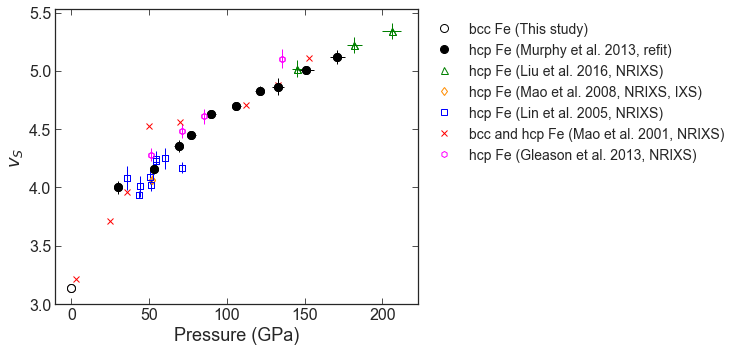

In [57]:
# Fe comparison of shear velocity plot corrected for natural enrichment
alphaval = 1
x = 'P'
dx = 'dP'
y = 'vS_nat'
dy = 'dvS_nat'

fig, (ax0) = plt.subplots(nrows = 1, ncols=1, sharex=True, figsize=(6, 5))

hlabels = []

study = 'bccFe'
df = precious_dfdict[study]
color = 'black'
markersize = 8
h, = ax0.plot(df[x], df[y], marker=symbol[study], ms=markersize, color=color,
               mfc=mfcchoice[study],  alpha = alphaval,
               label=labelchoice[study],markeredgewidth=1,ls='none')
ax0.errorbar(df[x], df[y], xerr=df[dx], yerr=df[dy], alpha = alphaval,
                 marker=symbol[study], ms=markersize, color=color, 
                 mfc=mfcchoice[study],
                 label=labelchoice[study],markeredgewidth=1,ls='none',elinewidth=1) 
hlabels.append(h)

study = 'hcpFe_Murphy'
df = precious_dfdict[study]
color = 'black'
markersize = 8
h, = ax0.plot(df[x], df[y], marker=symbol[study], ms=markersize, color=color,
               mfc=color,  alpha = alphaval,
               label=labelchoice[study],markeredgewidth=1,ls='none')
ax0.errorbar(df[x], df[y], xerr=df[dx], yerr=df[dy], alpha = alphaval,
                 marker=symbol[study], ms=markersize, color=color, 
                 mfc=color,
                 label=labelchoice[study],markeredgewidth=1,ls='none',elinewidth=1) 
hlabels.append(h)

study = 'Liu2016_hcpFe'
df = precious_dfdict[study]
color = 'green'
marker = '^'
markersize = 7
h, = ax0.plot(df[x], df[y], marker=marker, ms=markersize, color=color,
               mfc=mfcchoice[study],  alpha = alphaval,
               label=labelchoice[study],markeredgewidth=1,ls='none')
ax0.errorbar(df[x], df[y], xerr=df[dx], yerr=df[dy], alpha = alphaval,
                 marker=marker, ms=markersize, color=color, 
                 mfc=mfcchoice[study],
                 label=labelchoice[study],markeredgewidth=1,ls='none',elinewidth=1)   
hlabels.append(h)

study = 'Mao2008_hcpFe'
df = precious_dfdict[study]
color = 'darkorange'
marker = 'd'
markersize = 6
h, = ax0.plot(df[x], df[y], marker=marker, ms=markersize, color=color,
               mfc=mfcchoice[study],  alpha = alphaval,
               label=labelchoice[study],markeredgewidth=1,ls='none')
ax0.errorbar(df[x], df[y], yerr=df[dy], alpha = alphaval,
                 marker=marker, ms=markersize, color=color, 
                 mfc=mfcchoice[study],
                 label=labelchoice[study],markeredgewidth=1,ls='none',elinewidth=1)
hlabels.append(h)

study = 'Lin2005_hcpFe'
df = precious_dfdict[study]
color = 'blue'
marker = 's'
markersize = 6
h, = ax0.plot(df[x], df[y], marker=marker, ms=markersize, color=color,
               mfc=mfcchoice[study],  alpha = alphaval,
               label=labelchoice[study],markeredgewidth=1,ls='none')
ax0.errorbar(df[x], df[y], yerr=df[dy], alpha = alphaval,
                 marker=marker, ms=markersize, color=color, 
                 mfc=mfcchoice[study],
                 label=labelchoice[study],markeredgewidth=1,ls='none',elinewidth=1)   
hlabels.append(h)

study = 'Mao2001_bccFe'
df = precious_dfdict[study]
color = 'red'
marker = 'x'
markersize = 6
ax0.plot(df[x], df[y], marker=marker, ms=markersize, color=color,
               mfc=mfcchoice[study],  alpha = alphaval,
               label=labelchoice[study],markeredgewidth=1,ls='none')

study = 'Mao2001_hcpFe'
df = precious_dfdict[study]
color = 'red'
marker = 'x'
markersize = 6
h, = ax0.plot(df[x], df[y], marker=marker, ms=markersize, color=color,
               mfc=mfcchoice[study],  alpha = alphaval,
               label='bcc and hcp Fe (Mao et al. 2001, NRIXS)',markeredgewidth=1,ls='none')
hlabels.append(h)

study = 'Gleason2013_hcpFe'
df = precious_dfdict[study]
color = 'magenta'
marker = 'h'
markersize = 6
h, = ax0.plot(df[x], df[y], marker=marker, ms=markersize, color=color,
               mfc=mfcchoice[study],  alpha = alphaval,
               label=labelchoice[study],markeredgewidth=1,ls='none')
ax0.errorbar(df[x], df[y], yerr=df[dy], alpha = alphaval,
                 marker=marker, ms=markersize, color=color, 
                 mfc=mfcchoice[study],
                 label=labelchoice[study],markeredgewidth=1,ls='none',elinewidth=1)   
hlabels.append(h)


ax0.legend(fontsize=14,bbox_to_anchor=(1.0, 1),handles = hlabels)

ax0.tick_params(direction='in',right='on',top='on')
ax0.set_xlabel(r'Pressure (GPa)', fontsize=18)
ax0.set_ylabel(r'$v_{S}$', fontsize=18)

plt.tight_layout()

fig = plt.gcf()
fig.savefig('hcpFeAlloys_vS_Fe_nat.pdf', format='pdf', bbox_inches='tight')

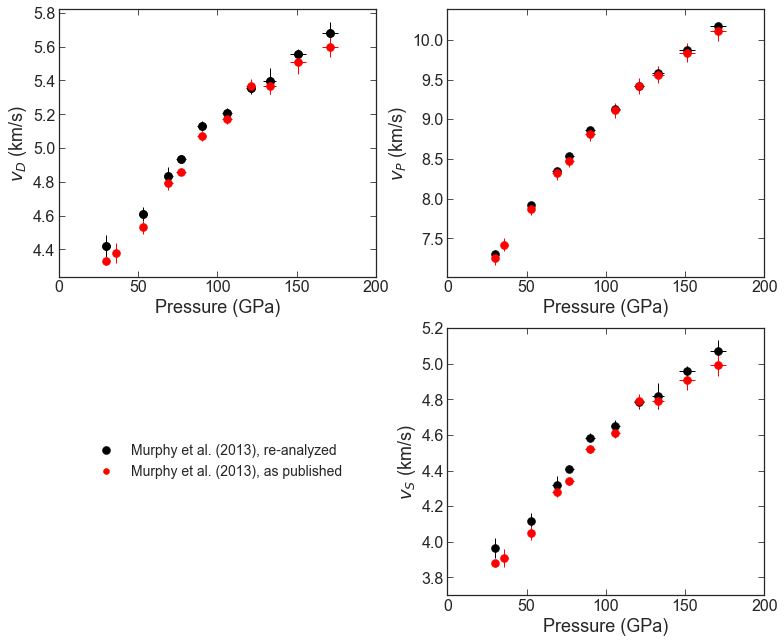

In [38]:
# Fe sound velocity - comparison of this study and Murphy 2013

fig, ((ax0,ax2),(ax1,ax3)) = plt.subplots(nrows = 2, ncols=2, figsize=(11, 9))

# Fe comparison Debye velocity plot
alphaval = 1
x = 'P'
dx = 'dP'
y = 'vD'
dy = 'dvD'

# Murphy's values refit
study = 'hcpFe_Murphy'
df = precious_dfdict[study]
color = 'black'
ecolor = 'black'
markersize = 8
h2, = ax0.plot(df[x], df[y], marker=symbol[study], ms=symbolsize[study], color=ecolor,
               mfc=color,  alpha = alphaval,
               label='Murphy et al. (2013), re-analyzed',markeredgewidth=0.5,ls='none')
ax0.errorbar(df[x], df[y], xerr=df[dx], yerr=df[dy], alpha = alphaval,
                 marker=symbol[study], ms=markersize, color=ecolor, 
                 mfc=color,markeredgewidth=0.5,ls='none',elinewidth=1) 

# Murphy's published values
study = 'Murphy2013_hcpFe'
df = precious_dfdict[study]
color = 'red'
ecolor = 'red'
markersize = 8
h3, = ax0.plot(df[x], df[y], marker=symbol[study], ms=symbolsize[study], color=ecolor,
               mfc=color,  alpha = alphaval,
               label='Murphy et al. (2013), as published',markeredgewidth=0.5,ls='none')
ax0.errorbar(df[x], df[y], xerr=df[dx], yerr=df[dy], alpha = alphaval,
                 marker=symbol[study], ms=markersize, color=ecolor, 
                 mfc=color,markeredgewidth=0.5,ls='none',elinewidth=1) 


ax0.tick_params(direction='in',right='on',top='on')
ax0.set_xlabel(r'Pressure (GPa)', fontsize=18)
ax0.set_ylabel(r'$v_{D}$ (km/s)', fontsize=18)
ax0.set_xlim([0,200])


# Fe comparison compressional velocity plot
alphaval = 1
x = 'P'
dx = 'dP'
y = 'vP'
dy = 'dvP'

study = 'hcpFe_Murphy'
df = precious_dfdict[study]
color = 'black'
ecolor = 'black'
markersize = 8
ax2.errorbar(df[x], df[y], xerr=df[dx], yerr=df[dy], alpha = alphaval,
                 marker=symbol[study], ms=markersize, color=ecolor, 
                 mfc=color,markeredgewidth=0.5,ls='none',elinewidth=1) 

# Murphy's published values
study = 'Murphy2013_hcpFe'
df = precious_dfdict[study]
color = 'red'
ecolor = 'red'
markersize = 8
ax2.errorbar(df[x], df[y], xerr=df[dx], yerr=df[dy], alpha = alphaval,
                 marker=symbol[study], ms=markersize, color=ecolor, 
                 mfc=color,markeredgewidth=0.5,ls='none',elinewidth=1) 

ax2.tick_params(direction='in',right='on',top='on')
ax2.set_xlabel(r'Pressure (GPa)', fontsize=18)
ax2.set_ylabel(r'$v_{P}$ (km/s)', fontsize=18)
ax2.set_xlim([0,200])



# Fe comparison of shear velocity plot
alphaval = 1
x = 'P'
dx = 'dP'
y = 'vS'
dy = 'dvS'

study = 'hcpFe_Murphy'
df = precious_dfdict[study]
color = 'black'
ecolor = 'black'
markersize = 8
ax3.errorbar(df[x], df[y], xerr=df[dx], yerr=df[dy], alpha = alphaval,
                 marker=symbol[study], ms=markersize, color=ecolor, 
                 mfc=color,markeredgewidth=0.5,ls='none',elinewidth=1) 

# Murphy's published values
study = 'Murphy2013_hcpFe'
df = precious_dfdict[study]
color = 'red'
ecolor = 'red'
markersize = 8
ax3.errorbar(df[x], df[y], xerr=df[dx], yerr=df[dy], alpha = alphaval,
                 marker=symbol[study], ms=markersize, color=ecolor, 
                 mfc=color,markeredgewidth=0.5,ls='none',elinewidth=1) 

ax3.tick_params(direction='in',right='on',top='on')
ax3.set_xlabel(r'Pressure (GPa)', fontsize=18)
ax3.set_ylabel(r'$v_{S}$ (km/s)', fontsize=18)
ax3.set_xlim([0,200])
ax3.set_ylim([3.7,5.2])


# Plot details
ax1.tick_params(direction='in',left='off',bottom='off')
ax1.set_xticklabels([])
ax1.set_yticklabels([])
# ax1.spines['top'].set_visible(False)
ax1.set_frame_on(False)

# Legend
hlabels = [h2,h3]
# ax2.legend(fontsize=14,bbox_to_anchor=(1.0, 1),handles = hlabels)
ax1.legend(fontsize=14,loc=10,handles = hlabels)

# fig.subplots_adjust(hspace=0.3,wspace=0.3)

plt.tight_layout()

fig = plt.gcf()
fig.savefig('Fe_velocities_MurphyComp.pdf', format='pdf', bbox_inches='tight', transparent=True)

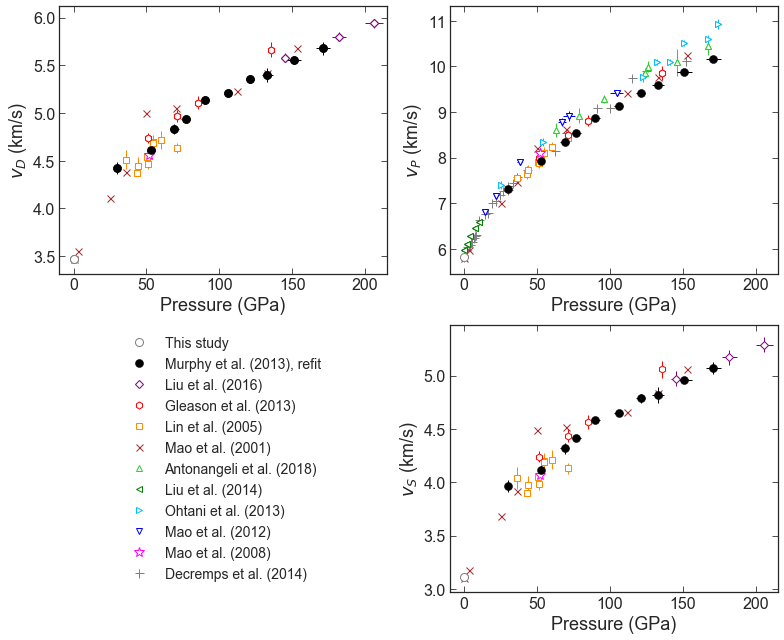

In [26]:
# Fe sound velocity plot as reported

fig, ((ax0,ax2),(ax1,ax3)) = plt.subplots(nrows = 2, ncols=2, figsize=(11, 9))

# Fe comparison Debye velocity plot
alphaval = 1
x = 'P'
dx = 'dP'
y = 'vD'
dy = 'dvD'

study = 'Liu2016_hcpFe'
df = precious_dfdict[study]
color = 'green'
marker = '^'
markersize = 7
h3, = ax0.plot(df[x], df[y], marker=symbol[study], ms=symbolsize[study], color=colorchoice[study],
               mfc=mfcchoice[study],  alpha = alphaval,
               label=labelchoice[study],markeredgewidth=1,ls='none')
ax0.errorbar(df[x], df[y], xerr=df[dx], yerr=df[dy], alpha = alphaval,
                 marker=symbol[study], ms=symbolsize[study], color=colorchoice[study], 
                 mfc=mfcchoice[study],
                 label=labelchoice[study],markeredgewidth=1,ls='none',elinewidth=1)   

study = 'Lin2005_hcpFe'
df = precious_dfdict[study]
color = 'blue'
marker = 's'
markersize = 6
h5, = ax0.plot(df[x], df[y], marker=symbol[study], ms=symbolsize[study], color=colorchoice[study],
               mfc=mfcchoice[study],  alpha = alphaval,
               label=labelchoice[study],markeredgewidth=1,ls='none')
ax0.errorbar(df[x], df[y], yerr=df[dy], alpha = alphaval,
                 marker=symbol[study], ms=symbolsize[study], color=colorchoice[study], 
                 mfc=mfcchoice[study],
                 label=labelchoice[study],markeredgewidth=1,ls='none',elinewidth=1)   

study = 'Mao2001_bccFe'
df = precious_dfdict[study]
color = 'red'
marker = 'x'
markersize = 6
h6, = ax0.plot(df[x], df[y], marker=symbol[study], ms=symbolsize[study], color=colorchoice[study],
               mfc=mfcchoice[study],  alpha = alphaval,
               label=labelchoice[study],markeredgewidth=1,ls='none')

study = 'Mao2001_hcpFe'
df = precious_dfdict[study]
color = 'red'
marker = 'x'
markersize = 6
ax0.plot(df[x], df[y], marker=symbol[study], ms=symbolsize[study], color=colorchoice[study],
               mfc=mfcchoice[study],  alpha = alphaval,
               label='bcc and hcp Fe (Mao et al. 2001, NRIXS)',markeredgewidth=1,ls='none')

study = 'Gleason2013_hcpFe'
df = precious_dfdict[study]
color = 'magenta'
marker = 'h'
markersize = 6
h4, = ax0.plot(df[x], df[y], marker=symbol[study], ms=symbolsize[study], color=colorchoice[study],
               mfc=mfcchoice[study],  alpha = alphaval,
               label=labelchoice[study],markeredgewidth=1,ls='none')
ax0.errorbar(df[x], df[y], yerr=df[dy], alpha = alphaval,
                 marker=symbol[study], ms=symbolsize[study], color=colorchoice[study], 
                 mfc=mfcchoice[study],
                 label=labelchoice[study],markeredgewidth=1,ls='none',elinewidth=1)   

study = 'Mao2008_hcpFe'
df = precious_dfdict[study]
color = 'darkorange'
marker = 'd'
markersize = 6
h11, = ax0.plot(df[x], df[y], marker=symbol[study], ms=symbolsize[study], color=colorchoice[study],
               mfc=mfcchoice[study],  alpha = alphaval,
               label=labelchoice[study],markeredgewidth=1,ls='none')
ax0.errorbar(df[x], df[y], yerr=df[dy], alpha = alphaval,
                 marker=symbol[study], ms=symbolsize[study], color=colorchoice[study], 
                 mfc=mfcchoice[study],
                 label=labelchoice[study],markeredgewidth=1,ls='none',elinewidth=1)

study = 'bccFe'
df = precious_dfdict[study]
color = 'black'
markersize = 8
h1, = ax0.plot(df[x], df[y], marker=symbol[study], ms=symbolsize[study], color=colorchoice[study],
               mfc=mfcchoice[study],  alpha = alphaval,
               label='This study',markeredgewidth=1,ls='none')
ax0.errorbar(df[x], df[y], xerr=df[dx], yerr=df[dy], alpha = alphaval,
                 marker=symbol[study], ms=symbolsize[study], color=colorchoice[study], 
                 mfc=mfcchoice[study],
                 label=labelchoice[study],markeredgewidth=1,ls='none',elinewidth=1) 

study = 'hcpFe_Murphy'
df = precious_dfdict[study]
color = 'black'
ecolor = 'black'
markersize = 8
h2, = ax0.plot(df[x], df[y], marker=symbol[study], ms=symbolsize[study], color=ecolor,
               mfc=color,  alpha = alphaval,
               label='Murphy et al. (2013), refit',markeredgewidth=0.5,ls='none')
ax0.errorbar(df[x], df[y], xerr=df[dx], yerr=df[dy], alpha = alphaval,
                 marker=symbol[study], ms=markersize, color=ecolor, 
                 mfc=color,markeredgewidth=0.5,ls='none',elinewidth=1) 

ax0.tick_params(direction='in',right='on',top='on')
ax0.set_xlabel(r'Pressure (GPa)', fontsize=18)
ax0.set_ylabel(r'$v_{D}$ (km/s)', fontsize=18)
ax0.set_xlim([-10,215])


# Fe comparison compressional velocity plot
alphaval = 1
x = 'P'
dx = 'dP'
y = 'vP'
dy = 'dvP'

study = 'Antonangeli2018_hcpFe'
df = precious_dfdict[study]
color = 'limegreen'
marker = '1'
markersize = 7
h7, = ax2.plot(df[x], df[y], marker=symbol[study], ms=symbolsize[study], color=colorchoice[study],
               mfc=mfcchoice[study],  alpha = alphaval,
               label=labelchoice[study],markeredgewidth=1,ls='none')
ax2.errorbar(df[x], df[y], yerr=df[dy], alpha = alphaval,
                 marker=symbol[study], ms=symbolsize[study], color=colorchoice[study], 
                 mfc=mfcchoice[study],
                 label=labelchoice[study],markeredgewidth=1,ls='none',elinewidth=1)

study = 'Decremps2014_bcchcpFe'
df = precious_dfdict[study]
color = 'purple'
marker = '+'
markersize = 6
h12, = ax2.plot(df[x], df[y], marker=symbol[study], ms=symbolsize[study], color=colorchoice[study],
               mfc=mfcchoice[study],  alpha = alphaval,
               label=labelchoice[study],markeredgewidth=1,ls='none')

study = 'Liu2014_bccFe'
df = precious_dfdict[study]
color = 'fuchsia'
marker = '^'
markersize = 6
h8, = ax2.plot(df[x], df[y], marker=symbol[study], ms=symbolsize[study], color=colorchoice[study],
               mfc=mfcchoice[study],  alpha = alphaval,
               label=labelchoice[study],markeredgewidth=1,ls='none')
ax2.errorbar(df[x], df[y], yerr=df[dy], alpha = alphaval,
                 marker=symbol[study], ms=symbolsize[study], color=colorchoice[study], 
                 mfc=mfcchoice[study],
                 label=labelchoice[study],markeredgewidth=1,ls='none',elinewidth=1)

study = 'Mao2012_hcpFe'
df = precious_dfdict[study]
color = 'deepskyblue'
marker = 'v'
markersize = 6
h10, = ax2.plot(df[x], df[y], marker=symbol[study], ms=symbolsize[study], color=colorchoice[study],
               mfc=mfcchoice[study],  alpha = alphaval,
               label=labelchoice[study],markeredgewidth=1,ls='none')
ax2.errorbar(df[x], df[y], xerr=df[dx], yerr=df[dy], alpha = alphaval,
                 marker=symbol[study], ms=symbolsize[study], color=colorchoice[study], 
                 mfc=mfcchoice[study],
                 label=labelchoice[study],markeredgewidth=1,ls='none',elinewidth=1)

study = 'Lin2005_hcpFe'
df = precious_dfdict[study]
color = 'blue'
marker = 's'
markersize = 6
ax2.plot(df[x], df[y], marker=symbol[study], ms=symbolsize[study], color=colorchoice[study],
               mfc=mfcchoice[study],  alpha = alphaval,
               label=labelchoice[study],markeredgewidth=1,ls='none')
ax2.errorbar(df[x], df[y], yerr=df[dy], alpha = alphaval,
                 marker=symbol[study], ms=symbolsize[study], color=colorchoice[study], 
                 mfc=mfcchoice[study],
                 label=labelchoice[study],markeredgewidth=1,ls='none',elinewidth=1)   

study = 'Mao2001_bccFe'
df = precious_dfdict[study]
color = 'red'
marker = 'x'
markersize = 6
ax2.plot(df[x], df[y], marker=symbol[study], ms=symbolsize[study], color=colorchoice[study],
               mfc=mfcchoice[study],  alpha = alphaval,
               label=labelchoice[study],markeredgewidth=1,ls='none')

study = 'Mao2001_hcpFe'
df = precious_dfdict[study]
color = 'red'
marker = 'x'
markersize = 6
ax2.plot(df[x], df[y], marker=symbol[study], ms=symbolsize[study], color=colorchoice[study],
               mfc=mfcchoice[study],  alpha = alphaval,
               label='bcc and hcp Fe (Mao et al. 2001, NRIXS)',markeredgewidth=1,ls='none')

study = 'Gleason2013_hcpFe'
df = precious_dfdict[study]
color = 'magenta'
marker = 'h'
markersize = 6
ax2.plot(df[x], df[y], marker=symbol[study], ms=symbolsize[study], color=colorchoice[study],
               mfc=mfcchoice[study],  alpha = alphaval,
               label=labelchoice[study],markeredgewidth=1,ls='none')
ax2.errorbar(df[x], df[y], yerr=df[dy], alpha = alphaval,
                 marker=symbol[study], ms=symbolsize[study], color=colorchoice[study], 
                 mfc=mfcchoice[study],
                 label=labelchoice[study],markeredgewidth=1,ls='none',elinewidth=1)   

study = 'Ohtani2013_hcpFe'
df = precious_dfdict[study]
color = 'brown'
marker = '>'
markersize = 6
h9, = ax2.plot(df[x], df[y], marker=symbol[study], ms=symbolsize[study], color=colorchoice[study],
               mfc=mfcchoice[study],  alpha = alphaval,
               label=labelchoice[study],markeredgewidth=1,ls='none')
ax2.errorbar(df[x], df[y], yerr=df[dy], alpha = alphaval,
                 marker=symbol[study], ms=symbolsize[study], color=colorchoice[study], 
                 mfc=mfcchoice[study],
                 label=labelchoice[study],markeredgewidth=1,ls='none',elinewidth=1)   

study = 'Mao2008_hcpFe'
df = precious_dfdict[study]
color = 'orange'
marker = 'd'
markersize = 6
ax2.plot(df[x], df[y], marker=symbol[study], ms=symbolsize[study], color=colorchoice[study],
               mfc=mfcchoice[study],  alpha = alphaval,
               label=labelchoice[study],markeredgewidth=1,ls='none')
ax2.errorbar(df[x], df[y], yerr=df[dy], alpha = alphaval,
                 marker=symbol[study], ms=symbolsize[study], color=colorchoice[study], 
                 mfc=mfcchoice[study],
                 label=labelchoice[study],markeredgewidth=1,ls='none',elinewidth=1)

study = 'bccFe'
df = precious_dfdict[study]
color = 'black'
markersize = 8
ax2.errorbar(df[x], df[y], xerr=df[dx], yerr=df[dy], alpha = alphaval,
                 marker=symbol[study], ms=symbolsize[study], color=colorchoice[study], 
                 mfc=mfcchoice[study],
                 label=labelchoice[study],markeredgewidth=1,ls='none',elinewidth=1) 

study = 'hcpFe_Murphy'
df = precious_dfdict[study]
color = 'black'
ecolor = 'black'
markersize = 8
ax2.errorbar(df[x], df[y], xerr=df[dx], yerr=df[dy], alpha = alphaval,
                 marker=symbol[study], ms=markersize, color=ecolor, 
                 mfc=color,markeredgewidth=0.5,ls='none',elinewidth=1) 

ax2.tick_params(direction='in',right='on',top='on')
ax2.set_xlabel(r'Pressure (GPa)', fontsize=18)
ax2.set_ylabel(r'$v_{P}$ (km/s)', fontsize=18)
ax2.set_xlim([-10,215])


# Fe comparison of shear velocity plot
alphaval = 1
x = 'P'
dx = 'dP'
y = 'vS'
dy = 'dvS'

study = 'Liu2016_hcpFe'
df = precious_dfdict[study]
ax3.errorbar(df[x], df[y], xerr=df[dx], yerr=df[dy], alpha = alphaval,
                 marker=symbol[study], ms=symbolsize[study], color=colorchoice[study], 
                 mfc=mfcchoice[study],
                 label=labelchoice[study],markeredgewidth=1,ls='none',elinewidth=1)   

study = 'Lin2005_hcpFe'
df = precious_dfdict[study]
ax3.errorbar(df[x], df[y], yerr=df[dy], alpha = alphaval,
                 marker=symbol[study], ms=symbolsize[study], color=colorchoice[study], 
                 mfc=mfcchoice[study],
                 label=labelchoice[study],markeredgewidth=1,ls='none',elinewidth=1)   

study = 'Mao2001_bccFe'
df = precious_dfdict[study]
ax3.plot(df[x], df[y], marker=symbol[study], ms=symbolsize[study], color=colorchoice[study],
               mfc=mfcchoice[study],  alpha = alphaval,
               label=labelchoice[study],markeredgewidth=1,ls='none')

study = 'Mao2001_hcpFe'
df = precious_dfdict[study]
ax3.plot(df[x], df[y], marker=symbol[study], ms=symbolsize[study], color=colorchoice[study],
               mfc=mfcchoice[study],  alpha = alphaval,
               label='bcc and hcp Fe (Mao et al. 2001, NRIXS)',markeredgewidth=1,ls='none')

study = 'Gleason2013_hcpFe'
df = precious_dfdict[study]
ax3.errorbar(df[x], df[y], yerr=df[dy], alpha = alphaval,
                 marker=symbol[study], ms=symbolsize[study], color=colorchoice[study], 
                 mfc=mfcchoice[study],
                 label=labelchoice[study],markeredgewidth=1,ls='none',elinewidth=1)   

study = 'Mao2008_hcpFe'
df = precious_dfdict[study]
ax3.errorbar(df[x], df[y], yerr=df[dy], alpha = alphaval,
                 marker=symbol[study], ms=symbolsize[study], color=colorchoice[study], 
                 mfc=mfcchoice[study],
                 label=labelchoice[study],markeredgewidth=1,ls='none',elinewidth=1)

study = 'bccFe'
df = precious_dfdict[study]
color = 'black'
ax3.errorbar(df[x], df[y], xerr=df[dx], yerr=df[dy], alpha = alphaval,
                 marker=symbol[study], ms=symbolsize[study], color=colorchoice[study], 
                 mfc=mfcchoice[study],
                 label=labelchoice[study],markeredgewidth=1,ls='none',elinewidth=1) 

study = 'hcpFe_Murphy'
df = precious_dfdict[study]
color = 'black'
ecolor = 'black'
markersize = 8
ax3.errorbar(df[x], df[y], xerr=df[dx], yerr=df[dy], alpha = alphaval,
                 marker=symbol[study], ms=markersize, color=ecolor, 
                 mfc=color,markeredgewidth=0.5,ls='none',elinewidth=1) 


ax3.tick_params(direction='in',right='on',top='on')
ax3.set_xlabel(r'Pressure (GPa)', fontsize=18)
ax3.set_ylabel(r'$v_{S}$ (km/s)', fontsize=18)
ax3.set_xlim([-10,215])


# Plot details
ax1.tick_params(direction='in',left='off',bottom='off')
ax1.set_xticklabels([])
ax1.set_yticklabels([])
# ax1.spines['top'].set_visible(False)
ax1.set_frame_on(False)

# Legend
hlabels = [h1,h2,h3,h4,h5,h6,h7,h8,h9,h10,h11,h12]
# ax2.legend(fontsize=14,bbox_to_anchor=(1.0, 1),handles = hlabels)
ax1.legend(fontsize=14,loc=10,handles = hlabels)

# fig.subplots_adjust(hspace=0.3,wspace=0.3)

plt.tight_layout()

fig = plt.gcf()
fig.savefig('Fe_velocities_uncorrected.pdf', format='pdf', bbox_inches='tight', transparent=True)

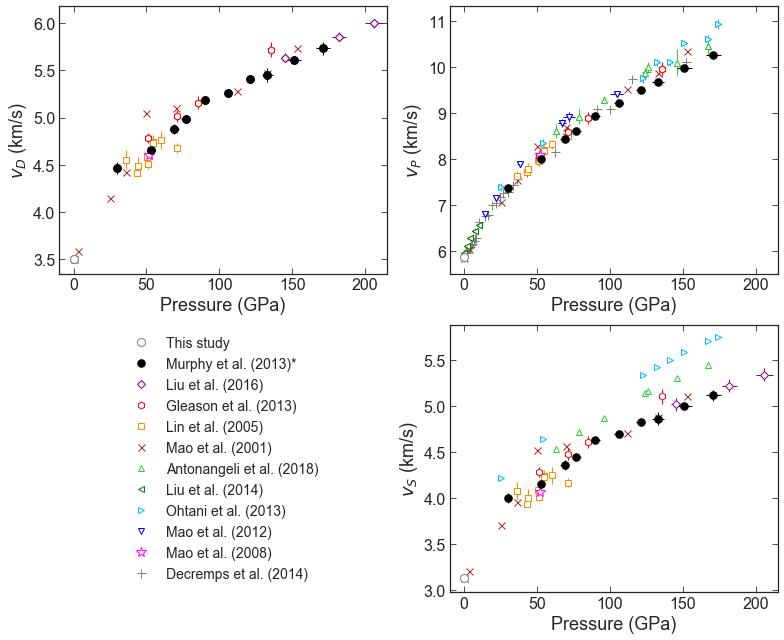

In [27]:
# Fe sound velocity plot: vD as reported; vP and vS corrected for natural enrichment

fig, ((ax0,ax2),(ax1,ax3)) = plt.subplots(nrows = 2, ncols=2, figsize=(11, 9))

# Fe comparison Debye velocity plot
alphaval = 1
x = 'P'
dx = 'dP'
y = 'vD_nat'
dy = 'dvD_nat'

study = 'Liu2016_hcpFe'
df = precious_dfdict[study]
color = 'green'
marker = '^'
markersize = 7
h3, = ax0.plot(df[x], df[y], marker=symbol[study], ms=symbolsize[study], color=colorchoice[study],
               mfc=mfcchoice[study],  alpha = alphaval,
               label=labelchoice[study],markeredgewidth=1,ls='none')
ax0.errorbar(df[x], df[y], xerr=df[dx], yerr=df[dy], alpha = alphaval,
                 marker=symbol[study], ms=symbolsize[study], color=colorchoice[study], 
                 mfc=mfcchoice[study],
                 label=labelchoice[study],markeredgewidth=1,ls='none',elinewidth=1)   

study = 'Lin2005_hcpFe'
df = precious_dfdict[study]
color = 'blue'
marker = 's'
markersize = 6
h5, = ax0.plot(df[x], df[y], marker=symbol[study], ms=symbolsize[study], color=colorchoice[study],
               mfc=mfcchoice[study],  alpha = alphaval,
               label=labelchoice[study],markeredgewidth=1,ls='none')
ax0.errorbar(df[x], df[y], yerr=df[dy], alpha = alphaval,
                 marker=symbol[study], ms=symbolsize[study], color=colorchoice[study], 
                 mfc=mfcchoice[study],
                 label=labelchoice[study],markeredgewidth=1,ls='none',elinewidth=1)   

study = 'Mao2001_bccFe'
df = precious_dfdict[study]
color = 'red'
marker = 'x'
markersize = 6
h6, = ax0.plot(df[x], df[y], marker=symbol[study], ms=symbolsize[study], color=colorchoice[study],
               mfc=mfcchoice[study],  alpha = alphaval,
               label=labelchoice[study],markeredgewidth=1,ls='none')

study = 'Mao2001_hcpFe'
df = precious_dfdict[study]
color = 'red'
marker = 'x'
markersize = 6
ax0.plot(df[x], df[y], marker=symbol[study], ms=symbolsize[study], color=colorchoice[study],
               mfc=mfcchoice[study],  alpha = alphaval,
               label='bcc and hcp Fe (Mao et al. 2001, NRIXS)',markeredgewidth=1,ls='none')

study = 'Gleason2013_hcpFe'
df = precious_dfdict[study]
color = 'magenta'
marker = 'h'
markersize = 6
h4, = ax0.plot(df[x], df[y], marker=symbol[study], ms=symbolsize[study], color=colorchoice[study],
               mfc=mfcchoice[study],  alpha = alphaval,
               label=labelchoice[study],markeredgewidth=1,ls='none')
ax0.errorbar(df[x], df[y], yerr=df[dy], alpha = alphaval,
                 marker=symbol[study], ms=symbolsize[study], color=colorchoice[study], 
                 mfc=mfcchoice[study],
                 label=labelchoice[study],markeredgewidth=1,ls='none',elinewidth=1)   

study = 'Mao2008_hcpFe'
df = precious_dfdict[study]
color = 'darkorange'
marker = 'd'
markersize = 6
h11, = ax0.plot(df[x], df[y], marker=symbol[study], ms=symbolsize[study], color=colorchoice[study],
               mfc=mfcchoice[study],  alpha = alphaval,
               label=labelchoice[study],markeredgewidth=1,ls='none')
ax0.errorbar(df[x], df[y], yerr=df[dy], alpha = alphaval,
                 marker=symbol[study], ms=symbolsize[study], color=colorchoice[study], 
                 mfc=mfcchoice[study],
                 label=labelchoice[study],markeredgewidth=1,ls='none',elinewidth=1)

study = 'bccFe'
df = precious_dfdict[study]
color = 'black'
markersize = 8
h1, = ax0.plot(df[x], df[y], marker=symbol[study], ms=symbolsize[study], color=colorchoice[study],
               mfc=mfcchoice[study],  alpha = alphaval,
               label='This study',markeredgewidth=1,ls='none')
ax0.errorbar(df[x], df[y], xerr=df[dx], yerr=df[dy], alpha = alphaval,
                 marker=symbol[study], ms=symbolsize[study], color=colorchoice[study], 
                 mfc=mfcchoice[study],
                 label=labelchoice[study],markeredgewidth=1,ls='none',elinewidth=1) 

study = 'hcpFe_Murphy'
df = precious_dfdict[study]
color = 'black'
ecolor = 'black'
markersize = 8
h2, = ax0.plot(df[x], df[y], marker=symbol[study], ms=symbolsize[study], color=ecolor,
               mfc=color,  alpha = alphaval,
               label='Murphy et al. (2013)*',markeredgewidth=0.5,ls='none')
ax0.errorbar(df[x], df[y], xerr=df[dx], yerr=df[dy], alpha = alphaval,
                 marker=symbol[study], ms=markersize, color=ecolor, 
                 mfc=color,markeredgewidth=0.5,ls='none',elinewidth=1) 

ax0.tick_params(direction='in',right='on',top='on')
ax0.set_xlabel(r'Pressure (GPa)', fontsize=18)
ax0.set_ylabel(r'$v_{D}$ (km/s)', fontsize=18)
ax0.set_xlim([-10,215])


# Fe comparison compressional velocity plot
alphaval = 1
x = 'P'
dx = 'dP'
y = 'vP_nat'
dy = 'dvP_nat'

study = 'Antonangeli2018_hcpFe'
df = precious_dfdict[study]
color = 'limegreen'
marker = '1'
markersize = 7
h7, = ax2.plot(df[x], df[y], marker=symbol[study], ms=symbolsize[study], color=colorchoice[study],
               mfc=mfcchoice[study],  alpha = alphaval,
               label=labelchoice[study],markeredgewidth=1,ls='none')
ax2.errorbar(df[x], df[y], yerr=df[dy], alpha = alphaval,
                 marker=symbol[study], ms=symbolsize[study], color=colorchoice[study], 
                 mfc=mfcchoice[study],
                 label=labelchoice[study],markeredgewidth=1,ls='none',elinewidth=1)

study = 'Decremps2014_bcchcpFe'
df = precious_dfdict[study]
color = 'purple'
marker = '+'
markersize = 6
h12, = ax2.plot(df[x], df[y], marker=symbol[study], ms=symbolsize[study], color=colorchoice[study],
               mfc=mfcchoice[study],  alpha = alphaval,
               label=labelchoice[study],markeredgewidth=1,ls='none')

study = 'Liu2014_bccFe'
df = precious_dfdict[study]
color = 'fuchsia'
marker = '^'
markersize = 6
h8, = ax2.plot(df[x], df[y], marker=symbol[study], ms=symbolsize[study], color=colorchoice[study],
               mfc=mfcchoice[study],  alpha = alphaval,
               label=labelchoice[study],markeredgewidth=1,ls='none')
ax2.errorbar(df[x], df[y], yerr=df[dy], alpha = alphaval,
                 marker=symbol[study], ms=symbolsize[study], color=colorchoice[study], 
                 mfc=mfcchoice[study],
                 label=labelchoice[study],markeredgewidth=1,ls='none',elinewidth=1)

study = 'Mao2012_hcpFe'
df = precious_dfdict[study]
color = 'deepskyblue'
marker = 'v'
markersize = 6
h10, = ax2.plot(df[x], df[y], marker=symbol[study], ms=symbolsize[study], color=colorchoice[study],
               mfc=mfcchoice[study],  alpha = alphaval,
               label=labelchoice[study],markeredgewidth=1,ls='none')
ax2.errorbar(df[x], df[y], xerr=df[dx], yerr=df[dy], alpha = alphaval,
                 marker=symbol[study], ms=symbolsize[study], color=colorchoice[study], 
                 mfc=mfcchoice[study],
                 label=labelchoice[study],markeredgewidth=1,ls='none',elinewidth=1)

study = 'Lin2005_hcpFe'
df = precious_dfdict[study]
color = 'blue'
marker = 's'
markersize = 6
ax2.plot(df[x], df[y], marker=symbol[study], ms=symbolsize[study], color=colorchoice[study],
               mfc=mfcchoice[study],  alpha = alphaval,
               label=labelchoice[study],markeredgewidth=1,ls='none')
ax2.errorbar(df[x], df[y], yerr=df[dy], alpha = alphaval,
                 marker=symbol[study], ms=symbolsize[study], color=colorchoice[study], 
                 mfc=mfcchoice[study],
                 label=labelchoice[study],markeredgewidth=1,ls='none',elinewidth=1)   

study = 'Mao2001_bccFe'
df = precious_dfdict[study]
color = 'red'
marker = 'x'
markersize = 6
ax2.plot(df[x], df[y], marker=symbol[study], ms=symbolsize[study], color=colorchoice[study],
               mfc=mfcchoice[study],  alpha = alphaval,
               label=labelchoice[study],markeredgewidth=1,ls='none')

study = 'Mao2001_hcpFe'
df = precious_dfdict[study]
color = 'red'
marker = 'x'
markersize = 6
ax2.plot(df[x], df[y], marker=symbol[study], ms=symbolsize[study], color=colorchoice[study],
               mfc=mfcchoice[study],  alpha = alphaval,
               label='bcc and hcp Fe (Mao et al. 2001, NRIXS)',markeredgewidth=1,ls='none')

study = 'Gleason2013_hcpFe'
df = precious_dfdict[study]
color = 'magenta'
marker = 'h'
markersize = 6
ax2.plot(df[x], df[y], marker=symbol[study], ms=symbolsize[study], color=colorchoice[study],
               mfc=mfcchoice[study],  alpha = alphaval,
               label=labelchoice[study],markeredgewidth=1,ls='none')
ax2.errorbar(df[x], df[y], yerr=df[dy], alpha = alphaval,
                 marker=symbol[study], ms=symbolsize[study], color=colorchoice[study], 
                 mfc=mfcchoice[study],
                 label=labelchoice[study],markeredgewidth=1,ls='none',elinewidth=1)   

study = 'Ohtani2013_hcpFe'
df = precious_dfdict[study]
color = 'brown'
marker = '>'
markersize = 6
h9, = ax2.plot(df[x], df[y], marker=symbol[study], ms=symbolsize[study], color=colorchoice[study],
               mfc=mfcchoice[study],  alpha = alphaval,
               label=labelchoice[study],markeredgewidth=1,ls='none')
ax2.errorbar(df[x], df[y], yerr=df[dy], alpha = alphaval,
                 marker=symbol[study], ms=symbolsize[study], color=colorchoice[study], 
                 mfc=mfcchoice[study],
                 label=labelchoice[study],markeredgewidth=1,ls='none',elinewidth=1)   

study = 'Mao2008_hcpFe'
df = precious_dfdict[study]
color = 'orange'
marker = 'd'
markersize = 6
ax2.plot(df[x], df[y], marker=symbol[study], ms=symbolsize[study], color=colorchoice[study],
               mfc=mfcchoice[study],  alpha = alphaval,
               label=labelchoice[study],markeredgewidth=1,ls='none')
ax2.errorbar(df[x], df[y], yerr=df[dy], alpha = alphaval,
                 marker=symbol[study], ms=symbolsize[study], color=colorchoice[study], 
                 mfc=mfcchoice[study],
                 label=labelchoice[study],markeredgewidth=1,ls='none',elinewidth=1)

study = 'bccFe'
df = precious_dfdict[study]
color = 'black'
markersize = 8
ax2.errorbar(df[x], df[y], xerr=df[dx], yerr=df[dy], alpha = alphaval,
                 marker=symbol[study], ms=symbolsize[study], color=colorchoice[study], 
                 mfc=mfcchoice[study],
                 label=labelchoice[study],markeredgewidth=1,ls='none',elinewidth=1) 

study = 'hcpFe_Murphy'
df = precious_dfdict[study]
color = 'black'
ecolor = 'black'
markersize = 8
ax2.errorbar(df[x], df[y], xerr=df[dx], yerr=df[dy], alpha = alphaval,
                 marker=symbol[study], ms=markersize, color=ecolor, 
                 mfc=color,markeredgewidth=0.5,ls='none',elinewidth=1) 

ax2.tick_params(direction='in',right='on',top='on')
ax2.set_xlabel(r'Pressure (GPa)', fontsize=18)
ax2.set_ylabel(r'$v_{P}$ (km/s)', fontsize=18)
ax2.set_xlim([-10,215])


# Fe comparison of shear velocity plot
alphaval = 1
x = 'P'
dx = 'dP'
y = 'vS_nat'
dy = 'dvS_nat'

study = 'Liu2016_hcpFe'
df = precious_dfdict[study]
ax3.errorbar(df[x], df[y], xerr=df[dx], yerr=df[dy], alpha = alphaval,
                 marker=symbol[study], ms=symbolsize[study], color=colorchoice[study], 
                 mfc=mfcchoice[study],
                 label=labelchoice[study],markeredgewidth=1,ls='none',elinewidth=1)   

study = 'Lin2005_hcpFe'
df = precious_dfdict[study]
ax3.errorbar(df[x], df[y], yerr=df[dy], alpha = alphaval,
                 marker=symbol[study], ms=symbolsize[study], color=colorchoice[study], 
                 mfc=mfcchoice[study],
                 label=labelchoice[study],markeredgewidth=1,ls='none',elinewidth=1)   

study = 'Mao2001_bccFe'
df = precious_dfdict[study]
ax3.plot(df[x], df[y], marker=symbol[study], ms=symbolsize[study], color=colorchoice[study],
               mfc=mfcchoice[study],  alpha = alphaval,
               label=labelchoice[study],markeredgewidth=1,ls='none')

study = 'Mao2001_hcpFe'
df = precious_dfdict[study]
ax3.plot(df[x], df[y], marker=symbol[study], ms=symbolsize[study], color=colorchoice[study],
               mfc=mfcchoice[study],  alpha = alphaval,
               label='bcc and hcp Fe (Mao et al. 2001, NRIXS)',markeredgewidth=1,ls='none')

study = 'Gleason2013_hcpFe'
df = precious_dfdict[study]
ax3.errorbar(df[x], df[y], yerr=df[dy], alpha = alphaval,
                 marker=symbol[study], ms=symbolsize[study], color=colorchoice[study], 
                 mfc=mfcchoice[study],
                 label=labelchoice[study],markeredgewidth=1,ls='none',elinewidth=1)   

study = 'Mao2008_hcpFe'
df = precious_dfdict[study]
ax3.errorbar(df[x], df[y], yerr=df[dy], alpha = alphaval,
                 marker=symbol[study], ms=symbolsize[study], color=colorchoice[study], 
                 mfc=mfcchoice[study],
                 label=labelchoice[study],markeredgewidth=1,ls='none',elinewidth=1)

study = 'bccFe'
df = precious_dfdict[study]
color = 'black'
ax3.errorbar(df[x], df[y], xerr=df[dx], yerr=df[dy], alpha = alphaval,
                 marker=symbol[study], ms=symbolsize[study], color=colorchoice[study], 
                 mfc=mfcchoice[study],
                 label=labelchoice[study],markeredgewidth=1,ls='none',elinewidth=1) 

study = 'Antonangeli2018_hcpFe'
df = precious_dfdict[study]
ax3.plot(df[x], df[y], marker=symbol[study], ms=symbolsize[study], color=colorchoice[study],
               mfc=mfcchoice[study],  alpha = alphaval,
               label=labelchoice[study],markeredgewidth=1,ls='none')

study = 'Ohtani2013_hcpFe'
df = precious_dfdict[study]
ax3.plot(df[x], df[y], marker=symbol[study], ms=symbolsize[study], color=colorchoice[study],
               mfc=mfcchoice[study],  alpha = alphaval,
               label=labelchoice[study],markeredgewidth=1,ls='none')

# study = 'Ohtani2013_hcpFe_vS'
# df = precious_dfdict[study]
# ax3.plot(df[x], df[y], color=colorchoice[study],
#          label=labelchoice[study],ls='--',linewidth=1)

study = 'hcpFe_Murphy'
df = precious_dfdict[study]
color = 'black'
ecolor = 'black'
markersize = 8
ax3.errorbar(df[x], df[y], xerr=df[dx], yerr=df[dy], alpha = alphaval,
                 marker=symbol[study], ms=markersize, color=ecolor, 
                 mfc=color,markeredgewidth=0.5,ls='none',elinewidth=1)



ax3.tick_params(direction='in',right='on',top='on')
ax3.set_xlabel(r'Pressure (GPa)', fontsize=18)
ax3.set_ylabel(r'$v_{S}$ (km/s)', fontsize=18)
ax3.set_xlim([-10,215])
# ax3.set_ylim([3,6.3])


# Plot details
ax1.tick_params(direction='in',left='off',bottom='off')
ax1.set_xticklabels([])
ax1.set_yticklabels([])
# ax1.spines['top'].set_visible(False)
ax1.set_frame_on(False)

# Legend
hlabels = [h1,h2,h3,h4,h5,h6,h7,h8,h9,h10,h11,h12]
# ax2.legend(fontsize=14,bbox_to_anchor=(1.0, 1),handles = hlabels)
ax1.legend(fontsize=14,loc=10,handles = hlabels)

# fig.subplots_adjust(hspace=0.3,wspace=0.3)

plt.tight_layout()

fig = plt.gcf()
fig.savefig('Fe_velocities_nat.pdf', format='pdf', bbox_inches='tight', transparent=True)

## Plots comparing Fe-Ni studies

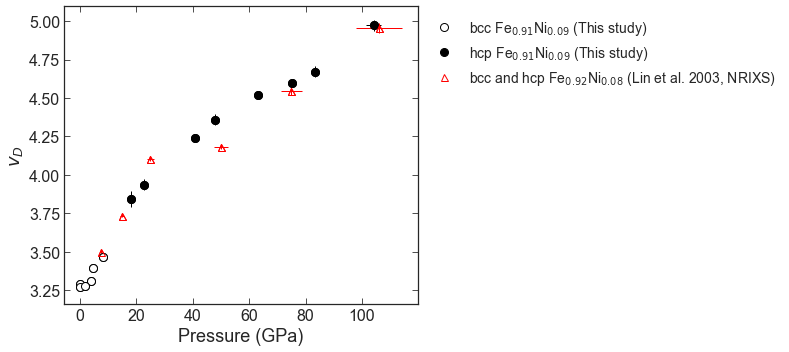

In [285]:
# Fe-Ni comparison Debye velocity plot as reported
alphaval = 1
x = 'P'
dx = 'dP'
y = 'vD'
dy = 'dvD'

fig, (ax0) = plt.subplots(nrows = 1, ncols=1, sharex=True, figsize=(6, 5))

hlabels = []

study = 'bccFeNi'
df = precious_dfdict[study]
color = 'black'
markersize = 8
h, = ax0.plot(df[x], df[y], marker=symbol[study], ms=markersize, color=color,
               mfc=mfcchoice[study],  alpha = alphaval,
               label=labelchoice[study],markeredgewidth=1,ls='none')
ax0.errorbar(df[x], df[y], xerr=df[dx], yerr=df[dy], alpha = alphaval,
                 marker=symbol[study], ms=markersize, color=color, 
                 mfc=mfcchoice[study],
                 label='bcc and hcp Fe (This study)',markeredgewidth=1,ls='none',elinewidth=1) 
hlabels.append(h)

study = 'hcpFeNi'
df = precious_dfdict[study]
color = 'black'
markersize = 8
h, = ax0.plot(df[x], df[y], marker=symbol[study], ms=markersize, color=color,
               mfc=color,  alpha = alphaval,
               label=labelchoice[study],markeredgewidth=1,ls='none')
ax0.errorbar(df[x], df[y], xerr=df[dx], yerr=df[dy], alpha = alphaval,
                 marker=symbol[study], ms=markersize, color=color, 
                 mfc=color,
                 label=labelchoice[study],markeredgewidth=1,ls='none',elinewidth=1) 
hlabels.append(h)

study = 'Lin2003_hcpFeNi'
df = precious_dfdict[study]
color = 'red'
marker = '^'
markersize = 7
h, = ax0.plot(df[x], df[y], marker=marker, ms=markersize, color=color,
               mfc=mfcchoice[study],  alpha = alphaval,
               label=labelchoice[study],markeredgewidth=1,ls='none')
ax0.errorbar(df[x], df[y], xerr=df[dx], yerr=df[dy], alpha = alphaval,
                 marker=marker, ms=markersize, color=color, 
                 mfc=mfcchoice[study],
                 label=labelchoice[study],markeredgewidth=1,ls='none',elinewidth=1)   
hlabels.append(h)

ax0.legend(fontsize=14,bbox_to_anchor=(1.0, 1),handles = hlabels)

ax0.tick_params(direction='in',right='on',top='on')
ax0.set_xlabel(r'Pressure (GPa)', fontsize=18)
ax0.set_ylabel(r'$v_{D}$', fontsize=18)

plt.tight_layout()

fig = plt.gcf()
fig.savefig('hcpFeAlloys_vD_FeNi.pdf', format='pdf', bbox_inches='tight')

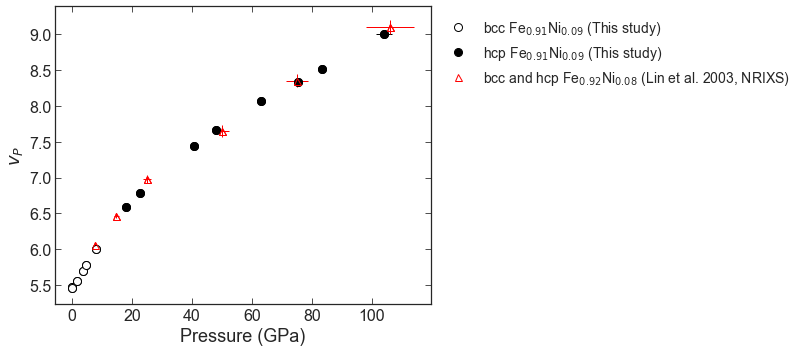

In [284]:
# Fe-Ni comparison compression velocity plot as reported
alphaval = 1
x = 'P'
dx = 'dP'
y = 'vP'
dy = 'dvP'

fig, (ax0) = plt.subplots(nrows = 1, ncols=1, sharex=True, figsize=(6, 5))

hlabels = []

study = 'bccFeNi'
df = precious_dfdict[study]
color = 'black'
markersize = 8
h, = ax0.plot(df[x], df[y], marker=symbol[study], ms=markersize, color=color,
               mfc=mfcchoice[study],  alpha = alphaval,
               label=labelchoice[study],markeredgewidth=1,ls='none')
ax0.errorbar(df[x], df[y], xerr=df[dx], yerr=df[dy], alpha = alphaval,
                 marker=symbol[study], ms=markersize, color=color, 
                 mfc=mfcchoice[study],
                 label='bcc and hcp Fe (This study)',markeredgewidth=1,ls='none',elinewidth=1) 
hlabels.append(h)

study = 'hcpFeNi'
df = precious_dfdict[study]
color = 'black'
markersize = 8
h, = ax0.plot(df[x], df[y], marker=symbol[study], ms=markersize, color=color,
               mfc=color,  alpha = alphaval,
               label=labelchoice[study],markeredgewidth=1,ls='none')
ax0.errorbar(df[x], df[y], xerr=df[dx], yerr=df[dy], alpha = alphaval,
                 marker=symbol[study], ms=markersize, color=color, 
                 mfc=color,
                 label=labelchoice[study],markeredgewidth=1,ls='none',elinewidth=1) 
hlabels.append(h)

study = 'Lin2003_hcpFeNi'
df = precious_dfdict[study]
color = 'red'
marker = '^'
markersize = 7
h, = ax0.plot(df[x], df[y], marker=marker, ms=markersize, color=color,
               mfc=mfcchoice[study],  alpha = alphaval,
               label=labelchoice[study],markeredgewidth=1,ls='none')
ax0.errorbar(df[x], df[y], xerr=df[dx], yerr=df[dy], alpha = alphaval,
                 marker=marker, ms=markersize, color=color, 
                 mfc=mfcchoice[study],
                 label=labelchoice[study],markeredgewidth=1,ls='none',elinewidth=1)   
hlabels.append(h)

ax0.legend(fontsize=14,bbox_to_anchor=(1.0, 1),handles = hlabels)

ax0.tick_params(direction='in',right='on',top='on')
ax0.set_xlabel(r'Pressure (GPa)', fontsize=18)
ax0.set_ylabel(r'$v_{P}$', fontsize=18)

plt.tight_layout()

fig = plt.gcf()
fig.savefig('hcpFeAlloys_vP_FeNi_uncorrected.pdf', format='pdf', bbox_inches='tight')

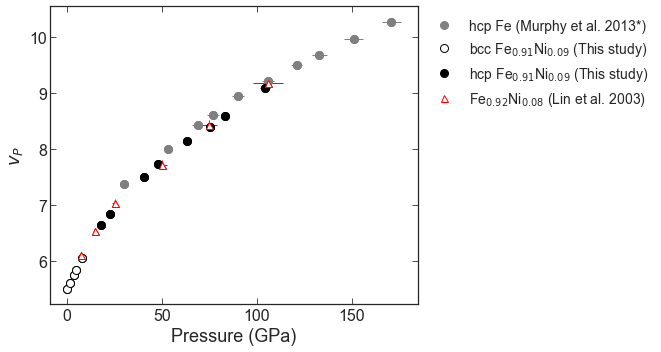

In [14]:
# Fe-Ni comparison compression velocity plot corrected for natural enrichment
alphaval = 1
x = 'P'
dx = 'dP'
y = 'vP_nat'
dy = 'dvP_nat'

fig, (ax0) = plt.subplots(nrows = 1, ncols=1, sharex=True, figsize=(6, 5))

hlabels = []

study = 'hcpFe_Murphy'
df = precious_dfdict[study]
color = 'gray'
markersize = 8
h, = ax0.plot(df[x], df[y], marker=symbol[study], ms=markersize, color=color,
               mfc=color,  alpha = alphaval,
               label=labelchoice[study],markeredgewidth=1,ls='none')
ax0.errorbar(df[x], df[y], xerr=df[dx], yerr=df[dy], alpha = alphaval,
                 marker=symbol[study], ms=markersize, color=color, 
                 mfc=color,
                 label=labelchoice[study],markeredgewidth=1,ls='none',elinewidth=1) 
hlabels.append(h)

study = 'bccFeNi'
df = precious_dfdict[study]
color = 'black'
markersize = 8
h, = ax0.plot(df[x], df[y], marker=symbol[study], ms=markersize, color=color,
               mfc=mfcchoice[study],  alpha = alphaval,
               label=labelchoice[study],markeredgewidth=1,ls='none')
ax0.errorbar(df[x], df[y], xerr=df[dx], yerr=df[dy], alpha = alphaval,
                 marker=symbol[study], ms=markersize, color=color, 
                 mfc=mfcchoice[study],
                 label='bcc and hcp Fe (This study)',markeredgewidth=1,ls='none',elinewidth=1) 
hlabels.append(h)

study = 'hcpFeNi'
df = precious_dfdict[study]
color = 'black'
markersize = 8
h, = ax0.plot(df[x], df[y], marker=symbol[study], ms=markersize, color=color,
               mfc=color,  alpha = alphaval,
               label=labelchoice[study],markeredgewidth=1,ls='none')
ax0.errorbar(df[x], df[y], xerr=df[dx], yerr=df[dy], alpha = alphaval,
                 marker=symbol[study], ms=markersize, color=color, 
                 mfc=color,
                 label=labelchoice[study],markeredgewidth=1,ls='none',elinewidth=1) 
hlabels.append(h)

study = 'Lin2003_hcpFeNi'
df = precious_dfdict[study]
color = 'red'
marker = '^'
markersize = 7
h, = ax0.plot(df[x], df[y], marker=marker, ms=markersize, color=color,
               mfc=mfcchoice[study],  alpha = alphaval,
               label=labelchoice[study],markeredgewidth=1,ls='none')
ax0.errorbar(df[x], df[y], xerr=df[dx], yerr=df[dy], alpha = alphaval,
                 marker=marker, ms=markersize, color=color, 
                 mfc=mfcchoice[study],
                 label=labelchoice[study],markeredgewidth=1,ls='none',elinewidth=1)   
hlabels.append(h)

ax0.legend(fontsize=14,bbox_to_anchor=(1.0, 1),handles = hlabels)

ax0.tick_params(direction='in',right='on',top='on')
ax0.set_xlabel(r'Pressure (GPa)', fontsize=18)
ax0.set_ylabel(r'$v_{P}$', fontsize=18)

plt.tight_layout()

fig = plt.gcf()
fig.savefig('hcpFeAlloys_vP_FeNi_nat.pdf', format='pdf', bbox_inches='tight')

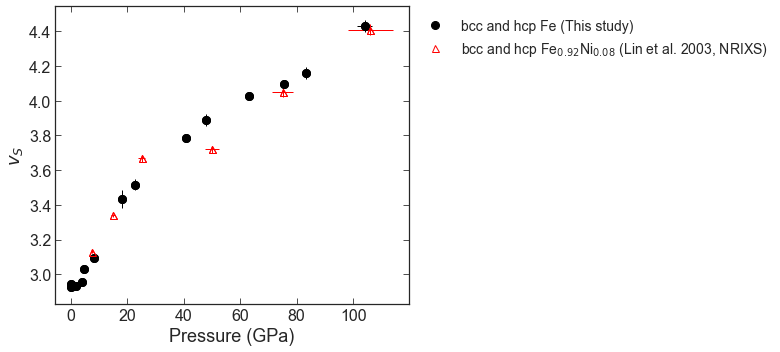

In [283]:
# Fe-Ni comparison shear velocity plot as reported
alphaval = 1
x = 'P'
dx = 'dP'
y = 'vS'
dy = 'dvS'

fig, (ax0) = plt.subplots(nrows = 1, ncols=1, sharex=True, figsize=(6, 5))

hlabels = []

study = 'bccFeNi'
df = precious_dfdict[study]
color = 'black'
markersize = 8
h, = ax0.plot(df[x], df[y], marker=symbol[study], ms=markersize, color=color,
               mfc=color,  alpha = alphaval,
               label='bcc and hcp Fe (This study)',markeredgewidth=1,ls='none')
ax0.errorbar(df[x], df[y], xerr=df[dx], yerr=df[dy], alpha = alphaval,
                 marker=symbol[study], ms=markersize, color=color, 
                 mfc=color,
                 label='bcc and hcp Fe (This study)',markeredgewidth=1,ls='none',elinewidth=1) 
hlabels.append(h)

study = 'hcpFeNi'
df = precious_dfdict[study]
color = 'black'
markersize = 8
ax0.plot(df[x], df[y], marker=symbol[study], ms=markersize, color=color,
               mfc=color,  alpha = alphaval,
               label=labelchoice[study],markeredgewidth=1,ls='none')
ax0.errorbar(df[x], df[y], xerr=df[dx], yerr=df[dy], alpha = alphaval,
                 marker=symbol[study], ms=markersize, color=color, 
                 mfc=color,
                 label=labelchoice[study],markeredgewidth=1,ls='none',elinewidth=1) 

study = 'Lin2003_hcpFeNi'
df = precious_dfdict[study]
color = 'red'
marker = '^'
markersize = 7
h, = ax0.plot(df[x], df[y], marker=marker, ms=markersize, color=color,
               mfc=mfcchoice[study],  alpha = alphaval,
               label=labelchoice[study],markeredgewidth=1,ls='none')
ax0.errorbar(df[x], df[y], xerr=df[dx], yerr=df[dy], alpha = alphaval,
                 marker=marker, ms=markersize, color=color, 
                 mfc=mfcchoice[study],
                 label=labelchoice[study],markeredgewidth=1,ls='none',elinewidth=1)   
hlabels.append(h)

ax0.legend(fontsize=14,bbox_to_anchor=(1.0, 1),handles = hlabels)

ax0.tick_params(direction='in',right='on',top='on')
ax0.set_xlabel(r'Pressure (GPa)', fontsize=18)
ax0.set_ylabel(r'$v_{S}$', fontsize=18)

plt.tight_layout()

fig = plt.gcf()
fig.savefig('hcpFeAlloys_vS_FeNi_uncorrected.pdf', format='pdf', bbox_inches='tight')

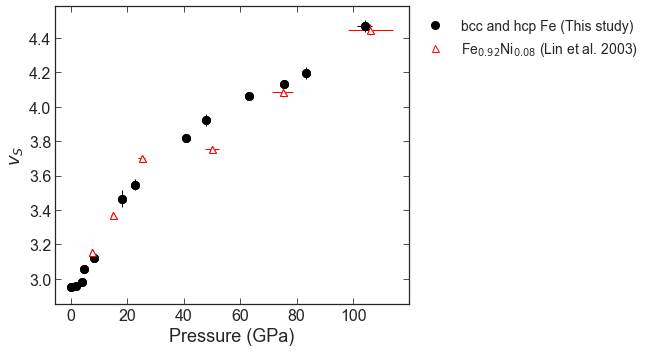

In [18]:
# Fe-Ni comparison shear velocity plot corrected for natural enrichment
alphaval = 1
x = 'P'
dx = 'dP'
y = 'vS_nat'
dy = 'dvS_nat'

fig, (ax0) = plt.subplots(nrows = 1, ncols=1, sharex=True, figsize=(6, 5))

hlabels = []

study = 'bccFeNi'
df = precious_dfdict[study]
color = 'black'
markersize = 8
h, = ax0.plot(df[x], df[y], marker=symbol[study], ms=markersize, color=color,
               mfc=color,  alpha = alphaval,
               label='bcc and hcp Fe (This study)',markeredgewidth=1,ls='none')
ax0.errorbar(df[x], df[y], xerr=df[dx], yerr=df[dy], alpha = alphaval,
                 marker=symbol[study], ms=markersize, color=color, 
                 mfc=color,
                 label='bcc and hcp Fe (This study)',markeredgewidth=1,ls='none',elinewidth=1) 
hlabels.append(h)

study = 'hcpFeNi'
df = precious_dfdict[study]
color = 'black'
markersize = 8
ax0.plot(df[x], df[y], marker=symbol[study], ms=markersize, color=color,
               mfc=color,  alpha = alphaval,
               label=labelchoice[study],markeredgewidth=1,ls='none')
ax0.errorbar(df[x], df[y], xerr=df[dx], yerr=df[dy], alpha = alphaval,
                 marker=symbol[study], ms=markersize, color=color, 
                 mfc=color,
                 label=labelchoice[study],markeredgewidth=1,ls='none',elinewidth=1) 

study = 'Lin2003_hcpFeNi'
df = precious_dfdict[study]
color = 'red'
marker = '^'
markersize = 7
h, = ax0.plot(df[x], df[y], marker=marker, ms=markersize, color=color,
               mfc=mfcchoice[study],  alpha = alphaval,
               label=labelchoice[study],markeredgewidth=1,ls='none')
ax0.errorbar(df[x], df[y], xerr=df[dx], yerr=df[dy], alpha = alphaval,
                 marker=marker, ms=markersize, color=color, 
                 mfc=mfcchoice[study],
                 label=labelchoice[study],markeredgewidth=1,ls='none',elinewidth=1)   
hlabels.append(h)

ax0.legend(fontsize=14,bbox_to_anchor=(1.0, 1),handles = hlabels)

ax0.tick_params(direction='in',right='on',top='on')
ax0.set_xlabel(r'Pressure (GPa)', fontsize=18)
ax0.set_ylabel(r'$v_{S}$', fontsize=18)

plt.tight_layout()

fig = plt.gcf()
fig.savefig('hcpFeAlloys_vS_FeNi_nat.pdf', format='pdf', bbox_inches='tight')

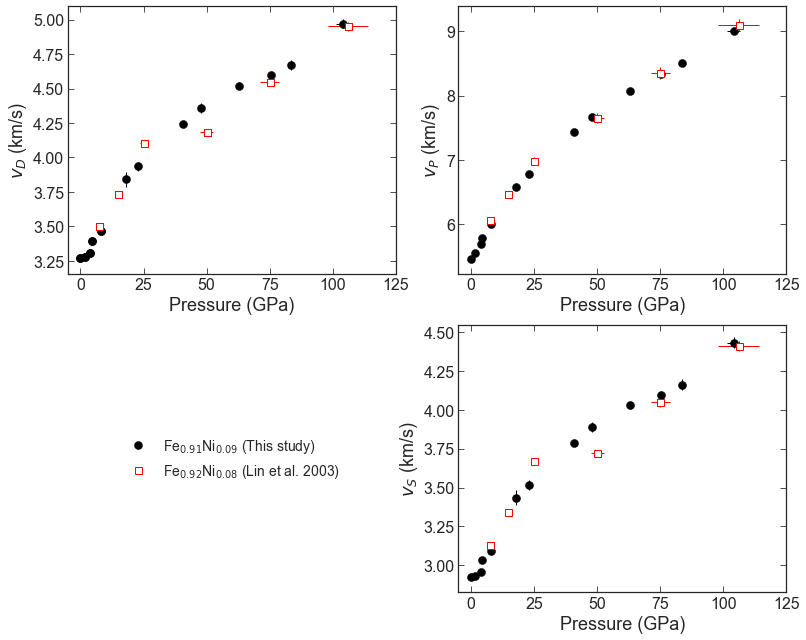

In [34]:
# Fe-Ni sound velocity plots as reported
fig, ((ax0,ax2),(ax1,ax3)) = plt.subplots(nrows = 2, ncols=2, figsize=(11, 9))


# Fe-Ni comparison Debye velocity plot
alphaval = 1
x = 'P'
dx = 'dP'
y = 'vD'
dy = 'dvD'

study = 'bccFeNi'
df = precious_dfdict[study]
color = 'black'
ecolor = 'black'
markersize = 8
h1, = ax0.plot(df[x], df[y], marker=symbol[study], ms=markersize, color=ecolor,
               mfc=color,  alpha = alphaval,
               label=r'Fe$_{0.91}$Ni$_{0.09}$ (This study)',markeredgewidth=0.5,ls='none')
ax0.errorbar(df[x], df[y], xerr=df[dx], yerr=df[dy], alpha = alphaval,
                 marker=symbol[study], ms=markersize, color=ecolor, 
                 mfc=color,
                 label=r'Fe$_{0.91}$Ni$_{0.09}$ (This study)',markeredgewidth=0.5,ls='none',elinewidth=1) 

study = 'hcpFeNi'
df = precious_dfdict[study]
color = 'black'
ecolor = 'black'
markersize = 8
ax0.errorbar(df[x], df[y], xerr=df[dx], yerr=df[dy], alpha = alphaval,
                 marker=symbol[study], ms=markersize, color=ecolor, 
                 mfc=color,markeredgewidth=0.5,ls='none',elinewidth=1) 

study = 'Lin2003_hcpFeNi'
df = precious_dfdict[study]
color = 'red'
marker = '^'
markersize = 7
h2, = ax0.plot(df[x], df[y], marker=symbol[study], ms=markersize, color=colorchoice[study],
               mfc=mfcchoice[study],  alpha = alphaval,
               label=labelchoice[study],markeredgewidth=1,ls='none')
ax0.errorbar(df[x], df[y], xerr=df[dx], yerr=df[dy], alpha = alphaval,
                 marker=symbol[study], ms=markersize, color=colorchoice[study], 
                 mfc=mfcchoice[study],
                 label=labelchoice[study],markeredgewidth=1,ls='none',elinewidth=1)   

ax0.tick_params(direction='in',right='on',top='on')
ax0.set_xlabel(r'Pressure (GPa)', fontsize=18)
ax0.set_ylabel(r'$v_{D}$ (km/s)', fontsize=18)
ax0.set_xlim([-5,125])



# Fe-Ni comparison compression velocity plot
alphaval = 1
x = 'P'
dx = 'dP'
y = 'vP'
dy = 'dvP'

study = 'bccFeNi'
df = precious_dfdict[study]
color = 'black'
ecolor = 'black'
markersize = 8
ax2.errorbar(df[x], df[y], xerr=df[dx], yerr=df[dy], alpha = alphaval,
                 marker=symbol[study], ms=markersize, color=ecolor, 
                 mfc=color,markeredgewidth=0.5,ls='none',elinewidth=1) 

study = 'hcpFeNi'
df = precious_dfdict[study]
color = 'black'
ecolor = 'black'
markersize = 8
ax2.errorbar(df[x], df[y], xerr=df[dx], yerr=df[dy], alpha = alphaval,
                 marker=symbol[study], ms=markersize, color=ecolor, 
                 mfc=color,markeredgewidth=0.5,ls='none',elinewidth=1) 

study = 'Lin2003_hcpFeNi'
df = precious_dfdict[study]
color = 'red'
marker = '^'
markersize = 7
ax2.errorbar(df[x], df[y], xerr=df[dx], yerr=df[dy], alpha = alphaval,
                 marker=symbol[study], ms=markersize, color=colorchoice[study], 
                 mfc=mfcchoice[study],
                 label=labelchoice[study],markeredgewidth=1,ls='none',elinewidth=1)   

ax2.tick_params(direction='in',right='on',top='on')
ax2.set_xlabel(r'Pressure (GPa)', fontsize=18)
ax2.set_ylabel(r'$v_{P}$ (km/s)', fontsize=18)
ax2.set_xlim([-5,125])



# Fe-Ni comparison shear velocity plot
alphaval = 1
x = 'P'
dx = 'dP'
y = 'vS'
dy = 'dvS'

study = 'bccFeNi'
df = precious_dfdict[study]
color = 'black'
ecolor = 'black'
markersize = 8
ax3.errorbar(df[x], df[y], xerr=df[dx], yerr=df[dy], alpha = alphaval,
                 marker=symbol[study], ms=markersize, color=ecolor, 
                 mfc=color,markeredgewidth=0.5,ls='none',elinewidth=1) 

study = 'hcpFeNi'
df = precious_dfdict[study]
color = 'black'
ecolor = 'black'
markersize = 8
ax3.errorbar(df[x], df[y], xerr=df[dx], yerr=df[dy], alpha = alphaval,
                 marker=symbol[study], ms=markersize, color=ecolor, 
                 mfc=color,markeredgewidth=0.5,ls='none',elinewidth=1) 

study = 'Lin2003_hcpFeNi'
df = precious_dfdict[study]
color = 'red'
marker = '^'
markersize = 7
ax3.errorbar(df[x], df[y], xerr=df[dx], yerr=df[dy], alpha = alphaval,
                 marker=symbol[study], ms=markersize, color=colorchoice[study], 
                 mfc=mfcchoice[study],
                 label=labelchoice[study],markeredgewidth=1,ls='none',elinewidth=1)   

ax3.tick_params(direction='in',right='on',top='on')
ax3.set_xlabel(r'Pressure (GPa)', fontsize=18)
ax3.set_ylabel(r'$v_{S}$ (km/s)', fontsize=18)
ax3.set_xlim([-5,125])


# Plot details
ax1.tick_params(direction='in',left='off',bottom='off')
ax1.set_xticklabels([])
ax1.set_yticklabels([])
ax1.set_frame_on(False)

# Legend
hlabels = [h1,h2]
ax1.legend(fontsize=14,loc=10,handles = hlabels)

plt.tight_layout()

fig = plt.gcf()
fig.savefig('FeNi_velocities_uncorrected.pdf', format='pdf', bbox_inches='tight', transparent=True)

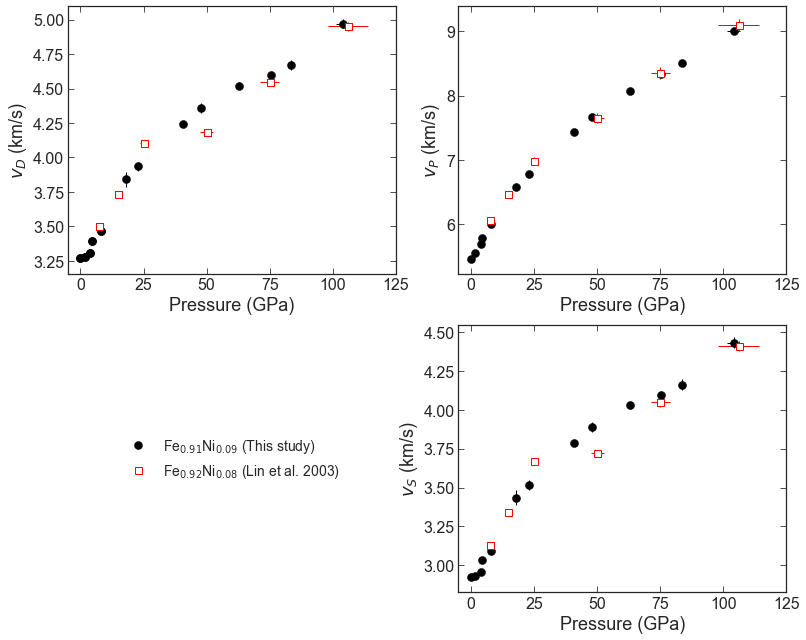

In [34]:
# Fe-Ni sound velocity plots as reported
fig, ((ax0,ax2),(ax1,ax3)) = plt.subplots(nrows = 2, ncols=2, figsize=(11, 9))


# Fe-Ni comparison Debye velocity plot
alphaval = 1
x = 'P'
dx = 'dP'
y = 'vD'
dy = 'dvD'

study = 'bccFeNi'
df = precious_dfdict[study]
color = 'black'
ecolor = 'black'
markersize = 8
h1, = ax0.plot(df[x], df[y], marker=symbol[study], ms=markersize, color=ecolor,
               mfc=color,  alpha = alphaval,
               label=r'Fe$_{0.91}$Ni$_{0.09}$ (This study)',markeredgewidth=0.5,ls='none')
ax0.errorbar(df[x], df[y], xerr=df[dx], yerr=df[dy], alpha = alphaval,
                 marker=symbol[study], ms=markersize, color=ecolor, 
                 mfc=color,
                 label=r'Fe$_{0.91}$Ni$_{0.09}$ (This study)',markeredgewidth=0.5,ls='none',elinewidth=1) 

study = 'hcpFeNi'
df = precious_dfdict[study]
color = 'black'
ecolor = 'black'
markersize = 8
ax0.errorbar(df[x], df[y], xerr=df[dx], yerr=df[dy], alpha = alphaval,
                 marker=symbol[study], ms=markersize, color=ecolor, 
                 mfc=color,markeredgewidth=0.5,ls='none',elinewidth=1) 

study = 'Lin2003_hcpFeNi'
df = precious_dfdict[study]
color = 'red'
marker = '^'
markersize = 7
h2, = ax0.plot(df[x], df[y], marker=symbol[study], ms=markersize, color=colorchoice[study],
               mfc=mfcchoice[study],  alpha = alphaval,
               label=labelchoice[study],markeredgewidth=1,ls='none')
ax0.errorbar(df[x], df[y], xerr=df[dx], yerr=df[dy], alpha = alphaval,
                 marker=symbol[study], ms=markersize, color=colorchoice[study], 
                 mfc=mfcchoice[study],
                 label=labelchoice[study],markeredgewidth=1,ls='none',elinewidth=1)   

ax0.tick_params(direction='in',right='on',top='on')
ax0.set_xlabel(r'Pressure (GPa)', fontsize=18)
ax0.set_ylabel(r'$v_{D}$ (km/s)', fontsize=18)
ax0.set_xlim([-5,125])



# Fe-Ni comparison compression velocity plot
alphaval = 1
x = 'P'
dx = 'dP'
y = 'vP'
dy = 'dvP'

study = 'bccFeNi'
df = precious_dfdict[study]
color = 'black'
ecolor = 'black'
markersize = 8
ax2.errorbar(df[x], df[y], xerr=df[dx], yerr=df[dy], alpha = alphaval,
                 marker=symbol[study], ms=markersize, color=ecolor, 
                 mfc=color,markeredgewidth=0.5,ls='none',elinewidth=1) 

study = 'hcpFeNi'
df = precious_dfdict[study]
color = 'black'
ecolor = 'black'
markersize = 8
ax2.errorbar(df[x], df[y], xerr=df[dx], yerr=df[dy], alpha = alphaval,
                 marker=symbol[study], ms=markersize, color=ecolor, 
                 mfc=color,markeredgewidth=0.5,ls='none',elinewidth=1) 

study = 'Lin2003_hcpFeNi'
df = precious_dfdict[study]
color = 'red'
marker = '^'
markersize = 7
ax2.errorbar(df[x], df[y], xerr=df[dx], yerr=df[dy], alpha = alphaval,
                 marker=symbol[study], ms=markersize, color=colorchoice[study], 
                 mfc=mfcchoice[study],
                 label=labelchoice[study],markeredgewidth=1,ls='none',elinewidth=1)   

ax2.tick_params(direction='in',right='on',top='on')
ax2.set_xlabel(r'Pressure (GPa)', fontsize=18)
ax2.set_ylabel(r'$v_{P}$ (km/s)', fontsize=18)
ax2.set_xlim([-5,125])



# Fe-Ni comparison shear velocity plot
alphaval = 1
x = 'P'
dx = 'dP'
y = 'vS'
dy = 'dvS'

study = 'bccFeNi'
df = precious_dfdict[study]
color = 'black'
ecolor = 'black'
markersize = 8
ax3.errorbar(df[x], df[y], xerr=df[dx], yerr=df[dy], alpha = alphaval,
                 marker=symbol[study], ms=markersize, color=ecolor, 
                 mfc=color,markeredgewidth=0.5,ls='none',elinewidth=1) 

study = 'hcpFeNi'
df = precious_dfdict[study]
color = 'black'
ecolor = 'black'
markersize = 8
ax3.errorbar(df[x], df[y], xerr=df[dx], yerr=df[dy], alpha = alphaval,
                 marker=symbol[study], ms=markersize, color=ecolor, 
                 mfc=color,markeredgewidth=0.5,ls='none',elinewidth=1) 

study = 'Lin2003_hcpFeNi'
df = precious_dfdict[study]
color = 'red'
marker = '^'
markersize = 7
ax3.errorbar(df[x], df[y], xerr=df[dx], yerr=df[dy], alpha = alphaval,
                 marker=symbol[study], ms=markersize, color=colorchoice[study], 
                 mfc=mfcchoice[study],
                 label=labelchoice[study],markeredgewidth=1,ls='none',elinewidth=1)   

ax3.tick_params(direction='in',right='on',top='on')
ax3.set_xlabel(r'Pressure (GPa)', fontsize=18)
ax3.set_ylabel(r'$v_{S}$ (km/s)', fontsize=18)
ax3.set_xlim([-5,125])


# Plot details
ax1.tick_params(direction='in',left='off',bottom='off')
ax1.set_xticklabels([])
ax1.set_yticklabels([])
ax1.set_frame_on(False)

# Legend
hlabels = [h1,h2]
ax1.legend(fontsize=14,loc=10,handles = hlabels)

plt.tight_layout()

fig = plt.gcf()
fig.savefig('FeNi_velocities_uncorrected.pdf', format='pdf', bbox_inches='tight', transparent=True)

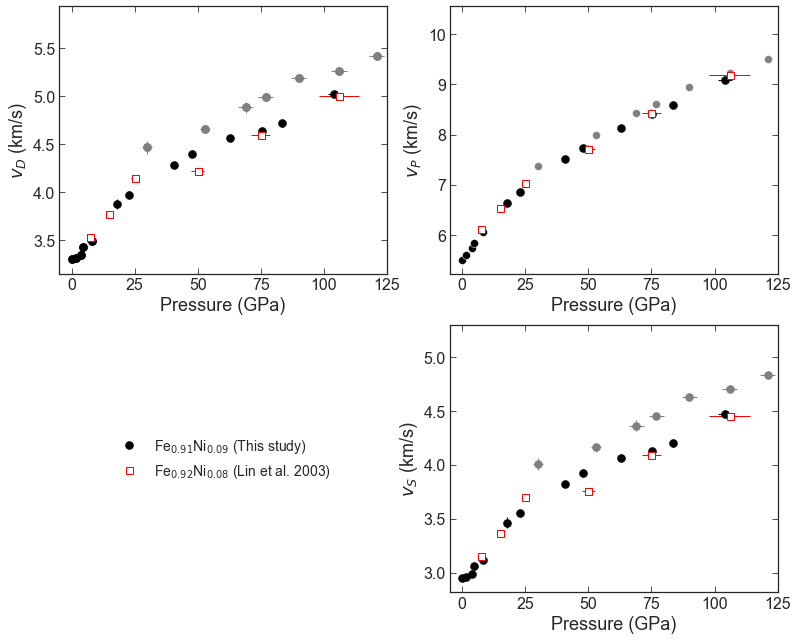

In [21]:
# Fe-Ni sounde velocity plots: vD as reported, vP and vS corrected for natural enrichment
fig, ((ax0,ax2),(ax1,ax3)) = plt.subplots(nrows = 2, ncols=2, figsize=(11, 9))


# Fe-Ni comparison Debye velocity plot
alphaval = 1
x = 'P'
dx = 'dP'
y = 'vD_nat'
dy = 'dvD_nat'

study = 'hcpFe_Murphy'
df = precious_dfdict[study]
color = 'gray'
ecolor = 'gray'
markersize = 8
h1, = ax0.plot(df[x], df[y], marker=symbol[study], ms=markersize, color=ecolor,
               mfc=color,  alpha = alphaval,
               label=r'Fe (This study)',markeredgewidth=0.5,ls='none')
ax0.errorbar(df[x], df[y], xerr=df[dx], yerr=df[dy], alpha = alphaval,
                 marker=symbol[study], ms=markersize, color=ecolor, 
                 mfc=color,
                 label=r'Fe (This study)',markeredgewidth=0.5,ls='none',elinewidth=1) 

study = 'bccFeNi'
df = precious_dfdict[study]
color = 'black'
ecolor = 'black'
markersize = 8
h1, = ax0.plot(df[x], df[y], marker=symbol[study], ms=markersize, color=ecolor,
               mfc=color,  alpha = alphaval,
               label=r'Fe$_{0.91}$Ni$_{0.09}$ (This study)',markeredgewidth=0.5,ls='none')
ax0.errorbar(df[x], df[y], xerr=df[dx], yerr=df[dy], alpha = alphaval,
                 marker=symbol[study], ms=markersize, color=ecolor, 
                 mfc=color,
                 label=r'Fe$_{0.91}$Ni$_{0.09}$ (This study)',markeredgewidth=0.5,ls='none',elinewidth=1) 

study = 'hcpFeNi'
df = precious_dfdict[study]
color = 'black'
ecolor = 'black'
markersize = 8
ax0.errorbar(df[x], df[y], xerr=df[dx], yerr=df[dy], alpha = alphaval,
                 marker=symbol[study], ms=markersize, color=ecolor, 
                 mfc=color,markeredgewidth=0.5,ls='none',elinewidth=1) 

study = 'Lin2003_hcpFeNi'
df = precious_dfdict[study]
color = 'red'
marker = '^'
markersize = 7
h2, = ax0.plot(df[x], df[y], marker=symbol[study], ms=markersize, color=colorchoice[study],
               mfc=mfcchoice[study],  alpha = alphaval,
               label=labelchoice[study],markeredgewidth=1,ls='none')
ax0.errorbar(df[x], df[y], xerr=df[dx], yerr=df[dy], alpha = alphaval,
                 marker=symbol[study], ms=markersize, color=colorchoice[study], 
                 mfc=mfcchoice[study],
                 label=labelchoice[study],markeredgewidth=1,ls='none',elinewidth=1)   

ax0.tick_params(direction='in',right='on',top='on')
ax0.set_xlabel(r'Pressure (GPa)', fontsize=18)
ax0.set_ylabel(r'$v_{D}$ (km/s)', fontsize=18)
ax0.set_xlim([-5,125])



# Fe-Ni comparison compression velocity plot
alphaval = 1
x = 'P'
dx = 'dP'
y = 'vP_nat'
dy = 'dvP_nat'

study = 'hcpFe_Murphy'
df = precious_dfdict[study]
color = 'gray'
ecolor = 'white'
markersize = 8
ax2.errorbar(df[x], df[y], xerr=df[dx], yerr=df[dy], alpha = alphaval,
                 marker=symbol[study], ms=markersize, color=ecolor, 
                 mfc=color,markeredgewidth=0.5,ls='none',elinewidth=1) 

study = 'bccFeNi'
df = precious_dfdict[study]
color = 'black'
ecolor = 'white'
markersize = 8
ax2.errorbar(df[x], df[y], xerr=df[dx], yerr=df[dy], alpha = alphaval,
                 marker=symbol[study], ms=markersize, color=ecolor, 
                 mfc=color,markeredgewidth=0.5,ls='none',elinewidth=1) 

study = 'hcpFeNi'
df = precious_dfdict[study]
color = 'black'
ecolor = 'black'
markersize = 8
ax2.errorbar(df[x], df[y], xerr=df[dx], yerr=df[dy], alpha = alphaval,
                 marker=symbol[study], ms=markersize, color=ecolor, 
                 mfc=color,markeredgewidth=0.5,ls='none',elinewidth=1) 

study = 'Lin2003_hcpFeNi'
df = precious_dfdict[study]
color = 'red'
marker = '^'
markersize = 7
ax2.errorbar(df[x], df[y], xerr=df[dx], yerr=df[dy], alpha = alphaval,
                 marker=symbol[study], ms=markersize, color=colorchoice[study], 
                 mfc=mfcchoice[study],
                 label=labelchoice[study],markeredgewidth=1,ls='none',elinewidth=1)   

ax2.tick_params(direction='in',right='on',top='on')
ax2.set_xlabel(r'Pressure (GPa)', fontsize=18)
ax2.set_ylabel(r'$v_{P}$ (km/s)', fontsize=18)
ax2.set_xlim([-5,125])



# Fe-Ni comparison shear velocity plot
alphaval = 1
x = 'P'
dx = 'dP'
y = 'vS_nat'
dy = 'dvS_nat'

study = 'hcpFe_Murphy'
df = precious_dfdict[study]
color = 'gray'
ecolor = 'gray'
markersize = 8
ax3.errorbar(df[x], df[y], xerr=df[dx], yerr=df[dy], alpha = alphaval,
                 marker=symbol[study], ms=markersize, color=ecolor, 
                 mfc=color,markeredgewidth=0.5,ls='none',elinewidth=1) 

study = 'bccFeNi'
df = precious_dfdict[study]
color = 'black'
ecolor = 'black'
markersize = 8
ax3.errorbar(df[x], df[y], xerr=df[dx], yerr=df[dy], alpha = alphaval,
                 marker=symbol[study], ms=markersize, color=ecolor, 
                 mfc=color,markeredgewidth=0.5,ls='none',elinewidth=1) 

study = 'hcpFeNi'
df = precious_dfdict[study]
color = 'black'
ecolor = 'black'
markersize = 8
ax3.errorbar(df[x], df[y], xerr=df[dx], yerr=df[dy], alpha = alphaval,
                 marker=symbol[study], ms=markersize, color=ecolor, 
                 mfc=color,markeredgewidth=0.5,ls='none',elinewidth=1) 

study = 'Lin2003_hcpFeNi'
df = precious_dfdict[study]
color = 'red'
marker = '^'
markersize = 7
ax3.errorbar(df[x], df[y], xerr=df[dx], yerr=df[dy], alpha = alphaval,
                 marker=symbol[study], ms=markersize, color=colorchoice[study], 
                 mfc=mfcchoice[study],
                 label=labelchoice[study],markeredgewidth=1,ls='none',elinewidth=1)   

ax3.tick_params(direction='in',right='on',top='on')
ax3.set_xlabel(r'Pressure (GPa)', fontsize=18)
ax3.set_ylabel(r'$v_{S}$ (km/s)', fontsize=18)
ax3.set_xlim([-5,125])


# Plot details
ax1.tick_params(direction='in',left='off',bottom='off')
ax1.set_xticklabels([])
ax1.set_yticklabels([])
ax1.set_frame_on(False)

# Legend
hlabels = [h1,h2]
ax1.legend(fontsize=14,loc=10,handles = hlabels)

plt.tight_layout()

fig = plt.gcf()
fig.savefig('FeNi_velocities_nat_alt.pdf', format='pdf', bbox_inches='tight', transparent=True)

## Plots comparing Fe-(Ni-)Si studies

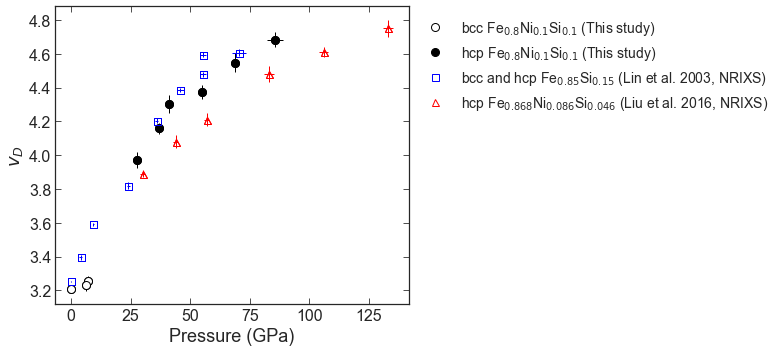

In [280]:
# Fe-Ni-Si comparison Debye velocity plot as reported
alphaval = 1
x = 'P'
dx = 'dP'
y = 'vD'
dy = 'dvD'

fig, (ax0) = plt.subplots(nrows = 1, ncols=1, sharex=True, figsize=(6, 5))

hlabels = []

study = 'bccFeNiSi'
df = precious_dfdict[study]
color = 'black'
markersize = 8
h, = ax0.plot(df[x], df[y], marker=symbol[study], ms=markersize, color=color,
               mfc=mfcchoice[study],  alpha = alphaval,
               label=labelchoice[study],markeredgewidth=1,ls='none')
ax0.errorbar(df[x], df[y], xerr=df[dx], yerr=df[dy], alpha = alphaval,
                 marker=symbol[study], ms=markersize, color=color, 
                 mfc=mfcchoice[study],
                 label='bcc and hcp Fe (This study)',markeredgewidth=1,ls='none',elinewidth=1) 
hlabels.append(h)

study = 'hcpFeNiSi'
df = precious_dfdict[study]
color = 'black'
markersize = 8
h, = ax0.plot(df[x], df[y], marker=symbol[study], ms=markersize, color=color,
               mfc=color,  alpha = alphaval,
               label=labelchoice[study],markeredgewidth=1,ls='none')
ax0.errorbar(df[x], df[y], xerr=df[dx], yerr=df[dy], alpha = alphaval,
                 marker=symbol[study], ms=markersize, color=color, 
                 mfc=color,
                 label=labelchoice[study],markeredgewidth=1,ls='none',elinewidth=1) 
hlabels.append(h)

study = 'Lin2003_hcpFeSi'
df = precious_dfdict[study]
color = 'blue'
marker = 's'
markersize = 7
h, = ax0.plot(df[x], df[y], marker=marker, ms=markersize, color=color,
               mfc=mfcchoice[study],  alpha = alphaval,
               label=labelchoice[study],markeredgewidth=1,ls='none')
ax0.errorbar(df[x], df[y], xerr=df[dx], yerr=df[dy], alpha = alphaval,
                 marker=marker, ms=markersize, color=color, 
                 mfc=mfcchoice[study],
                 label=labelchoice[study],markeredgewidth=1,ls='none',elinewidth=1)   
hlabels.append(h)

study = 'Liu2016_hcpFeNiSi_NRIXS'
df = precious_dfdict[study]
color = 'red'
marker = '^'
markersize = 7
h, = ax0.plot(df[x], df[y], marker=marker, ms=markersize, color=color,
               mfc=mfcchoice[study],  alpha = alphaval,
               label=labelchoice[study],markeredgewidth=1,ls='none')
ax0.errorbar(df[x], df[y], xerr=df[dx], yerr=df[dy], alpha = alphaval,
                 marker=marker, ms=markersize, color=color, 
                 mfc=mfcchoice[study],
                 label=labelchoice[study],markeredgewidth=1,ls='none',elinewidth=1)   
hlabels.append(h)

ax0.legend(fontsize=14,bbox_to_anchor=(1.0, 1),handles = hlabels)

ax0.tick_params(direction='in',right='on',top='on')
ax0.set_xlabel(r'Pressure (GPa)', fontsize=18)
ax0.set_ylabel(r'$v_{D}$', fontsize=18)

plt.tight_layout()

fig = plt.gcf()
fig.savefig('hcpFeAlloys_vD_FeNiSi.pdf', format='pdf', bbox_inches='tight')

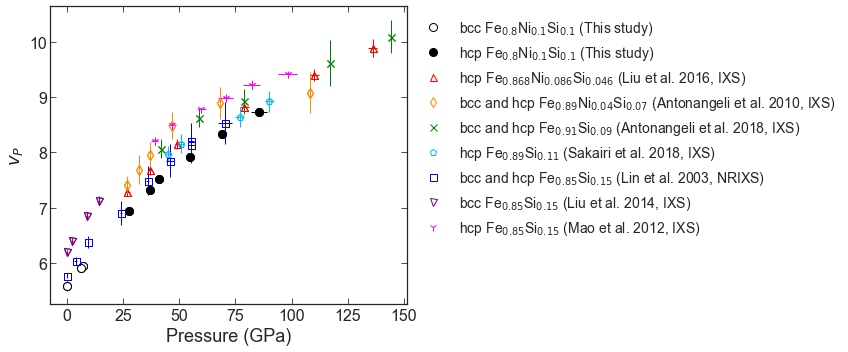

In [279]:
# Fe-Ni-Si comparison compressional velocity plot as reported
alphaval = 1
x = 'P'
dx = 'dP'
y = 'vP'
dy = 'dvP'

fig, (ax0) = plt.subplots(nrows = 1, ncols=1, sharex=True, figsize=(6, 5))

hlabels = []

study = 'bccFeNiSi'
df = precious_dfdict[study]
color = 'black'
markersize = 8
h, = ax0.plot(df[x], df[y], marker=symbol[study], ms=markersize, color=color,
               mfc=mfcchoice[study],  alpha = alphaval,
               label=labelchoice[study],markeredgewidth=1,ls='none')
ax0.errorbar(df[x], df[y], xerr=df[dx], yerr=df[dy], alpha = alphaval,
                 marker=symbol[study], ms=markersize, color=color, 
                 mfc=mfcchoice[study],
                 label='bcc and hcp Fe (This study)',markeredgewidth=1,ls='none',elinewidth=1) 
hlabels.append(h)

study = 'hcpFeNiSi'
df = precious_dfdict[study]
color = 'black'
markersize = 8
h, = ax0.plot(df[x], df[y], marker=symbol[study], ms=markersize, color=color,
               mfc=color,  alpha = alphaval,
               label=labelchoice[study],markeredgewidth=1,ls='none')
ax0.errorbar(df[x], df[y], xerr=df[dx], yerr=df[dy], alpha = alphaval,
                 marker=symbol[study], ms=markersize, color=color, 
                 mfc=color,
                 label=labelchoice[study],markeredgewidth=1,ls='none',elinewidth=1) 
hlabels.append(h)

study = 'Liu2016_hcpFeNiSi_IXS'
df = precious_dfdict[study]
color = 'red'
marker = '^'
markersize = 7
h, = ax0.plot(df[x], df[y], marker=marker, ms=markersize, color=color,
               mfc=mfcchoice[study],  alpha = alphaval,
               label=labelchoice[study],markeredgewidth=1,ls='none')
ax0.errorbar(df[x], df[y], xerr=df[dx], yerr=df[dy], alpha = alphaval,
                 marker=marker, ms=markersize, color=color, 
                 mfc=mfcchoice[study],
                 label=labelchoice[study],markeredgewidth=1,ls='none',elinewidth=1)   
hlabels.append(h)

study = 'Antonangeli2010_hcpFeNiSi'
df = precious_dfdict[study]
color = 'darkorange'
marker = 'd'
markersize = 7
h, = ax0.plot(df[x], df[y], marker=marker, ms=markersize, color=color,
               mfc=mfcchoice[study],  alpha = alphaval,
               label=labelchoice[study],markeredgewidth=1,ls='none')
ax0.errorbar(df[x], df[y], yerr=df[dy], alpha = alphaval,
                 marker=marker, ms=markersize, color=color, 
                 mfc=mfcchoice[study],
                 label=labelchoice[study],markeredgewidth=1,ls='none',elinewidth=1)   
hlabels.append(h)

study = 'Antonangeli2018_hcpFeSi'
df = precious_dfdict[study]
color = 'green'
marker = 'x'
markersize = 7
h, = ax0.plot(df[x], df[y], marker=marker, ms=markersize, color=color,
               mfc=mfcchoice[study],  alpha = alphaval,
               label=labelchoice[study],markeredgewidth=1,ls='none')
ax0.errorbar(df[x], df[y], yerr=df[dy], alpha = alphaval,
                 marker=marker, ms=markersize, color=color, 
                 mfc=mfcchoice[study],
                 label=labelchoice[study],markeredgewidth=1,ls='none',elinewidth=1)   
hlabels.append(h)

study = 'Sakairi2018_hcpFeSi'
df = precious_dfdict[study]
color = 'deepskyblue'
marker = 'p'
markersize = 7
h, = ax0.plot(df[x], df[y], marker=marker, ms=markersize, color=color,
               mfc=mfcchoice[study],  alpha = alphaval,
               label=labelchoice[study],markeredgewidth=1,ls='none')
ax0.errorbar(df[x], df[y], xerr=df[dx], yerr=df[dy], alpha = alphaval,
                 marker=marker, ms=markersize, color=color, 
                 mfc=mfcchoice[study],
                 label=labelchoice[study],markeredgewidth=1,ls='none',elinewidth=1)   
hlabels.append(h)

study = 'Lin2003_hcpFeSi'
df = precious_dfdict[study]
color = 'blue'
marker = 's'
markersize = 7
h, = ax0.plot(df[x], df[y], marker=marker, ms=markersize, color=color,
               mfc=mfcchoice[study],  alpha = alphaval,
               label=labelchoice[study],markeredgewidth=1,ls='none')
ax0.errorbar(df[x], df[y], xerr=df[dx], yerr=df[dy], alpha = alphaval,
                 marker=marker, ms=markersize, color=color, 
                 mfc=mfcchoice[study],
                 label=labelchoice[study],markeredgewidth=1,ls='none',elinewidth=1)   
hlabels.append(h)

study = 'Liu2014_bccFeSi'
df = precious_dfdict[study]
color = 'purple'
marker = 'v'
markersize = 7
h, = ax0.plot(df[x], df[y], marker=marker, ms=markersize, color=color,
               mfc=mfcchoice[study],  alpha = alphaval,
               label=labelchoice[study],markeredgewidth=1,ls='none')
ax0.errorbar(df[x], df[y], xerr=df[dx], yerr=df[dy], alpha = alphaval,
                 marker=marker, ms=markersize, color=color, 
                 mfc=mfcchoice[study],
                 label=labelchoice[study],markeredgewidth=1,ls='none',elinewidth=1)   
hlabels.append(h)


study = 'Mao2012_hcpFeSi'
df = precious_dfdict[study]
color = 'fuchsia'
marker = '1'
markersize = 7
h, = ax0.plot(df[x], df[y], marker=marker, ms=markersize, color=color,
               mfc=mfcchoice[study],  alpha = alphaval,
               label=labelchoice[study],markeredgewidth=1,ls='none')
ax0.errorbar(df[x], df[y], xerr=df[dx], yerr=df[dy], alpha = alphaval,
                 marker=marker, ms=markersize, color=color, 
                 mfc=mfcchoice[study],
                 label=labelchoice[study],markeredgewidth=1,ls='none',elinewidth=1)   
hlabels.append(h)


ax0.legend(fontsize=14,bbox_to_anchor=(1.0, 1),handles = hlabels)

ax0.tick_params(direction='in',right='on',top='on')
ax0.set_xlabel(r'Pressure (GPa)', fontsize=18)
ax0.set_ylabel(r'$v_{P}$', fontsize=18)

plt.tight_layout()

fig = plt.gcf()
fig.savefig('hcpFeAlloys_vP_FeNiSi_uncorrected.pdf', format='pdf', bbox_inches='tight')

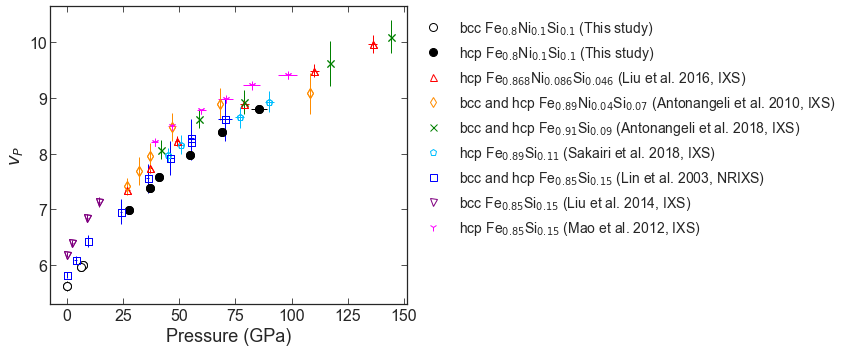

In [33]:
# Fe-Ni-Si comparison compressional velocity plot corrected for natural enrichment
alphaval = 1
x = 'P'
dx = 'dP'
y = 'vP_nat'
dy = 'dvP_nat'

fig, (ax0) = plt.subplots(nrows = 1, ncols=1, sharex=True, figsize=(6, 5))

hlabels = []

study = 'bccFeNiSi'
df = precious_dfdict[study]
color = 'black'
markersize = 8
h, = ax0.plot(df[x], df[y], marker=symbol[study], ms=markersize, color=color,
               mfc=mfcchoice[study],  alpha = alphaval,
               label=labelchoice[study],markeredgewidth=1,ls='none')
ax0.errorbar(df[x], df[y], xerr=df[dx], yerr=df[dy], alpha = alphaval,
                 marker=symbol[study], ms=markersize, color=color, 
                 mfc=mfcchoice[study],
                 label='bcc and hcp Fe (This study)',markeredgewidth=1,ls='none',elinewidth=1) 
hlabels.append(h)

study = 'hcpFeNiSi'
df = precious_dfdict[study]
color = 'black'
markersize = 8
h, = ax0.plot(df[x], df[y], marker=symbol[study], ms=markersize, color=color,
               mfc=color,  alpha = alphaval,
               label=labelchoice[study],markeredgewidth=1,ls='none')
ax0.errorbar(df[x], df[y], xerr=df[dx], yerr=df[dy], alpha = alphaval,
                 marker=symbol[study], ms=markersize, color=color, 
                 mfc=color,
                 label=labelchoice[study],markeredgewidth=1,ls='none',elinewidth=1) 
hlabels.append(h)

study = 'Liu2016_hcpFeNiSi_IXS'
df = precious_dfdict[study]
color = 'red'
marker = '^'
markersize = 7
h, = ax0.plot(df[x], df[y], marker=marker, ms=markersize, color=color,
               mfc=mfcchoice[study],  alpha = alphaval,
               label=labelchoice[study],markeredgewidth=1,ls='none')
ax0.errorbar(df[x], df[y], xerr=df[dx], yerr=df[dy], alpha = alphaval,
                 marker=marker, ms=markersize, color=color, 
                 mfc=mfcchoice[study],
                 label=labelchoice[study],markeredgewidth=1,ls='none',elinewidth=1)   
hlabels.append(h)

study = 'Antonangeli2010_hcpFeNiSi'
df = precious_dfdict[study]
color = 'darkorange'
marker = 'd'
markersize = 7
h, = ax0.plot(df[x], df[y], marker=marker, ms=markersize, color=color,
               mfc=mfcchoice[study],  alpha = alphaval,
               label=labelchoice[study],markeredgewidth=1,ls='none')
ax0.errorbar(df[x], df[y], yerr=df[dy], alpha = alphaval,
                 marker=marker, ms=markersize, color=color, 
                 mfc=mfcchoice[study],
                 label=labelchoice[study],markeredgewidth=1,ls='none',elinewidth=1)   
hlabels.append(h)

study = 'Antonangeli2018_hcpFeSi'
df = precious_dfdict[study]
color = 'green'
marker = 'x'
markersize = 7
h, = ax0.plot(df[x], df[y], marker=marker, ms=markersize, color=color,
               mfc=mfcchoice[study],  alpha = alphaval,
               label=labelchoice[study],markeredgewidth=1,ls='none')
ax0.errorbar(df[x], df[y], yerr=df[dy], alpha = alphaval,
                 marker=marker, ms=markersize, color=color, 
                 mfc=mfcchoice[study],
                 label=labelchoice[study],markeredgewidth=1,ls='none',elinewidth=1)   
hlabels.append(h)

study = 'Sakairi2018_hcpFeSi'
df = precious_dfdict[study]
color = 'deepskyblue'
marker = 'p'
markersize = 7
h, = ax0.plot(df[x], df[y], marker=marker, ms=markersize, color=color,
               mfc=mfcchoice[study],  alpha = alphaval,
               label=labelchoice[study],markeredgewidth=1,ls='none')
ax0.errorbar(df[x], df[y], xerr=df[dx], yerr=df[dy], alpha = alphaval,
                 marker=marker, ms=markersize, color=color, 
                 mfc=mfcchoice[study],
                 label=labelchoice[study],markeredgewidth=1,ls='none',elinewidth=1)   
hlabels.append(h)

study = 'Lin2003_hcpFeSi'
df = precious_dfdict[study]
color = 'blue'
marker = 's'
markersize = 7
h, = ax0.plot(df[x], df[y], marker=marker, ms=markersize, color=color,
               mfc=mfcchoice[study],  alpha = alphaval,
               label=labelchoice[study],markeredgewidth=1,ls='none')
ax0.errorbar(df[x], df[y], xerr=df[dx], yerr=df[dy], alpha = alphaval,
                 marker=marker, ms=markersize, color=color, 
                 mfc=mfcchoice[study],
                 label=labelchoice[study],markeredgewidth=1,ls='none',elinewidth=1)   
hlabels.append(h)

study = 'Liu2014_bccFeSi'
df = precious_dfdict[study]
color = 'purple'
marker = 'v'
markersize = 7
h, = ax0.plot(df[x], df[y], marker=marker, ms=markersize, color=color,
               mfc=mfcchoice[study],  alpha = alphaval,
               label=labelchoice[study],markeredgewidth=1,ls='none')
ax0.errorbar(df[x], df[y], xerr=df[dx], yerr=df[dy], alpha = alphaval,
                 marker=marker, ms=markersize, color=color, 
                 mfc=mfcchoice[study],
                 label=labelchoice[study],markeredgewidth=1,ls='none',elinewidth=1)   
hlabels.append(h)


study = 'Mao2012_hcpFeSi'
df = precious_dfdict[study]
color = 'fuchsia'
marker = '1'
markersize = 7
h, = ax0.plot(df[x], df[y], marker=marker, ms=markersize, color=color,
               mfc=mfcchoice[study],  alpha = alphaval,
               label=labelchoice[study],markeredgewidth=1,ls='none')
ax0.errorbar(df[x], df[y], xerr=df[dx], yerr=df[dy], alpha = alphaval,
                 marker=marker, ms=markersize, color=color, 
                 mfc=mfcchoice[study],
                 label=labelchoice[study],markeredgewidth=1,ls='none',elinewidth=1)   
hlabels.append(h)


ax0.legend(fontsize=14,bbox_to_anchor=(1.0, 1),handles = hlabels)

ax0.tick_params(direction='in',right='on',top='on')
ax0.set_xlabel(r'Pressure (GPa)', fontsize=18)
ax0.set_ylabel(r'$v_{P}$', fontsize=18)

plt.tight_layout()

fig = plt.gcf()
fig.savefig('hcpFeAlloys_vP_FeNiSi_nat.pdf', format='pdf', bbox_inches='tight')

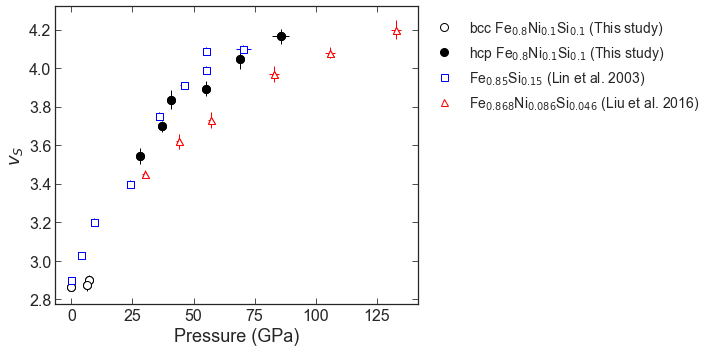

In [17]:
# Fe-Ni-Si comparison shear velocity plot as reported
alphaval = 1
x = 'P'
dx = 'dP'
y = 'vS'
dy = 'dvS'

fig, (ax0) = plt.subplots(nrows = 1, ncols=1, sharex=True, figsize=(6, 5))

hlabels = []

study = 'bccFeNiSi'
df = precious_dfdict[study]
color = 'black'
markersize = 8
h, = ax0.plot(df[x], df[y], marker=symbol[study], ms=markersize, color=color,
               mfc=mfcchoice[study],  alpha = alphaval,
               label=labelchoice[study],markeredgewidth=1,ls='none')
ax0.errorbar(df[x], df[y], xerr=df[dx], yerr=df[dy], alpha = alphaval,
                 marker=symbol[study], ms=markersize, color=color, 
                 mfc=mfcchoice[study],
                 label='bcc and hcp Fe (This study)',markeredgewidth=1,ls='none',elinewidth=1) 
hlabels.append(h)

study = 'hcpFeNiSi'
df = precious_dfdict[study]
color = 'black'
markersize = 8
h, = ax0.plot(df[x], df[y], marker=symbol[study], ms=markersize, color=color,
               mfc=color,  alpha = alphaval,
               label=labelchoice[study],markeredgewidth=1,ls='none')
ax0.errorbar(df[x], df[y], xerr=df[dx], yerr=df[dy], alpha = alphaval,
                 marker=symbol[study], ms=markersize, color=color, 
                 mfc=color,
                 label=labelchoice[study],markeredgewidth=1,ls='none',elinewidth=1) 
hlabels.append(h)

study = 'Lin2003_hcpFeSi'
df = precious_dfdict[study]
color = 'blue'
marker = 's'
markersize = 7
h, = ax0.plot(df[x], df[y], marker=marker, ms=markersize, color=color,
               mfc=mfcchoice[study],  alpha = alphaval,
               label=labelchoice[study],markeredgewidth=1,ls='none')
ax0.errorbar(df[x], df[y], xerr=df[dx], yerr=df[dy], alpha = alphaval,
                 marker=marker, ms=markersize, color=color, 
                 mfc=mfcchoice[study],
                 label=labelchoice[study],markeredgewidth=1,ls='none',elinewidth=1)   
hlabels.append(h)

study = 'Liu2016_hcpFeNiSi_NRIXS'
df = precious_dfdict[study]
color = 'red'
marker = '^'
markersize = 7
h, = ax0.plot(df[x], df[y], marker=marker, ms=markersize, color=color,
               mfc=mfcchoice[study],  alpha = alphaval,
               label=labelchoice[study],markeredgewidth=1,ls='none')
ax0.errorbar(df[x], df[y], xerr=df[dx], yerr=df[dy], alpha = alphaval,
                 marker=marker, ms=markersize, color=color, 
                 mfc=mfcchoice[study],
                 label=labelchoice[study],markeredgewidth=1,ls='none',elinewidth=1)   
hlabels.append(h)

ax0.legend(fontsize=14,bbox_to_anchor=(1.0, 1),handles = hlabels)

ax0.tick_params(direction='in',right='on',top='on')
ax0.set_xlabel(r'Pressure (GPa)', fontsize=18)
ax0.set_ylabel(r'$v_{S}$', fontsize=18)

plt.tight_layout()

fig = plt.gcf()
fig.savefig('hcpFeAlloys_vS_FeNiSi_uncorrected.pdf', format='pdf', bbox_inches='tight')

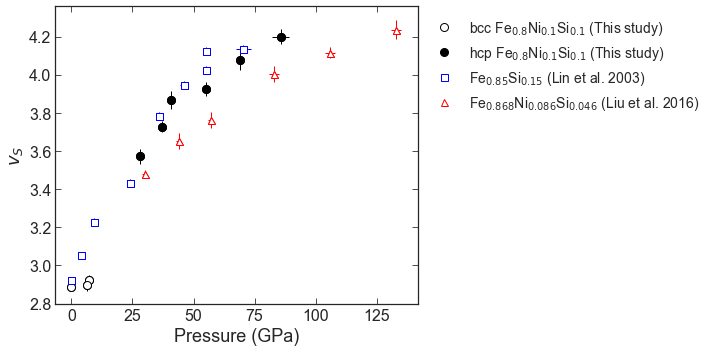

In [18]:
# Fe-Ni-Si comparison shear velocity plot corrected for natural enrichment
alphaval = 1
x = 'P'
dx = 'dP'
y = 'vS_nat'
dy = 'dvS_nat'

fig, (ax0) = plt.subplots(nrows = 1, ncols=1, sharex=True, figsize=(6, 5))

hlabels = []

study = 'bccFeNiSi'
df = precious_dfdict[study]
color = 'black'
markersize = 8
h, = ax0.plot(df[x], df[y], marker=symbol[study], ms=markersize, color=color,
               mfc=mfcchoice[study],  alpha = alphaval,
               label=labelchoice[study],markeredgewidth=1,ls='none')
ax0.errorbar(df[x], df[y], xerr=df[dx], yerr=df[dy], alpha = alphaval,
                 marker=symbol[study], ms=markersize, color=color, 
                 mfc=mfcchoice[study],
                 label='bcc and hcp Fe (This study)',markeredgewidth=1,ls='none',elinewidth=1) 
hlabels.append(h)

study = 'hcpFeNiSi'
df = precious_dfdict[study]
color = 'black'
markersize = 8
h, = ax0.plot(df[x], df[y], marker=symbol[study], ms=markersize, color=color,
               mfc=color,  alpha = alphaval,
               label=labelchoice[study],markeredgewidth=1,ls='none')
ax0.errorbar(df[x], df[y], xerr=df[dx], yerr=df[dy], alpha = alphaval,
                 marker=symbol[study], ms=markersize, color=color, 
                 mfc=color,
                 label=labelchoice[study],markeredgewidth=1,ls='none',elinewidth=1) 
hlabels.append(h)

study = 'Lin2003_hcpFeSi'
df = precious_dfdict[study]
color = 'blue'
marker = 's'
markersize = 7
h, = ax0.plot(df[x], df[y], marker=marker, ms=markersize, color=color,
               mfc=mfcchoice[study],  alpha = alphaval,
               label=labelchoice[study],markeredgewidth=1,ls='none')
ax0.errorbar(df[x], df[y], xerr=df[dx], yerr=df[dy], alpha = alphaval,
                 marker=marker, ms=markersize, color=color, 
                 mfc=mfcchoice[study],
                 label=labelchoice[study],markeredgewidth=1,ls='none',elinewidth=1)   
hlabels.append(h)

study = 'Liu2016_hcpFeNiSi_NRIXS'
df = precious_dfdict[study]
color = 'red'
marker = '^'
markersize = 7
h, = ax0.plot(df[x], df[y], marker=marker, ms=markersize, color=color,
               mfc=mfcchoice[study],  alpha = alphaval,
               label=labelchoice[study],markeredgewidth=1,ls='none')
ax0.errorbar(df[x], df[y], xerr=df[dx], yerr=df[dy], alpha = alphaval,
                 marker=marker, ms=markersize, color=color, 
                 mfc=mfcchoice[study],
                 label=labelchoice[study],markeredgewidth=1,ls='none',elinewidth=1)   
hlabels.append(h)

ax0.legend(fontsize=14,bbox_to_anchor=(1.0, 1),handles = hlabels)

ax0.tick_params(direction='in',right='on',top='on')
ax0.set_xlabel(r'Pressure (GPa)', fontsize=18)
ax0.set_ylabel(r'$v_{S}$', fontsize=18)

plt.tight_layout()

fig = plt.gcf()
fig.savefig('hcpFeAlloys_vS_FeNiSi_nat.pdf', format='pdf', bbox_inches='tight')

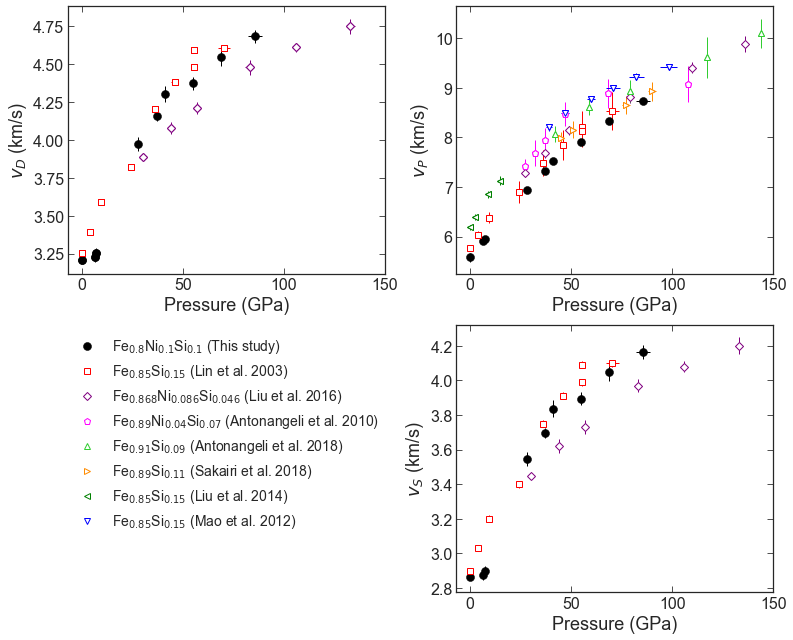

In [36]:
# Fe-Ni-Si sound velocity plots as reported
fig, ((ax0,ax2),(ax1,ax3)) = plt.subplots(nrows = 2, ncols=2, figsize=(11, 9))


# Fe-Ni-Si comparison Debye velocity plot
alphaval = 1
x = 'P'
dx = 'dP'
y = 'vD'
dy = 'dvD'

study = 'bccFeNiSi'
df = precious_dfdict[study]
color = 'black'
ecolor = 'black'
markersize = 8
h1, = ax0.plot(df[x], df[y], marker=symbol[study], ms=markersize, color=ecolor,
               mfc=color, alpha = alphaval,
               label='Fe$_{0.8}$Ni$_{0.1}$Si$_{0.1}$ (This study)',markeredgewidth=0.5,ls='none')
ax0.errorbar(df[x], df[y], xerr=df[dx], yerr=df[dy], alpha = alphaval,
                 marker=symbol[study], ms=markersize, color=ecolor, 
                 mfc=color,markeredgewidth=0.5,ls='none',elinewidth=1) 

study = 'hcpFeNiSi'
df = precious_dfdict[study]
color = 'black'
ecolor = 'black'
markersize = 8
ax0.errorbar(df[x], df[y], xerr=df[dx], yerr=df[dy], alpha = alphaval,
                 marker=symbol[study], ms=markersize, color=ecolor, 
                 mfc=color,markeredgewidth=0.5,ls='none',elinewidth=1) 

study = 'Lin2003_hcpFeSi'
df = precious_dfdict[study]
color = 'blue'
marker = 's'
markersize = 7
h2, = ax0.plot(df[x], df[y], marker=symbol[study], ms=symbolsize[study], color=colorchoice[study],
               mfc=mfcchoice[study],  alpha = alphaval,
               label=labelchoice[study],markeredgewidth=1,ls='none')
ax0.errorbar(df[x], df[y], xerr=df[dx], yerr=df[dy], alpha = alphaval,
                 marker=symbol[study], ms=symbolsize[study], color=colorchoice[study] , 
                 mfc=mfcchoice[study],
                 label=labelchoice[study],markeredgewidth=1,ls='none',elinewidth=1)   

study = 'Liu2016_hcpFeNiSi_NRIXS'
df = precious_dfdict[study]
color = 'red'
marker = '^'
markersize = 7
h3, = ax0.plot(df[x], df[y], marker=symbol[study], ms=symbolsize[study], color=colorchoice[study],
               mfc=mfcchoice[study],  alpha = alphaval,
               label=labelchoice[study],markeredgewidth=1,ls='none')
ax0.errorbar(df[x], df[y], xerr=df[dx], yerr=df[dy], alpha = alphaval,
                 marker=symbol[study], ms=symbolsize[study], color=colorchoice[study], 
                 mfc=mfcchoice[study],
                 label=labelchoice[study],markeredgewidth=1,ls='none',elinewidth=1)   

ax0.tick_params(direction='in',right='on',top='on')
ax0.set_xlabel(r'Pressure (GPa)', fontsize=18)
ax0.set_ylabel(r'$v_{D}$ (km/s)', fontsize=18)
ax0.set_xlim([-7,150])



# Fe-Ni-Si comparison compressional velocity plot
alphaval = 1
x = 'P'
dx = 'dP'
y = 'vP'
dy = 'dvP'

study = 'bccFeNiSi'
df = precious_dfdict[study]
color = 'black'
ecolor = 'black'
markersize = 8
ax2.errorbar(df[x], df[y], xerr=df[dx], yerr=df[dy], alpha = alphaval,
                 marker=symbol[study], ms=markersize, color=ecolor, 
                 mfc=color,markeredgewidth=0.5,ls='none',elinewidth=1) 

study = 'hcpFeNiSi'
df = precious_dfdict[study]
color = 'black'
ecolor = 'black'
markersize = 8
ax2.errorbar(df[x], df[y], xerr=df[dx], yerr=df[dy], alpha = alphaval,
                 marker=symbol[study], ms=markersize, color=ecolor, 
                 mfc=color,markeredgewidth=0.5,ls='none',elinewidth=1) 

study = 'Liu2016_hcpFeNiSi_IXS'
df = precious_dfdict[study]
color = 'red'
marker = '^'
markersize = 7
ax2.errorbar(df[x], df[y], xerr=df[dx], yerr=df[dy], alpha = alphaval,
                 marker=symbol[study], ms=symbolsize[study], color=colorchoice[study], 
                 mfc=mfcchoice[study],
                 label=labelchoice[study],markeredgewidth=1,ls='none',elinewidth=1)   

study = 'Antonangeli2010_hcpFeNiSi'
df = precious_dfdict[study]
color = 'darkorange'
marker = 'd'
markersize = 7
h4, = ax2.plot(df[x], df[y], marker=symbol[study], ms=symbolsize[study], color=colorchoice[study],
               mfc=mfcchoice[study],  alpha = alphaval,
               label=labelchoice[study],markeredgewidth=1,ls='none')
ax2.errorbar(df[x], df[y], yerr=df[dy], alpha = alphaval,
                 marker=symbol[study], ms=symbolsize[study], color=colorchoice[study], 
                 mfc=mfcchoice[study],
                 label=labelchoice[study],markeredgewidth=1,ls='none',elinewidth=1)   

study = 'Antonangeli2018_hcpFeSi'
df = precious_dfdict[study]
color = 'green'
marker = 'x'
markersize = 7
h5, = ax2.plot(df[x], df[y], marker=symbol[study], ms=symbolsize[study], color=colorchoice[study],
               mfc=mfcchoice[study],  alpha = alphaval,
               label=labelchoice[study],markeredgewidth=1,ls='none')
ax2.errorbar(df[x], df[y], yerr=df[dy], alpha = alphaval,
                 marker=symbol[study], ms=symbolsize[study], color=colorchoice[study], 
                 mfc=mfcchoice[study],
                 label=labelchoice[study],markeredgewidth=1,ls='none',elinewidth=1)   

study = 'Sakairi2018_hcpFeSi'
df = precious_dfdict[study]
color = 'deepskyblue'
marker = 'p'
markersize = 8
h6, = ax2.plot(df[x], df[y], marker=symbol[study], ms=symbolsize[study], color=colorchoice[study],
               mfc=mfcchoice[study],  alpha = alphaval,
               label=labelchoice[study],markeredgewidth=1,ls='none')
ax2.errorbar(df[x], df[y], xerr=df[dx], yerr=df[dy], alpha = alphaval,
                 marker=symbol[study], ms=symbolsize[study], color=colorchoice[study], 
                 mfc=mfcchoice[study],
                 label=labelchoice[study],markeredgewidth=1,ls='none',elinewidth=1)   

study = 'Lin2003_hcpFeSi'
df = precious_dfdict[study]
color = 'blue'
marker = 's'
markersize = 7
ax2.errorbar(df[x], df[y], xerr=df[dx], yerr=df[dy], alpha = alphaval,
                 marker=symbol[study], ms=symbolsize[study], color=colorchoice[study], 
                 mfc=mfcchoice[study],
                 label=labelchoice[study],markeredgewidth=1,ls='none',elinewidth=1)   

study = 'Liu2014_bccFeSi'
df = precious_dfdict[study]
color = 'purple'
marker = 'v'
markersize = 7
h7, = ax2.plot(df[x], df[y], marker=symbol[study], ms=symbolsize[study], color=colorchoice[study],
               mfc=mfcchoice[study],  alpha = alphaval,
               label=labelchoice[study],markeredgewidth=1,ls='none')
ax2.errorbar(df[x], df[y], xerr=df[dx], yerr=df[dy], alpha = alphaval,
                 marker=symbol[study], ms=symbolsize[study], color=colorchoice[study], 
                 mfc=mfcchoice[study],
                 label=labelchoice[study],markeredgewidth=1,ls='none',elinewidth=1)   

study = 'Mao2012_hcpFeSi'
df = precious_dfdict[study]
color = 'fuchsia'
marker = '1'
markersize = 7
h8, = ax2.plot(df[x], df[y], marker=symbol[study], ms=symbolsize[study], color=colorchoice[study],
               mfc=mfcchoice[study],  alpha = alphaval,
               label=labelchoice[study],markeredgewidth=1,ls='none')
ax2.errorbar(df[x], df[y], xerr=df[dx], yerr=df[dy], alpha = alphaval,
                 marker=symbol[study], ms=symbolsize[study], color=colorchoice[study], 
                 mfc=mfcchoice[study],
                 label=labelchoice[study],markeredgewidth=1,ls='none',elinewidth=1)  

ax2.tick_params(direction='in',right='on',top='on')
ax2.set_xlabel(r'Pressure (GPa)', fontsize=18)
ax2.set_ylabel(r'$v_{P}$ (km/s)', fontsize=18)
ax2.set_xlim([-7,150])



# Fe-Ni-Si comparison shear velocity plot
alphaval = 1
x = 'P'
dx = 'dP'
y = 'vS'
dy = 'dvS'

study = 'bccFeNiSi'
df = precious_dfdict[study]
color = 'black'
ecolor = 'black'
markersize = 8
ax3.errorbar(df[x], df[y], xerr=df[dx], yerr=df[dy], alpha = alphaval,
                 marker=symbol[study], ms=markersize, color=ecolor, 
                 mfc=color,markeredgewidth=0.5,ls='none',elinewidth=1) 

study = 'hcpFeNiSi'
df = precious_dfdict[study]
color = 'black'
ecolor = 'black'
markersize = 8
ax3.errorbar(df[x], df[y], xerr=df[dx], yerr=df[dy], alpha = alphaval,
                 marker=symbol[study], ms=markersize, color=ecolor, 
                 mfc=color,markeredgewidth=0.5,ls='none',elinewidth=1) 

study = 'Lin2003_hcpFeSi'
df = precious_dfdict[study]
color = 'blue'
marker = 's'
markersize = 7
ax3.errorbar(df[x], df[y], xerr=df[dx], yerr=df[dy], alpha = alphaval,
                 marker=symbol[study], ms=symbolsize[study], color=colorchoice[study], 
                 mfc=mfcchoice[study],
                 label=labelchoice[study],markeredgewidth=1,ls='none',elinewidth=1)   

study = 'Liu2016_hcpFeNiSi_NRIXS'
df = precious_dfdict[study]
color = 'red'
marker = '^'
markersize = 7
ax3.errorbar(df[x], df[y], xerr=df[dx], yerr=df[dy], alpha = alphaval,
                 marker=symbol[study], ms=symbolsize[study], color=colorchoice[study], 
                 mfc=mfcchoice[study],
                 label=labelchoice[study],markeredgewidth=1,ls='none',elinewidth=1)   

ax3.tick_params(direction='in',right='on',top='on')
ax3.set_xlabel(r'Pressure (GPa)', fontsize=18)
ax3.set_ylabel(r'$v_{S}$ (km/s)', fontsize=18)
ax3.set_xlim([-7,150])


# Plot details
ax1.tick_params(direction='in',left='off',bottom='off')
ax1.set_xticklabels([])
ax1.set_yticklabels([])
ax1.set_frame_on(False)

# Legend
hlabels = [h1,h2,h3,h4,h5,h6,h7,h8]
ax1.legend(fontsize=14,loc=9,handles = hlabels)

plt.tight_layout()

fig = plt.gcf()
fig.savefig('FeNiSi_velocities_uncorrected.pdf', format='pdf', bbox_inches='tight', transparent=True)

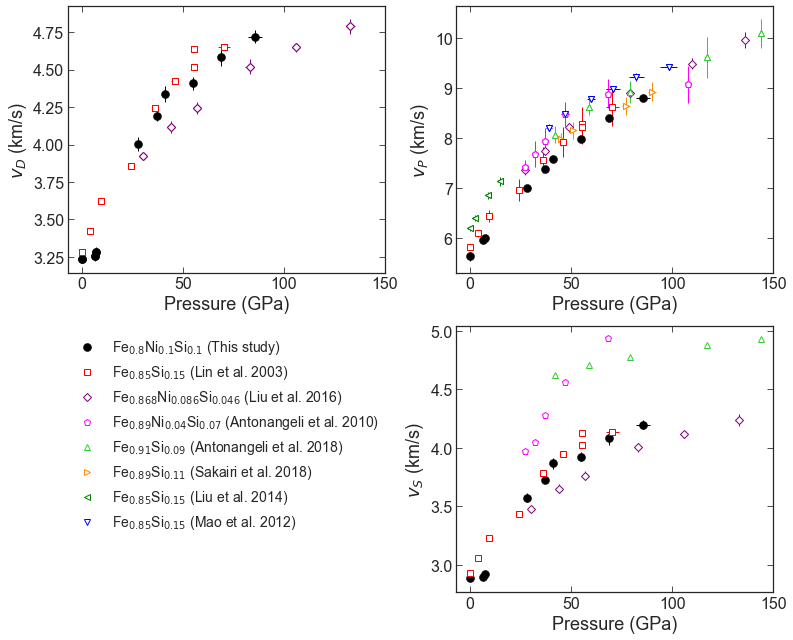

In [37]:
# Fe-Ni-Si sound velocity plots: vD, vP, and vS corrected for natural enrichment
fig, ((ax0,ax2),(ax1,ax3)) = plt.subplots(nrows = 2, ncols=2, figsize=(11, 9))


# Fe-Ni-Si comparison Debye velocity plot
alphaval = 1
x = 'P'
dx = 'dP'
y = 'vD_nat'
dy = 'dvD_nat'

study = 'bccFeNiSi'
df = precious_dfdict[study]
color = 'black'
ecolor = 'black'
markersize = 8
h1, = ax0.plot(df[x], df[y], marker=symbol[study], ms=markersize, color=ecolor,
               mfc=color, alpha = alphaval,
               label='Fe$_{0.8}$Ni$_{0.1}$Si$_{0.1}$ (This study)',markeredgewidth=0.5,ls='none')
ax0.errorbar(df[x], df[y], xerr=df[dx], yerr=df[dy], alpha = alphaval,
                 marker=symbol[study], ms=markersize, color=ecolor, 
                 mfc=color,markeredgewidth=0.5,ls='none',elinewidth=1) 

study = 'hcpFeNiSi'
df = precious_dfdict[study]
color = 'black'
ecolor = 'black'
markersize = 8
ax0.errorbar(df[x], df[y], xerr=df[dx], yerr=df[dy], alpha = alphaval,
                 marker=symbol[study], ms=markersize, color=ecolor, 
                 mfc=color,markeredgewidth=0.5,ls='none',elinewidth=1) 

study = 'Lin2003_hcpFeSi'
df = precious_dfdict[study]
color = 'blue'
marker = 's'
markersize = 7
h2, = ax0.plot(df[x], df[y], marker=symbol[study], ms=symbolsize[study], color=colorchoice[study],
               mfc=mfcchoice[study],  alpha = alphaval,
               label=labelchoice[study],markeredgewidth=1,ls='none')
ax0.errorbar(df[x], df[y], xerr=df[dx], yerr=df[dy], alpha = alphaval,
                 marker=symbol[study], ms=symbolsize[study], color=colorchoice[study] , 
                 mfc=mfcchoice[study],
                 label=labelchoice[study],markeredgewidth=1,ls='none',elinewidth=1)   

study = 'Liu2016_hcpFeNiSi_NRIXS'
df = precious_dfdict[study]
color = 'red'
marker = '^'
markersize = 7
h3, = ax0.plot(df[x], df[y], marker=symbol[study], ms=symbolsize[study], color=colorchoice[study],
               mfc=mfcchoice[study],  alpha = alphaval,
               label=labelchoice[study],markeredgewidth=1,ls='none')
ax0.errorbar(df[x], df[y], xerr=df[dx], yerr=df[dy], alpha = alphaval,
                 marker=symbol[study], ms=symbolsize[study], color=colorchoice[study], 
                 mfc=mfcchoice[study],
                 label=labelchoice[study],markeredgewidth=1,ls='none',elinewidth=1)   

ax0.tick_params(direction='in',right='on',top='on')
ax0.set_xlabel(r'Pressure (GPa)', fontsize=18)
ax0.set_ylabel(r'$v_{D}$ (km/s)', fontsize=18)
ax0.set_xlim([-7,150])



# Fe-Ni-Si comparison compressional velocity plot
alphaval = 1
x = 'P'
dx = 'dP'
y = 'vP_nat'
dy = 'dvP_nat'

study = 'bccFeNiSi'
df = precious_dfdict[study]
color = 'black'
ecolor = 'black'
markersize = 8
ax2.errorbar(df[x], df[y], xerr=df[dx], yerr=df[dy], alpha = alphaval,
                 marker=symbol[study], ms=markersize, color=ecolor, 
                 mfc=color,markeredgewidth=0.5,ls='none',elinewidth=1) 

study = 'hcpFeNiSi'
df = precious_dfdict[study]
color = 'black'
ecolor = 'black'
markersize = 8
ax2.errorbar(df[x], df[y], xerr=df[dx], yerr=df[dy], alpha = alphaval,
                 marker=symbol[study], ms=markersize, color=ecolor, 
                 mfc=color,markeredgewidth=0.5,ls='none',elinewidth=1) 

study = 'Liu2016_hcpFeNiSi_IXS'
df = precious_dfdict[study]
color = 'red'
marker = '^'
markersize = 7
ax2.errorbar(df[x], df[y], xerr=df[dx], yerr=df[dy], alpha = alphaval,
                 marker=symbol[study], ms=symbolsize[study], color=colorchoice[study], 
                 mfc=mfcchoice[study],
                 label=labelchoice[study],markeredgewidth=1,ls='none',elinewidth=1)   

study = 'Antonangeli2010_hcpFeNiSi'
df = precious_dfdict[study]
color = 'darkorange'
marker = 'd'
markersize = 7
h4, = ax2.plot(df[x], df[y], marker=symbol[study], ms=symbolsize[study], color=colorchoice[study],
               mfc=mfcchoice[study],  alpha = alphaval,
               label=labelchoice[study],markeredgewidth=1,ls='none')
ax2.errorbar(df[x], df[y], yerr=df[dy], alpha = alphaval,
                 marker=symbol[study], ms=symbolsize[study], color=colorchoice[study], 
                 mfc=mfcchoice[study],
                 label=labelchoice[study],markeredgewidth=1,ls='none',elinewidth=1)   

study = 'Antonangeli2018_hcpFeSi'
df = precious_dfdict[study]
color = 'green'
marker = 'x'
markersize = 7
h5, = ax2.plot(df[x], df[y], marker=symbol[study], ms=symbolsize[study], color=colorchoice[study],
               mfc=mfcchoice[study],  alpha = alphaval,
               label=labelchoice[study],markeredgewidth=1,ls='none')
ax2.errorbar(df[x], df[y], yerr=df[dy], alpha = alphaval,
                 marker=symbol[study], ms=symbolsize[study], color=colorchoice[study], 
                 mfc=mfcchoice[study],
                 label=labelchoice[study],markeredgewidth=1,ls='none',elinewidth=1)   

study = 'Sakairi2018_hcpFeSi'
df = precious_dfdict[study]
color = 'deepskyblue'
marker = 'p'
markersize = 8
h6, = ax2.plot(df[x], df[y], marker=symbol[study], ms=symbolsize[study], color=colorchoice[study],
               mfc=mfcchoice[study],  alpha = alphaval,
               label=labelchoice[study],markeredgewidth=1,ls='none')
ax2.errorbar(df[x], df[y], xerr=df[dx], yerr=df[dy], alpha = alphaval,
                 marker=symbol[study], ms=symbolsize[study], color=colorchoice[study], 
                 mfc=mfcchoice[study],
                 label=labelchoice[study],markeredgewidth=1,ls='none',elinewidth=1)   

study = 'Lin2003_hcpFeSi'
df = precious_dfdict[study]
color = 'blue'
marker = 's'
markersize = 7
ax2.errorbar(df[x], df[y], xerr=df[dx], yerr=df[dy], alpha = alphaval,
                 marker=symbol[study], ms=symbolsize[study], color=colorchoice[study], 
                 mfc=mfcchoice[study],
                 label=labelchoice[study],markeredgewidth=1,ls='none',elinewidth=1)   

study = 'Liu2014_bccFeSi'
df = precious_dfdict[study]
color = 'purple'
marker = 'v'
markersize = 7
h7, = ax2.plot(df[x], df[y], marker=symbol[study], ms=symbolsize[study], color=colorchoice[study],
               mfc=mfcchoice[study],  alpha = alphaval,
               label=labelchoice[study],markeredgewidth=1,ls='none')
ax2.errorbar(df[x], df[y], xerr=df[dx], yerr=df[dy], alpha = alphaval,
                 marker=symbol[study], ms=symbolsize[study], color=colorchoice[study], 
                 mfc=mfcchoice[study],
                 label=labelchoice[study],markeredgewidth=1,ls='none',elinewidth=1)   

study = 'Mao2012_hcpFeSi'
df = precious_dfdict[study]
color = 'fuchsia'
marker = '1'
markersize = 7
h8, = ax2.plot(df[x], df[y], marker=symbol[study], ms=symbolsize[study], color=colorchoice[study],
               mfc=mfcchoice[study],  alpha = alphaval,
               label=labelchoice[study],markeredgewidth=1,ls='none')
ax2.errorbar(df[x], df[y], xerr=df[dx], yerr=df[dy], alpha = alphaval,
                 marker=symbol[study], ms=symbolsize[study], color=colorchoice[study], 
                 mfc=mfcchoice[study],
                 label=labelchoice[study],markeredgewidth=1,ls='none',elinewidth=1)   

ax2.tick_params(direction='in',right='on',top='on')
ax2.set_xlabel(r'Pressure (GPa)', fontsize=18)
ax2.set_ylabel(r'$v_{P}$ (km/s)', fontsize=18)
ax2.set_xlim([-7,150])



# Fe-Ni-Si comparison shear velocity plot
alphaval = 1
x = 'P'
dx = 'dP'
y = 'vS_nat'
dy = 'dvS_nat'

study = 'bccFeNiSi'
df = precious_dfdict[study]
color = 'black'
ecolor = 'black'
markersize = 8
ax3.errorbar(df[x], df[y], xerr=df[dx], yerr=df[dy], alpha = alphaval,
                 marker=symbol[study], ms=markersize, color=ecolor, 
                 mfc=color,markeredgewidth=0.5,ls='none',elinewidth=1) 

study = 'hcpFeNiSi'
df = precious_dfdict[study]
color = 'black'
ecolor = 'black'
markersize = 8
ax3.errorbar(df[x], df[y], xerr=df[dx], yerr=df[dy], alpha = alphaval,
                 marker=symbol[study], ms=markersize, color=ecolor, 
                 mfc=color,markeredgewidth=0.5,ls='none',elinewidth=1) 

study = 'Lin2003_hcpFeSi'
df = precious_dfdict[study]
color = 'blue'
marker = 's'
markersize = 7
ax3.errorbar(df[x], df[y], xerr=df[dx], yerr=df[dy], alpha = alphaval,
                 marker=symbol[study], ms=symbolsize[study], color=colorchoice[study], 
                 mfc=mfcchoice[study],
                 label=labelchoice[study],markeredgewidth=1,ls='none',elinewidth=1)   

study = 'Liu2016_hcpFeNiSi_NRIXS'
df = precious_dfdict[study]
color = 'red'
marker = '^'
markersize = 7
ax3.errorbar(df[x], df[y], xerr=df[dx], yerr=df[dy], alpha = alphaval,
                 marker=symbol[study], ms=symbolsize[study], color=colorchoice[study], 
                 mfc=mfcchoice[study],
                 label=labelchoice[study],markeredgewidth=1,ls='none',elinewidth=1)   

study = 'Antonangeli2010_hcpFeNiSi'
df = precious_dfdict[study]
ax3.plot(df[x], df[y], marker=symbol[study], ms=symbolsize[study], color=colorchoice[study],
               mfc=mfcchoice[study],  alpha = alphaval,
               label=labelchoice[study],markeredgewidth=1,ls='none')

study = 'Antonangeli2018_hcpFeSi'
df = precious_dfdict[study]
ax3.plot(df[x], df[y], marker=symbol[study], ms=symbolsize[study], color=colorchoice[study],
               mfc=mfcchoice[study],  alpha = alphaval,
               label=labelchoice[study],markeredgewidth=1,ls='none')


ax3.tick_params(direction='in',right='on',top='on')
ax3.set_xlabel(r'Pressure (GPa)', fontsize=18)
ax3.set_ylabel(r'$v_{S}$ (km/s)', fontsize=18)
ax3.set_xlim([-7,150])


# Plot details
ax1.tick_params(direction='in',left='off',bottom='off')
ax1.set_xticklabels([])
ax1.set_yticklabels([])
ax1.set_frame_on(False)

# Legend
hlabels = [h1,h2,h3,h4,h5,h6,h7,h8]
ax1.legend(fontsize=14,loc=9,handles = hlabels)

plt.tight_layout()

fig = plt.gcf()
fig.savefig('FeNiSi_velocities_nat.pdf', format='pdf', bbox_inches='tight', transparent=True)

## Plots comparing studies with various light elements

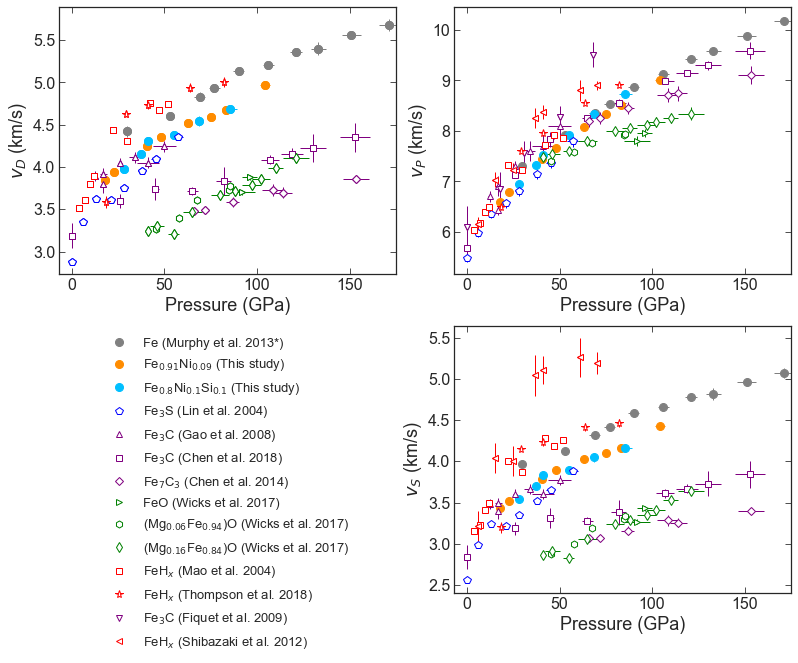

In [11]:
# Fe alloy sound velocity plots as reported
fig, ((ax0,ax2),(ax1,ax3)) = plt.subplots(nrows = 2, ncols=2, figsize=(11, 9))


# Fe alloy comparison Debye velocity plot
alphaval = 1
x = 'P'
dx = 'dP'
y = 'vD'
dy = 'dvD'

color='gray'
# study = 'bccFe'
# df = precious_dfdict[study]
# h1, = ax0.plot(df[x], df[y], marker=symbol[study], ms=symbolsize[study], color=color,
#                mfc=color,  alpha = alphaval,
#                label=labelchoice[study],markeredgewidth=1,ls='none')
# ax0.errorbar(df[x], df[y], xerr=df[dx], yerr=df[dy], alpha = alphaval,
#                  marker=symbol[study], ms=symbolsize[study], color=colorchoice[study] , 
#                  mfc=mfcchoice[study],
#                  label=labelchoice[study],markeredgewidth=1,ls='none',elinewidth=1)   

study = 'hcpFe_Murphy'
df = precious_dfdict[study]
h2, = ax0.plot(df[x], df[y], marker=symbol[study], ms=symbolsize[study], color=color,
               mfc=color,  alpha = alphaval,
               label='Fe (Murphy et al. 2013*)',markeredgewidth=1,ls='none')
ax0.errorbar(df[x], df[y], xerr=df[dx], yerr=df[dy], alpha = alphaval,
                 marker=symbol[study], ms=symbolsize[study], color=color, 
                 mfc=color,
                 label=labelchoice[study],markeredgewidth=1,ls='none',elinewidth=1)   

# study = 'bccFeNi'
# df = precious_dfdict[study]
# h3, = ax0.plot(df[x], df[y], marker=symbol[study], ms=symbolsize[study], color=colorchoice[study],
#                mfc=mfcchoice[study],  alpha = alphaval,
#                label=labelchoice[study],markeredgewidth=1,ls='none')
# ax0.errorbar(df[x], df[y], xerr=df[dx], yerr=df[dy], alpha = alphaval,
#                  marker=symbol[study], ms=symbolsize[study], color=colorchoice[study] , 
#                  mfc=mfcchoice[study],
#                  label=labelchoice[study],markeredgewidth=1,ls='none',elinewidth=1)   

study = 'hcpFeNi'
df = precious_dfdict[study]
h4, = ax0.plot(df[x], df[y], marker=symbol[study], ms=symbolsize[study], color=colorchoice[study],
               mfc=mfcchoice[study],  alpha = alphaval,
               label='Fe$_{0.91}$Ni$_{0.09}$ (This study)',markeredgewidth=1,ls='none')
ax0.errorbar(df[x], df[y], xerr=df[dx], yerr=df[dy], alpha = alphaval,
                 marker=symbol[study], ms=symbolsize[study], color=colorchoice[study] , 
                 mfc=mfcchoice[study],
                 label=labelchoice[study],markeredgewidth=1,ls='none',elinewidth=1)   

# study = 'bccFeNiSi'
# df = precious_dfdict[study]
# h5, = ax0.plot(df[x], df[y], marker=symbol[study], ms=symbolsize[study], color=colorchoice[study],
#                mfc=mfcchoice[study],  alpha = alphaval,
#                label=labelchoice[study],markeredgewidth=1,ls='none')
# ax0.errorbar(df[x], df[y], xerr=df[dx], yerr=df[dy], alpha = alphaval,
#                  marker=symbol[study], ms=symbolsize[study], color=colorchoice[study] , 
#                  mfc=mfcchoice[study],
#                  label=labelchoice[study],markeredgewidth=1,ls='none',elinewidth=1)   

study = 'hcpFeNiSi'
df = precious_dfdict[study]
h6, = ax0.plot(df[x], df[y], marker=symbol[study], ms=symbolsize[study], color=colorchoice[study],
               mfc=mfcchoice[study],  alpha = alphaval,
               label='Fe$_{0.8}$Ni$_{0.1}$Si$_{0.1}$ (This study)',markeredgewidth=1,ls='none')
ax0.errorbar(df[x], df[y], xerr=df[dx], yerr=df[dy], alpha = alphaval,
                 marker=symbol[study], ms=symbolsize[study], color=colorchoice[study] , 
                 mfc=mfcchoice[study],
                 label=labelchoice[study],markeredgewidth=1,ls='none',elinewidth=1)   

# Fe-S

study = 'Lin2004_Fe3S'
df = precious_dfdict[study]
h7, = ax0.plot(df[x], df[y], marker=symbol[study], ms=symbolsize[study], color=colorchoice[study],
               mfc=mfcchoice[study],  alpha = alphaval,
               label=labelchoice[study],markeredgewidth=1,ls='none')
ax0.errorbar(df[x], df[y], xerr=df[dx], yerr=df[dy], alpha = alphaval,
                 marker=symbol[study], ms=symbolsize[study], color=colorchoice[study] , 
                 mfc=mfcchoice[study],
                 label=labelchoice[study],markeredgewidth=1,ls='none',elinewidth=1)   

# Fe-C

study = 'Gao2008_Fe3C'
df = precious_dfdict[study]
h8, = ax0.plot(df[x], df[y], marker=symbol[study], ms=symbolsize[study], color=colorchoice[study],
               mfc=mfcchoice[study],  alpha = alphaval,
               label=labelchoice[study],markeredgewidth=1,ls='none')
ax0.errorbar(df[x], df[y], xerr=df[dx], yerr=df[dy], alpha = alphaval,
                 marker=symbol[study], ms=symbolsize[study], color=colorchoice[study], 
                 mfc=mfcchoice[study],
                 label=labelchoice[study],markeredgewidth=1,ls='none',elinewidth=1)

study = 'Chen2014_Fe7C3'
df = precious_dfdict[study]
h9, = ax0.plot(df[x], df[y], marker=symbol[study], ms=symbolsize[study], color=colorchoice[study],
               mfc=mfcchoice[study],  alpha = alphaval,
               label=labelchoice[study],markeredgewidth=1,ls='none')
ax0.errorbar(df[x], df[y], xerr=df[dx], yerr=df[dy], alpha = alphaval,
                 marker=symbol[study], ms=symbolsize[study], color=colorchoice[study], 
                 mfc=mfcchoice[study],
                 label=labelchoice[study],markeredgewidth=1,ls='none',elinewidth=1) 

study = 'Chen2018_Fe3C'
df = precious_dfdict[study]
h17, = ax0.plot(df[x], df[y], marker=symbol[study], ms=symbolsize[study], color=colorchoice[study],
               mfc=mfcchoice[study],  alpha = alphaval,
               label=labelchoice[study],markeredgewidth=1,ls='none')
ax0.errorbar(df[x], df[y], xerr=df[dx], yerr=df[dy], alpha = alphaval,
                 marker=symbol[study], ms=symbolsize[study], color=colorchoice[study], 
                 mfc=mfcchoice[study],
                 label=labelchoice[study],markeredgewidth=1,ls='none',elinewidth=1) 

# Fe-O

study = 'Wicks2017_FeO'
df = precious_dfdict[study]
h10, = ax0.plot(df[x], df[y], marker=symbol[study], ms=symbolsize[study], color=colorchoice[study],
               mfc=mfcchoice[study],  alpha = alphaval,
               label=labelchoice[study],markeredgewidth=1,ls='none')
ax0.errorbar(df[x], df[y], xerr=df[dx], yerr=df[dy], alpha = alphaval,
                 marker=symbol[study], ms=symbolsize[study], color=colorchoice[study], 
                 mfc=mfcchoice[study],
                 label=labelchoice[study],markeredgewidth=1,ls='none',elinewidth=1) 

study = 'Wicks2017_mw94'
df = precious_dfdict[study]
h11, = ax0.plot(df[x], df[y], marker=symbol[study], ms=symbolsize[study], color=colorchoice[study],
               mfc=mfcchoice[study],  alpha = alphaval,
               label=labelchoice[study],markeredgewidth=1,ls='none')
ax0.errorbar(df[x], df[y], xerr=df[dx], yerr=df[dy], alpha = alphaval,
                 marker=symbol[study], ms=symbolsize[study], color=colorchoice[study], 
                 mfc=mfcchoice[study],
                 label=labelchoice[study],markeredgewidth=1,ls='none',elinewidth=1) 

study = 'Wicks2017_mw84'
df = precious_dfdict[study]
h12, = ax0.plot(df[x], df[y], marker=symbol[study], ms=symbolsize[study], color=colorchoice[study],
               mfc=mfcchoice[study],  alpha = alphaval,
               label=labelchoice[study],markeredgewidth=1,ls='none')
ax0.errorbar(df[x], df[y], xerr=df[dx], yerr=df[dy], alpha = alphaval,
                 marker=symbol[study], ms=symbolsize[study], color=colorchoice[study], 
                 mfc=mfcchoice[study],
                 label=labelchoice[study],markeredgewidth=1,ls='none',elinewidth=1) 

# Fe-H

study = 'Mao2004_FeHx'
df = precious_dfdict[study]
h13, = ax0.plot(df[x], df[y], marker=symbol[study], ms=symbolsize[study], color=colorchoice[study],
               mfc=mfcchoice[study],  alpha = alphaval,
               label=labelchoice[study],markeredgewidth=1,ls='none')
ax0.errorbar(df[x], df[y], alpha = alphaval,
                 marker=symbol[study], ms=symbolsize[study], color=colorchoice[study], 
                 mfc=mfcchoice[study],
                 label=labelchoice[study],markeredgewidth=1,ls='none',elinewidth=1) 

study = 'Thompson2018_FeHx'
df = precious_dfdict[study]
h14, = ax0.plot(df[x], df[y], marker=symbol[study], ms=symbolsize[study], color=colorchoice[study],
               mfc=mfcchoice[study],  alpha = alphaval,
               label=labelchoice[study],markeredgewidth=1,ls='none')
ax0.errorbar(df[x], df[y], xerr=df[dx], yerr=df[dy], alpha = alphaval,
                 marker=symbol[study], ms=symbolsize[study], color=colorchoice[study], 
                 mfc=mfcchoice[study],
                 label=labelchoice[study],markeredgewidth=1,ls='none',elinewidth=1) 

ax0.tick_params(direction='in',right='on',top='on')
ax0.set_xlabel(r'Pressure (GPa)', fontsize=18)
ax0.set_ylabel(r'$v_{D}$ (km/s)', fontsize=18)
ax0.set_xlim([-7,175])


# Fe alloy comparison compressional velocity plot
alphaval = 1
x = 'P'
dx = 'dP'
y = 'vP'
dy = 'dvP'

color='gray'
# study = 'bccFe'
# df = precious_dfdict[study]
# ax2.errorbar(df[x], df[y], xerr=df[dx], yerr=df[dy], alpha = alphaval,
#                  marker=symbol[study], ms=symbolsize[study], color=color, 
#                  mfc=color,
#                  label=labelchoice[study],markeredgewidth=1,ls='none',elinewidth=1)   

study = 'hcpFe_Murphy'
df = precious_dfdict[study]
ax2.errorbar(df[x], df[y], xerr=df[dx], yerr=df[dy], alpha = alphaval,
                 marker=symbol[study], ms=symbolsize[study], color=color, 
                 mfc=color,
                 label=labelchoice[study],markeredgewidth=1,ls='none',elinewidth=1)   

# study = 'bccFeNi'
# df = precious_dfdict[study]
# ax2.errorbar(df[x], df[y], xerr=df[dx], yerr=df[dy], alpha = alphaval,
#                  marker=symbol[study], ms=symbolsize[study], color=colorchoice[study] , 
#                  mfc=mfcchoice[study],
#                  label=labelchoice[study],markeredgewidth=1,ls='none',elinewidth=1)   

study = 'hcpFeNi'
df = precious_dfdict[study]
ax2.errorbar(df[x], df[y], xerr=df[dx], yerr=df[dy], alpha = alphaval,
                 marker=symbol[study], ms=symbolsize[study], color=colorchoice[study] , 
                 mfc=mfcchoice[study],
                 label=labelchoice[study],markeredgewidth=1,ls='none',elinewidth=1)   

# study = 'bccFeNiSi'
# df = precious_dfdict[study]
# ax2.errorbar(df[x], df[y], xerr=df[dx], yerr=df[dy], alpha = alphaval,
#                  marker=symbol[study], ms=symbolsize[study], color=colorchoice[study] , 
#                  mfc=mfcchoice[study],
#                  label=labelchoice[study],markeredgewidth=1,ls='none',elinewidth=1)   

study = 'hcpFeNiSi'
df = precious_dfdict[study]
ax2.errorbar(df[x], df[y], xerr=df[dx], yerr=df[dy], alpha = alphaval,
                 marker=symbol[study], ms=symbolsize[study], color=colorchoice[study] , 
                 mfc=mfcchoice[study],
                 label=labelchoice[study],markeredgewidth=1,ls='none',elinewidth=1)   

# Fe-S

study = 'Lin2004_Fe3S'
df = precious_dfdict[study]
ax2.errorbar(df[x], df[y], xerr=df[dx], yerr=df[dy], alpha = alphaval,
                 marker=symbol[study], ms=symbolsize[study], color=colorchoice[study] , 
                 mfc=mfcchoice[study],
                 label=labelchoice[study],markeredgewidth=1,ls='none',elinewidth=1)   

# Fe-C

study = 'Gao2008_Fe3C'
df = precious_dfdict[study]
ax2.errorbar(df[x], df[y], xerr=df[dx], yerr=df[dy], alpha = alphaval,
                 marker=symbol[study], ms=symbolsize[study], color=colorchoice[study], 
                 mfc=mfcchoice[study],
                 label=labelchoice[study],markeredgewidth=1,ls='none',elinewidth=1)

study = 'Fiquet2009_Fe3C'
df = precious_dfdict[study]
h15, = ax2.plot(df[x], df[y], marker=symbol[study], ms=symbolsize[study], color=colorchoice[study],
               mfc=mfcchoice[study],  alpha = alphaval,
               label=labelchoice[study],markeredgewidth=1,ls='none')
ax2.errorbar(df[x], df[y], yerr=df[dy], alpha = alphaval,
                 marker=symbol[study], ms=symbolsize[study], color=colorchoice[study], 
                 mfc=mfcchoice[study],
                 label=labelchoice[study],markeredgewidth=1,ls='none',elinewidth=1)


study = 'Chen2018_Fe3C'
df = precious_dfdict[study]
ax2.errorbar(df[x], df[y], xerr=df[dx], yerr=df[dy], alpha = alphaval,
                 marker=symbol[study], ms=symbolsize[study], color=colorchoice[study], 
                 mfc=mfcchoice[study],
                 label=labelchoice[study],markeredgewidth=1,ls='none',elinewidth=1) 

study = 'Chen2014_Fe7C3'
df = precious_dfdict[study]
ax2.errorbar(df[x], df[y], xerr=df[dx], yerr=df[dy], alpha = alphaval,
                 marker=symbol[study], ms=symbolsize[study], color=colorchoice[study], 
                 mfc=mfcchoice[study],
                 label=labelchoice[study],markeredgewidth=1,ls='none',elinewidth=1) 



# Fe-O

study = 'Wicks2017_FeO'
df = precious_dfdict[study]
ax2.errorbar(df[x], df[y], xerr=df[dx], yerr=df[dy], alpha = alphaval,
                 marker=symbol[study], ms=symbolsize[study], color=colorchoice[study], 
                 mfc=mfcchoice[study],
                 label=labelchoice[study],markeredgewidth=1,ls='none',elinewidth=1) 

study = 'Wicks2017_mw94'
df = precious_dfdict[study]
ax2.errorbar(df[x], df[y], xerr=df[dx], yerr=df[dy], alpha = alphaval,
                 marker=symbol[study], ms=symbolsize[study], color=colorchoice[study], 
                 mfc=mfcchoice[study],
                 label=labelchoice[study],markeredgewidth=1,ls='none',elinewidth=1) 

study = 'Wicks2017_mw84'
df = precious_dfdict[study]
ax2.errorbar(df[x], df[y], xerr=df[dx], yerr=df[dy], alpha = alphaval,
                 marker=symbol[study], ms=symbolsize[study], color=colorchoice[study], 
                 mfc=mfcchoice[study],
                 label=labelchoice[study],markeredgewidth=1,ls='none',elinewidth=1) 

# Fe-H

study = 'Mao2004_FeHx'
df = precious_dfdict[study]
ax2.errorbar(df[x], df[y], alpha = alphaval,
                 marker=symbol[study], ms=symbolsize[study], color=colorchoice[study], 
                 mfc=mfcchoice[study],
                 label=labelchoice[study],markeredgewidth=1,ls='none',elinewidth=1) 

study = 'Shibazaki2012_FeHx'
df = precious_dfdict[study]
h16, = ax2.plot(df[x], df[y], marker=symbol[study], ms=symbolsize[study], color=colorchoice[study],
               mfc=mfcchoice[study],  alpha = alphaval,
               label=labelchoice[study],markeredgewidth=1,ls='none')
ax2.errorbar(df[x], df[y], yerr=df[dy], alpha = alphaval,
                 marker=symbol[study], ms=symbolsize[study], color=colorchoice[study], 
                 mfc=mfcchoice[study],
                 label=labelchoice[study],markeredgewidth=1,ls='none',elinewidth=1) 

study = 'Thompson2018_FeHx'
df = precious_dfdict[study]
ax2.errorbar(df[x], df[y], xerr=df[dx], yerr=df[dy], alpha = alphaval,
                 marker=symbol[study], ms=symbolsize[study], color=colorchoice[study], 
                 mfc=mfcchoice[study],
                 label=labelchoice[study],markeredgewidth=1,ls='none',elinewidth=1)  

ax2.tick_params(direction='in',right='on',top='on')
ax2.set_xlabel(r'Pressure (GPa)', fontsize=18)
ax2.set_ylabel(r'$v_{P}$ (km/s)', fontsize=18)
ax2.set_xlim([-7,175])



# Fe alloy comparison shear velocity plot
alphaval = 1
x = 'P'
dx = 'dP'
y = 'vS'
dy = 'dvS'

color='gray'
# study = 'bccFe'
# df = precious_dfdict[study]
# ax3.errorbar(df[x], df[y], xerr=df[dx], yerr=df[dy], alpha = alphaval,
#                  marker=symbol[study], ms=symbolsize[study], color=color, 
#                  mfc=color,
#                  label=labelchoice[study],markeredgewidth=1,ls='none',elinewidth=1)   

study = 'hcpFe_Murphy'
df = precious_dfdict[study]
ax3.errorbar(df[x], df[y], xerr=df[dx], yerr=df[dy], alpha = alphaval,
                 marker=symbol[study], ms=symbolsize[study], color=color, 
                 mfc=color,
                 label=labelchoice[study],markeredgewidth=1,ls='none',elinewidth=1)   

# study = 'bccFeNi'
# df = precious_dfdict[study]
# ax3.errorbar(df[x], df[y], xerr=df[dx], yerr=df[dy], alpha = alphaval,
#                  marker=symbol[study], ms=symbolsize[study], color=colorchoice[study] , 
#                  mfc=mfcchoice[study],
#                  label=labelchoice[study],markeredgewidth=1,ls='none',elinewidth=1)   

study = 'hcpFeNi'
df = precious_dfdict[study]
ax3.errorbar(df[x], df[y], xerr=df[dx], yerr=df[dy], alpha = alphaval,
                 marker=symbol[study], ms=symbolsize[study], color=colorchoice[study] , 
                 mfc=mfcchoice[study],
                 label=labelchoice[study],markeredgewidth=1,ls='none',elinewidth=1)   

# study = 'bccFeNiSi'
# df = precious_dfdict[study]
# ax3.errorbar(df[x], df[y], xerr=df[dx], yerr=df[dy], alpha = alphaval,
#                  marker=symbol[study], ms=symbolsize[study], color=colorchoice[study] , 
#                  mfc=mfcchoice[study],
#                  label=labelchoice[study],markeredgewidth=1,ls='none',elinewidth=1)   

study = 'hcpFeNiSi'
df = precious_dfdict[study]
ax3.errorbar(df[x], df[y], xerr=df[dx], yerr=df[dy], alpha = alphaval,
                 marker=symbol[study], ms=symbolsize[study], color=colorchoice[study] , 
                 mfc=mfcchoice[study],
                 label=labelchoice[study],markeredgewidth=1,ls='none',elinewidth=1)   

# Fe-S

study = 'Lin2004_Fe3S'
df = precious_dfdict[study]
ax3.errorbar(df[x], df[y], xerr=df[dx], yerr=df[dy], alpha = alphaval,
                 marker=symbol[study], ms=symbolsize[study], color=colorchoice[study] , 
                 mfc=mfcchoice[study],
                 label=labelchoice[study],markeredgewidth=1,ls='none',elinewidth=1)   

# Fe-C

study = 'Gao2008_Fe3C'
df = precious_dfdict[study]
ax3.errorbar(df[x], df[y], xerr=df[dx], yerr=df[dy], alpha = alphaval,
                 marker=symbol[study], ms=symbolsize[study], color=colorchoice[study], 
                 mfc=mfcchoice[study],
                 label=labelchoice[study],markeredgewidth=1,ls='none',elinewidth=1)

study = 'Chen2018_Fe3C'
df = precious_dfdict[study]
ax3.errorbar(df[x], df[y], xerr=df[dx], yerr=df[dy], alpha = alphaval,
                 marker=symbol[study], ms=symbolsize[study], color=colorchoice[study], 
                 mfc=mfcchoice[study],
                 label=labelchoice[study],markeredgewidth=1,ls='none',elinewidth=1)

study = 'Chen2014_Fe7C3'
df = precious_dfdict[study]
ax3.errorbar(df[x], df[y], xerr=df[dx], yerr=df[dy], alpha = alphaval,
                 marker=symbol[study], ms=symbolsize[study], color=colorchoice[study], 
                 mfc=mfcchoice[study],
                 label=labelchoice[study],markeredgewidth=1,ls='none',elinewidth=1) 

# Fe-O

study = 'Wicks2017_FeO'
df = precious_dfdict[study]
ax3.errorbar(df[x], df[y], xerr=df[dx], yerr=df[dy], alpha = alphaval,
                 marker=symbol[study], ms=symbolsize[study], color=colorchoice[study], 
                 mfc=mfcchoice[study],
                 label=labelchoice[study],markeredgewidth=1,ls='none',elinewidth=1) 

study = 'Wicks2017_mw94'
df = precious_dfdict[study]
ax3.errorbar(df[x], df[y], xerr=df[dx], yerr=df[dy], alpha = alphaval,
                 marker=symbol[study], ms=symbolsize[study], color=colorchoice[study], 
                 mfc=mfcchoice[study],
                 label=labelchoice[study],markeredgewidth=1,ls='none',elinewidth=1) 

study = 'Wicks2017_mw84'
df = precious_dfdict[study]
ax3.errorbar(df[x], df[y], xerr=df[dx], yerr=df[dy], alpha = alphaval,
                 marker=symbol[study], ms=symbolsize[study], color=colorchoice[study], 
                 mfc=mfcchoice[study],
                 label=labelchoice[study],markeredgewidth=1,ls='none',elinewidth=1) 

# Fe-H

study = 'Mao2004_FeHx'
df = precious_dfdict[study]
ax3.errorbar(df[x], df[y], alpha = alphaval,
                 marker=symbol[study], ms=symbolsize[study], color=colorchoice[study], 
                 mfc=mfcchoice[study],
                 label=labelchoice[study],markeredgewidth=1,ls='none',elinewidth=1) 

study = 'Thompson2018_FeHx'
df = precious_dfdict[study]
ax3.errorbar(df[x], df[y], xerr=df[dx], yerr=df[dy], alpha = alphaval,
                 marker=symbol[study], ms=symbolsize[study], color=colorchoice[study], 
                 mfc=mfcchoice[study],
                 label=labelchoice[study],markeredgewidth=1,ls='none',elinewidth=1) 

study = 'Shibazaki2012_FeHx'
df = precious_dfdict[study]
ax3.plot(df[x], df[y], marker=symbol[study], ms=symbolsize[study], color=colorchoice[study],
               mfc=mfcchoice[study],  alpha = alphaval,
               label=labelchoice[study],markeredgewidth=1,ls='none')
ax3.errorbar(df[x], df[y], yerr=df[dy], alpha = alphaval,
                 marker=symbol[study], ms=symbolsize[study], color=colorchoice[study], 
                 mfc=mfcchoice[study],
                 label=labelchoice[study],markeredgewidth=1,ls='none',elinewidth=1) 


ax3.tick_params(direction='in',right='on',top='on')
ax3.set_xlabel(r'Pressure (GPa)', fontsize=18)
ax3.set_ylabel(r'$v_{S}$ (km/s)', fontsize=18)
ax3.set_xlim([-7,175])


# Plot details
ax1.tick_params(direction='in',left='off',bottom='off')
ax1.set_xticklabels([])
ax1.set_yticklabels([])
ax1.set_frame_on(False)

# Legend
hlabels = [h2,h4,h6,h7,h8,h17,h9,h10,h11,h12,h13,h14,h15,h16]
ax1.legend(fontsize=13,loc=9,handles = hlabels)

plt.tight_layout()

fig = plt.gcf()
fig.savefig('FeLightElement_velocities_uncorrected.pdf', format='pdf', bbox_inches='tight', transparent=True)

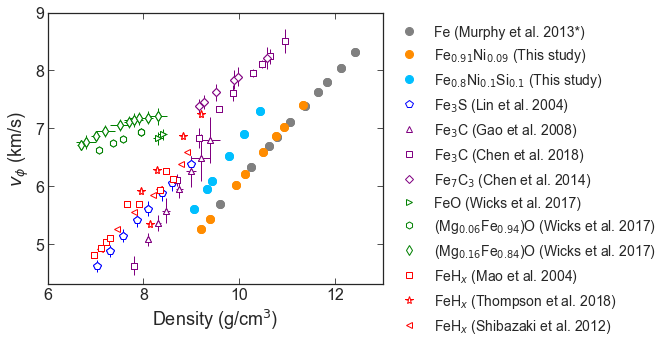

In [14]:
# Figure comparing velocity vs density for light elements

studylist_crop = ['bccFe',
                  'hcpFe_Murphy',
                  'bccFeNi', 
                  'hcpFeNi', 
                  'bccFeNiSi', 
                  'hcpFeNiSi']

fig, (ax0) = plt.subplots(nrows = 1, ncols=1, figsize=(6, 5))

# Fe alloy comparison Debye velocity plot
alphaval = 1
x = 'rho'
dx = 'drho'
y = 'vphi'
dy = 'dvphi'

color='gray'
# study = 'bccFe'
# df = precious_dfdict[study]
# h1, = ax0.plot(df[x], df[y], marker=symbol[study], ms=symbolsize[study], color=color,
#                mfc=color,  alpha = alphaval,
#                label=labelchoice[study],markeredgewidth=1,ls='none')
# ax0.errorbar(df[x], df[y], xerr=df[dx], yerr=df[dy], alpha = alphaval,
#                  marker=symbol[study], ms=symbolsize[study], color=colorchoice[study] , 
#                  mfc=mfcchoice[study],
#                  label=labelchoice[study],markeredgewidth=1,ls='none',elinewidth=1)   

study = 'hcpFe_Murphy'
df = precious_dfdict[study]
h2, = ax0.plot(df[x], df[y], marker=symbol[study], ms=symbolsize[study], color=color,
               mfc=color,  alpha = alphaval,
               label='Fe (Murphy et al. 2013*)',markeredgewidth=1,ls='none')
ax0.errorbar(df[x], df[y], xerr=df[dx], yerr=df[dy], alpha = alphaval,
                 marker=symbol[study], ms=symbolsize[study], color=color, 
                 mfc=color,
                 label='Fe (Murphy et al. 2013*)',markeredgewidth=1,ls='none',elinewidth=1)   

# study = 'bccFeNi'
# df = precious_dfdict[study]
# h3, = ax0.plot(df[x], df[y], marker=symbol[study], ms=symbolsize[study], color=colorchoice[study],
#                mfc=mfcchoice[study],  alpha = alphaval,
#                label=labelchoice[study],markeredgewidth=1,ls='none')
# ax0.errorbar(df[x], df[y], xerr=df[dx], yerr=df[dy], alpha = alphaval,
#                  marker=symbol[study], ms=symbolsize[study], color=colorchoice[study] , 
#                  mfc=mfcchoice[study],
#                  label=labelchoice[study],markeredgewidth=1,ls='none',elinewidth=1)   

study = 'hcpFeNi'
df = precious_dfdict[study]
h4, = ax0.plot(df[x], df[y], marker=symbol[study], ms=symbolsize[study], color=colorchoice[study],
               mfc=mfcchoice[study],  alpha = alphaval,
               label='Fe$_{0.91}$Ni$_{0.09}$ (This study)',markeredgewidth=1,ls='none')
ax0.errorbar(df[x], df[y], xerr=df[dx], yerr=df[dy], alpha = alphaval,
                 marker=symbol[study], ms=symbolsize[study], color=colorchoice[study] , 
                 mfc=mfcchoice[study],
                 label='Fe$_{0.91}$Ni$_{0.09}$ (This study)',markeredgewidth=1,ls='none',elinewidth=1)   

# study = 'bccFeNiSi'
# df = precious_dfdict[study]
# h5, = ax0.plot(df[x], df[y], marker=symbol[study], ms=symbolsize[study], color=colorchoice[study],
#                mfc=mfcchoice[study],  alpha = alphaval,
#                label=labelchoice[study],markeredgewidth=1,ls='none')
# ax0.errorbar(df[x], df[y], xerr=df[dx], yerr=df[dy], alpha = alphaval,
#                  marker=symbol[study], ms=symbolsize[study], color=colorchoice[study] , 
#                  mfc=mfcchoice[study],
#                  label=labelchoice[study],markeredgewidth=1,ls='none',elinewidth=1)   

study = 'hcpFeNiSi'
df = precious_dfdict[study]
h6, = ax0.plot(df[x], df[y], marker=symbol[study], ms=symbolsize[study], color=colorchoice[study],
               mfc=mfcchoice[study],  alpha = alphaval,
               label='Fe$_{0.8}$Ni$_{0.1}$Si$_{0.1}$ (This study)',markeredgewidth=1,ls='none')
ax0.errorbar(df[x], df[y], xerr=df[dx], yerr=df[dy], alpha = alphaval,
                 marker=symbol[study], ms=symbolsize[study], color=colorchoice[study] , 
                 mfc=mfcchoice[study],
                 label=labelchoice[study],markeredgewidth=1,ls='none',elinewidth=1)   

# Fe-S

study = 'Lin2004_Fe3S'
df = precious_dfdict[study]
h7, = ax0.plot(df[x], df[y], marker=symbol[study], ms=symbolsize[study], color=colorchoice[study],
               mfc=mfcchoice[study],  alpha = alphaval,
               label=labelchoice[study],markeredgewidth=1,ls='none')
ax0.errorbar(df[x], df[y], yerr=df[dy], alpha = alphaval,
                 marker=symbol[study], ms=symbolsize[study], color=colorchoice[study] , 
                 mfc=mfcchoice[study],
                 label=labelchoice[study],markeredgewidth=1,ls='none',elinewidth=1)   

# Fe-C

study = 'Gao2008_Fe3C'
df = precious_dfdict[study]
h8, = ax0.plot(df[x], df[y], marker=symbol[study], ms=symbolsize[study], color=colorchoice[study],
               mfc=mfcchoice[study],  alpha = alphaval,
               label=labelchoice[study],markeredgewidth=1,ls='none')
ax0.errorbar(df[x], df[y], xerr=df[dx], yerr=df[dy], alpha = alphaval,
                 marker=symbol[study], ms=symbolsize[study], color=colorchoice[study], 
                 mfc=mfcchoice[study],
                 label=labelchoice[study],markeredgewidth=1,ls='none',elinewidth=1)

study = 'Chen2018_Fe3C'
df = precious_dfdict[study]
h16, = ax0.plot(df[x], df[y], marker=symbol[study], ms=symbolsize[study], color=colorchoice[study],
               mfc=mfcchoice[study],  alpha = alphaval,
               label=labelchoice[study],markeredgewidth=1,ls='none')
ax0.errorbar(df[x], df[y], xerr=df[dx], yerr=df[dy], alpha = alphaval,
                 marker=symbol[study], ms=symbolsize[study], color=colorchoice[study], 
                 mfc=mfcchoice[study],
                 label=labelchoice[study],markeredgewidth=1,ls='none',elinewidth=1)

study = 'Chen2014_Fe7C3'
df = precious_dfdict[study]
h9, = ax0.plot(df[x], df[y], marker=symbol[study], ms=symbolsize[study], color=colorchoice[study],
               mfc=mfcchoice[study],  alpha = alphaval,
               label=labelchoice[study],markeredgewidth=1,ls='none')
ax0.errorbar(df[x], df[y], xerr=df[dx], yerr=df[dy], alpha = alphaval,
                 marker=symbol[study], ms=symbolsize[study], color=colorchoice[study], 
                 mfc=mfcchoice[study],
                 label=labelchoice[study],markeredgewidth=1,ls='none',elinewidth=1) 

# Fe-O

study = 'Wicks2017_FeO'
df = precious_dfdict[study]
h10, = ax0.plot(df[x], df[y], marker=symbol[study], ms=symbolsize[study], color=colorchoice[study],
               mfc=mfcchoice[study],  alpha = alphaval,
               label=labelchoice[study],markeredgewidth=1,ls='none')
ax0.errorbar(df[x], df[y], xerr=df[dx], yerr=df[dy], alpha = alphaval,
                 marker=symbol[study], ms=symbolsize[study], color=colorchoice[study], 
                 mfc=mfcchoice[study],
                 label=labelchoice[study],markeredgewidth=1,ls='none',elinewidth=1) 

study = 'Wicks2017_mw94'
df = precious_dfdict[study]
h11, = ax0.plot(df[x], df[y], marker=symbol[study], ms=symbolsize[study], color=colorchoice[study],
               mfc=mfcchoice[study],  alpha = alphaval,
               label=labelchoice[study],markeredgewidth=1,ls='none')
ax0.errorbar(df[x], df[y], xerr=df[dx], yerr=df[dy], alpha = alphaval,
                 marker=symbol[study], ms=symbolsize[study], color=colorchoice[study], 
                 mfc=mfcchoice[study],
                 label=labelchoice[study],markeredgewidth=1,ls='none',elinewidth=1) 

study = 'Wicks2017_mw84'
df = precious_dfdict[study]
h12, = ax0.plot(df[x], df[y], marker=symbol[study], ms=symbolsize[study], color=colorchoice[study],
               mfc=mfcchoice[study],  alpha = alphaval,
               label=labelchoice[study],markeredgewidth=1,ls='none')
ax0.errorbar(df[x], df[y], xerr=df[dx], yerr=df[dy], alpha = alphaval,
                 marker=symbol[study], ms=symbolsize[study], color=colorchoice[study], 
                 mfc=mfcchoice[study],
                 label=labelchoice[study],markeredgewidth=1,ls='none',elinewidth=1) 

# Fe-H

study = 'Mao2004_FeHx'
df = precious_dfdict[study]
h13, = ax0.plot(df[x], df[y], marker=symbol[study], ms=symbolsize[study], color=colorchoice[study],
               mfc=mfcchoice[study],  alpha = alphaval,
               label=labelchoice[study],markeredgewidth=1,ls='none')
ax0.errorbar(df[x], df[y], alpha = alphaval,
                 marker=symbol[study], ms=symbolsize[study], color=colorchoice[study], 
                 mfc=mfcchoice[study],
                 label=labelchoice[study],markeredgewidth=1,ls='none',elinewidth=1) 

study = 'Thompson2018_FeHx'
df = precious_dfdict[study]
h14, = ax0.plot(df[x], df[y], marker=symbol[study], ms=symbolsize[study], color=colorchoice[study],
               mfc=mfcchoice[study],  alpha = alphaval,
               label=labelchoice[study],markeredgewidth=1,ls='none')
ax0.errorbar(df[x], df[y], xerr=df[dx], yerr=df[dy], alpha = alphaval,
                 marker=symbol[study], ms=symbolsize[study], color=colorchoice[study], 
                 mfc=mfcchoice[study],
                 label=labelchoice[study],markeredgewidth=1,ls='none',elinewidth=1) 

study = 'Shibazaki2012_FeHx'
df = precious_dfdict[study]
h15, = ax0.plot(df[x], df[y], marker=symbol[study], ms=symbolsize[study], color=colorchoice[study],
               mfc=mfcchoice[study],  alpha = alphaval,
               label=labelchoice[study],markeredgewidth=1,ls='none')

ax0.tick_params(direction='in',right='on',top='on')
ax0.set_xlabel(r'Pressure (GPa)', fontsize=18)
ax0.set_ylabel(r'$v_{D}$ (km/s)', fontsize=18)
ax0.set_xlim([-7,150])

hlabels = [h2,h4,h6,h7,h8,h16,h9,h10,h11,h12,h13,h14,h15]
ax0.legend(fontsize=14,bbox_to_anchor=(1, 1),handles = hlabels)

ax0.set_xlim(6,13)
ax0.set_ylim(4.3,9)
ax0.tick_params(direction='in',right='on',top='on')
ax0.set_xlabel(r'Density (g/cm$^3$)', fontsize=18)
ax0.set_ylabel(r'$v_{\phi}$ (km/s)', fontsize=18)

fig = plt.gcf()
fig.savefig('FeLightElement_vphi_uncorrected.pdf', format='pdf', bbox_inches='tight')